In [1]:
#Week 12: Model Selection and Model Building\

#Individual Project:
#This project is done individually
Group Name: Name:Nkululeko Freedom MqadiEmail:mqadinf@gmail.comCountry:South AfricaCollege/Company:DeviareSpecialization:Data Science

In [2]:
#Problem description
#ABC Bank wants to sell its term deposit product to customers and before launching the product 
#they want to develop a model which help them in understanding whether a particular customer will buy their product or not 
#(based on customer's past interaction with bank or other Financial Institution).


#My goal as a data scientist is to build a machine learning model that learns the unknown patterns,
#maps and several input features classifying whether the client will subscribe for deposit or not.

In [3]:
#Business understanding

#ABC Bank is a banking institution in Portuguese that offers direct marketing campaigns which are phone call based. 
#As the marketing campaigns are phone call based, this presented some limitations 
#and therefore this resulted in decreasing the operating efficiency of the company. 
#Contacting many people takes a lot of time and therefore success rate is less. 
#The consumers that are being offered deposits, mostly are people using phone calls as a method of communication.
#This poses some threats in the company as this will jeopardize the performance of the company, 
#so the company is coming up with innovative ways to increase the efficiency by making fewer calls
#but improves the success rate.

In [4]:
#Data understanding
#As mentioned above, the dataset consists of direct marketing campaigns data of a banking institution. 
#The dataset was picked from UCI Machine Learning Repository which is an amazing source for publicly available datasets. 
#There were four variants of the datasets out of which we chose “ bank-additional-full.csv” 
#which consists of 41188 data points with 20 independent variables out of which 10 are numeric features 
#and 10 are categorical features. The list of features available to us are given below:


#Data set description
#1.age (numeric)
#2.job : type of job (categorical: ‘admin.’,’blue-collar’,’entrepreneur’,’housemaid’,’management’,’retired’,’self-employed’,’services’,’student’,’technician’,’unemployed’,’unknown’)
#3.marital : marital status (categorical: ‘divorced’,’married’,’single’,’unknown’; note: ‘divorced’ means divorced or widowed)
#4.education (categorical: ‘basic.4y’,’basic.6y’,’basic.9y’,’high.school’,’illiterate’,’professional.course’,’university.degree’,’unknown’)
#5.default: has credit in default? (categorical: ‘no’,’yes’,’unknown’)
#6.housing: has housing loan? (categorical: ‘no’,’yes’,’unknown’)
#7.loan: has personal loan? (categorical: ‘no’,’yes’,’unknown’)
#Related with the last contact of the current campaign:
#8. contact: contact communication type (categorical: ‘cellular’,’telephone’)
#9. month: last contact month of year (categorical: ‘jan’, ‘feb’, ‘mar’, …, ‘nov’, ‘dec’)
#10. day_of_week: last contact day of the week (categorical: ‘mon’,’tue’,’wed’,’thu’,’fri’)
#11. duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y=’no’). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
#other attributes:
#12. campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
#13. pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
#14. previous: number of contacts performed before this campaign and for this client (numeric)
#15. poutcome: outcome of the previous marketing campaign (categorical: ‘failure’,’nonexistent’,’success’)
#social and economic context attributes
#16. emp.var.rate: employment variation rate — quarterly indicator (numeric)
#17. cons.price.idx: consumer price index — monthly indicator (numeric)
#18. cons.conf.idx: consumer confidence index — monthly indicator (numeric)
#19. euribor3m: euribor 3 month rate — daily indicator (numeric)
#20. nr.employed: number of employees — quarterly indicator (numeric)
#Output variable (desired target):
#21 - y - has the client subscribed a term deposit? (binary: 'yes','no')



In [5]:
# we must first import the following libraries.
import pandas as pd
import numpy as np

In [6]:
bank_data=pd.read_csv('bank-additional-full.csv',sep=";")

In [7]:
bank_data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [8]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

In [9]:
# Above we can see that there are 10 numerical columns having 5 colums of integer datatype
#and 5 columns on float dataype and 11 are categorical dataype including target varaible which is named as y in the dataset.

In [10]:
print("Number of rows",bank_data.shape[0])

Number of rows 41188


In [11]:
print("Number of features/columns",bank_data.shape[1])

Number of features/columns 21


In [12]:
bank_data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [13]:
print(bank_data["job"].value_counts())
print("*"*25)
print(bank_data["marital"].value_counts())
print("*"*25)
print(bank_data["education"].value_counts())

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64
*************************
married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64
*************************
university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64


In [14]:
print(bank_data["y"].value_counts())

no     36548
yes     4640
Name: y, dtype: int64


In [15]:
#From the above distribution we can be sure that the data is imbalanced, 
# as the number of "no"s are also 8 times the number of "yes".

In [16]:
# There are no null/missing values.
bank_data.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [17]:
#Type of data available for analysis:

#The  type of data available for analysis is the Exploratory Data Analysis(EDA).
#The goal of using Exploratory Data Analysis(EDA) is:
#To explore data and find relationships between variables which were previously unknown.
#Its also helps you to discover relationships between measures in your data,
#which are evidence for the existence of the correlation.


In [18]:
############## Exploratory Data Analysis####################################

# We must import the following libraries for data visualization purposes.
import matplotlib
matplotlib.use(u'nbAgg')
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

<IPython.core.display.Javascript object>


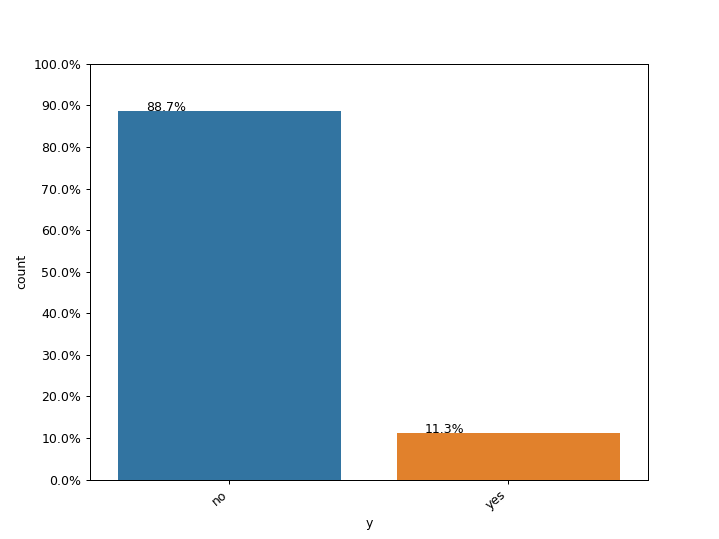

In [19]:
  plt.figure(figsize=(8,6))
  Y = bank_data["y"]
  total = len(Y)*1.
  ax=sns.countplot(x="y", data=bank_data)
  for p in ax.patches:
    ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5))

  #put 11 ticks (therefore 10 steps), from 0 to the total number of rows in the dataframe
  ax.yaxis.set_ticks(np.linspace(0, total, 11))
  #adjust the ticklabel to the desired format, without changing the position of the ticks.
  ax.set_yticklabels(map('{:.1f}%'.format, 100*ax.yaxis.get_majorticklocs()/total))
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
  # ax.legend(labels=["no","yes"])
  plt.show()

In [20]:
#As shown from the above plot, we can see that majority of datapoints belong to No class labels with 88.7% 
#and minority of class belongs to 11.3% so the ratio of No:Yes is 8:1.

In [21]:
################################### Univariate Analysis#########################
def countplot(label, dataset):
  plt.figure(figsize=(15,10))
  Y = bank_data[label]
  total = len(Y)*1.
  ax=sns.countplot(x=label, data=dataset)
  for p in ax.patches:
    ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5))

  #put 11 ticks (therefore 10 steps), from 0 to the total number of rows in the dataframe
  ax.yaxis.set_ticks(np.linspace(0, total, 11))
  #adjust the ticklabel to the desired format, without changing the position of the ticks.
  ax.set_yticklabels(map('{:.1f}%'.format, 100*ax.yaxis.get_majorticklocs()/total))
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
  # ax.legend(labels=["no","yes"])
  plt.show()

In [23]:
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

def countplot_withY(label, dataset):
  plt.figure(figsize=(20,10))
  Y = bank_data[label]
  total = len(Y)*1.
  ax=sns.countplot(x=label, data=dataset, hue="y")
  for p in ax.patches:
    ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5))

  #put 11 ticks (therefore 10 steps), from 0 to the total number of rows in the dataframe
  ax.yaxis.set_ticks(np.linspace(0, total, 11))
  #adjust the ticklabel to the desired format, without changing the position of the ticks.
  ax.set_yticklabels(map('{:.1f}%'.format, 100*ax.yaxis.get_majorticklocs()/total))
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
  # ax.legend(labels=["no","yes"])
  plt.show()

In [24]:
#Univariate Analysis
#EDA 
# Categorical Variables:

# Let’s start doing EDA on rest of the columns of the datapoints.

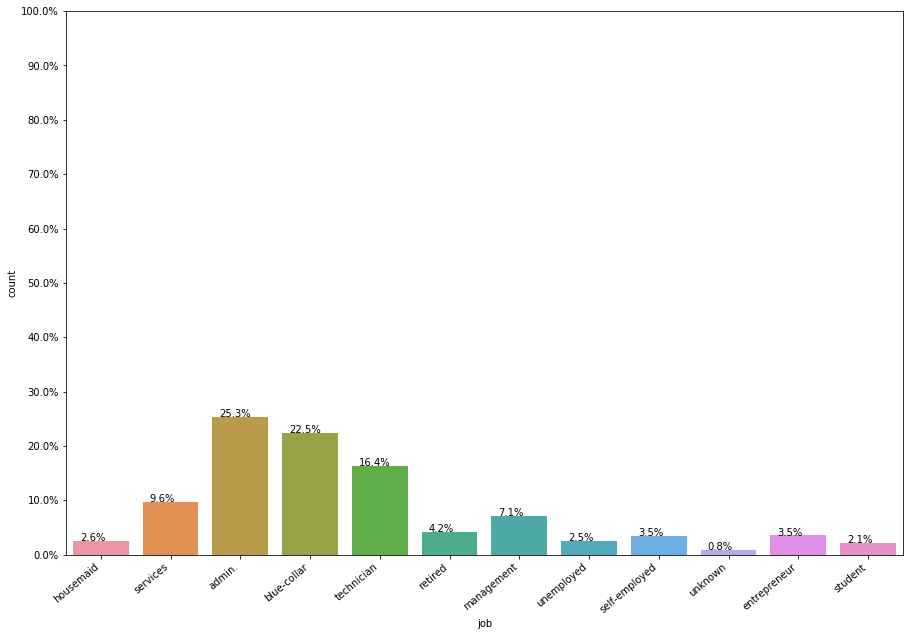

In [25]:
#Feature: Job (Categorical variable)

countplot("job", bank_data)

In [26]:
#From the above distribution we can see that most of the customers have jobs as "admin", "blue-collar" or "technician" 
#have been contacted by the bank.
#One interesting thing to find out would be to see the distribution for each classes as well.
#For example, how many people who work as an admin have subscribed a term deposit.


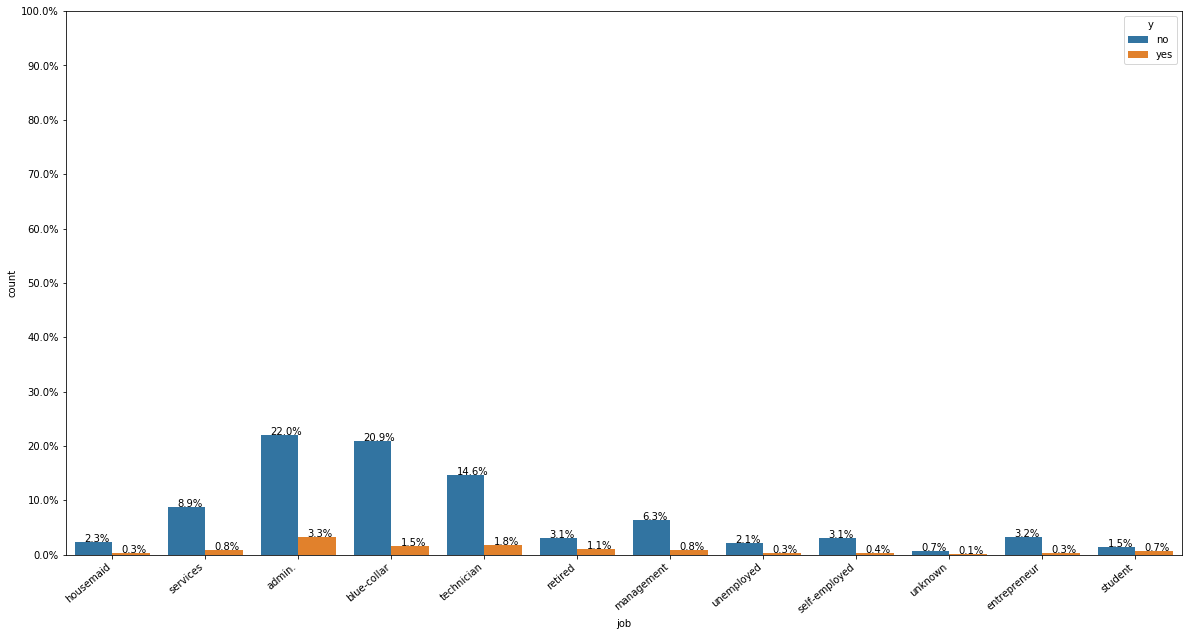

In [27]:
countplot_withY("job", bank_data)

# Which job profession has the highest rate for subscribing a term deposit and 
#which customers has the highest rate of not subscribing?

In [28]:
#From the  plot above, we can see that the customers who have a jobs of admin have the highest rate of subscribing a term deposit,
#but they are also the highest when it comes to not subscribing. 
#This is simply because we have more customers working as admin than any other profession.

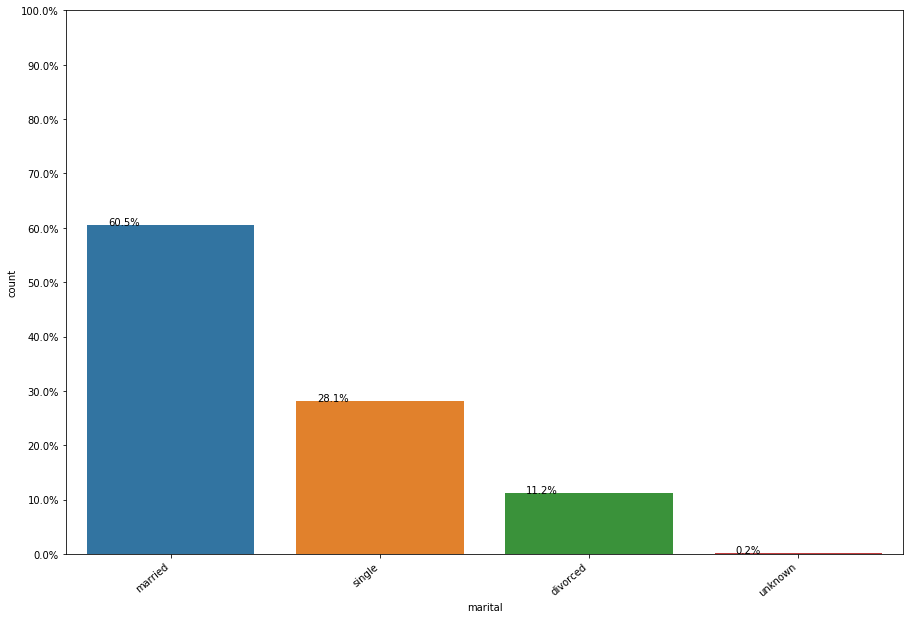

In [29]:
#Feature: Marital (Categorical feature)

countplot("marital", bank_data)

In [30]:
#From the  plot  above as we can see, customers who have been contacted  the most  are married. 
#About 0.2% of marital status of customer is unknown.

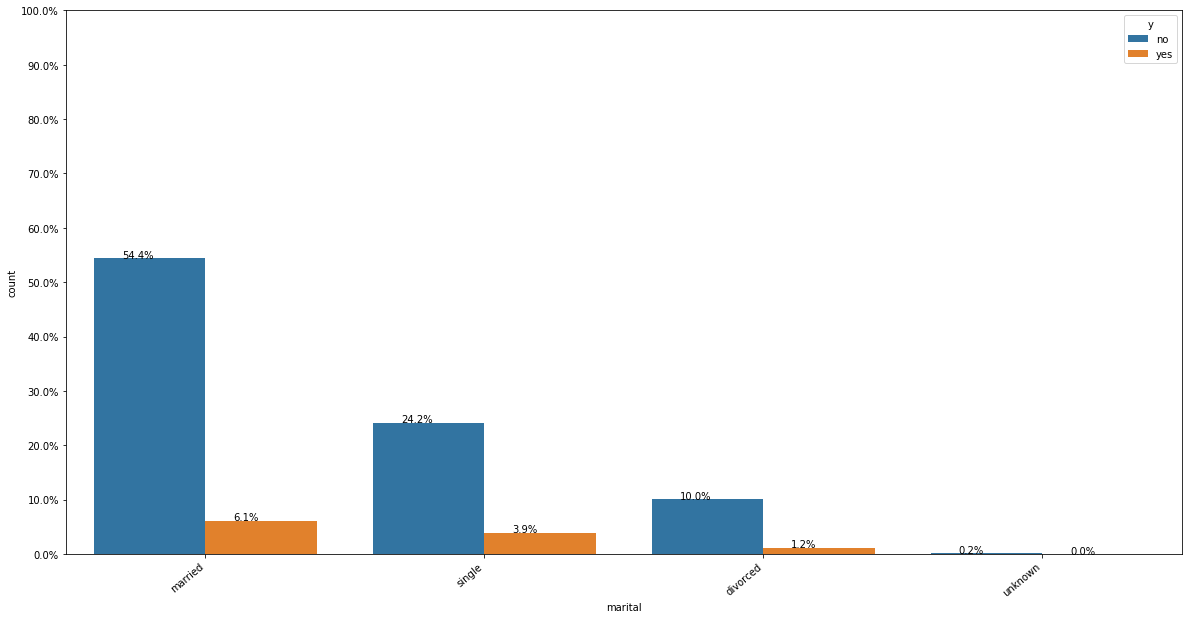

In [31]:
countplot_withY("marital", bank_data)
# Which marital status subscribes the most for long term deposits?

In [32]:
#From the plot above we can see that married people have subscribed to long term deposits more than any other.
#They are also the most one’s who have turned down the deposits offered by the bank.
#People whose status is unknown have not subscribed to the long term deposits at all.

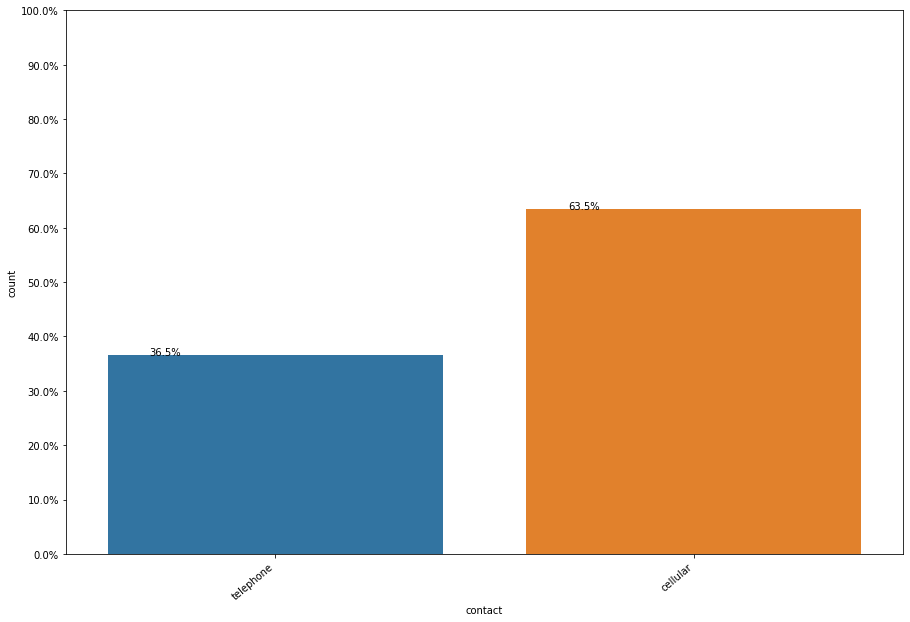

In [33]:
#Feature: contact (Categorical)

countplot("contact", bank_data)

In [34]:
# Most people are contacted more in cellular than telephone.

In [35]:
#Which contact type has  subscribed the most for long term deposits?

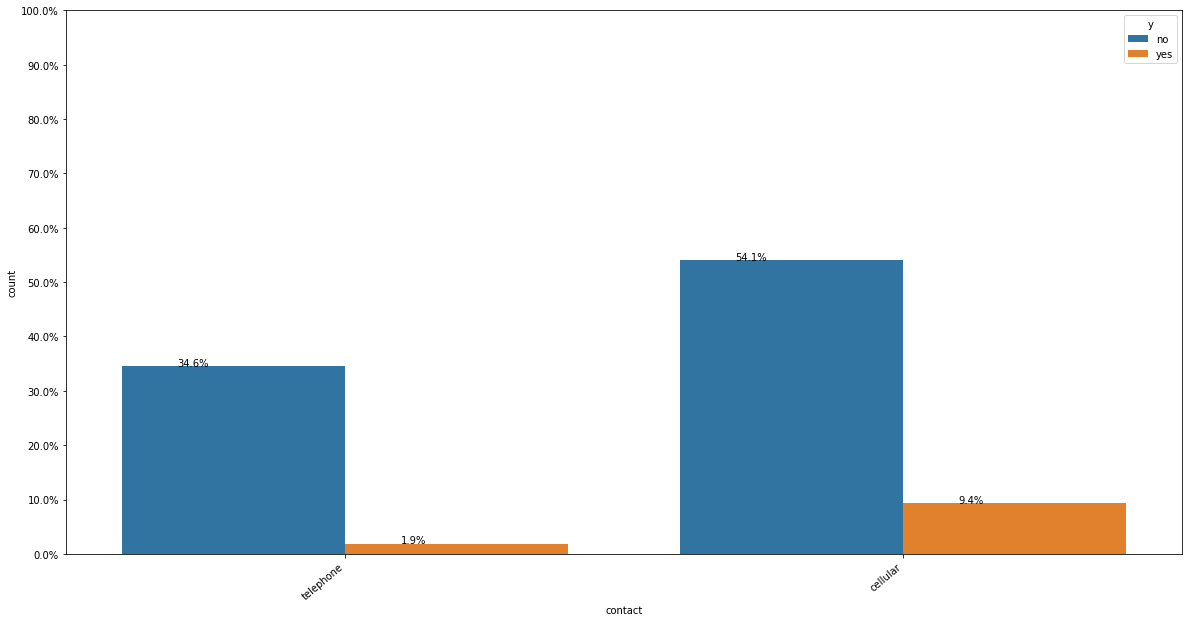

In [36]:
countplot_withY("contact", bank_data)

In [37]:
#People with contact type cellular have subscribed more for long term deposits than telephone.

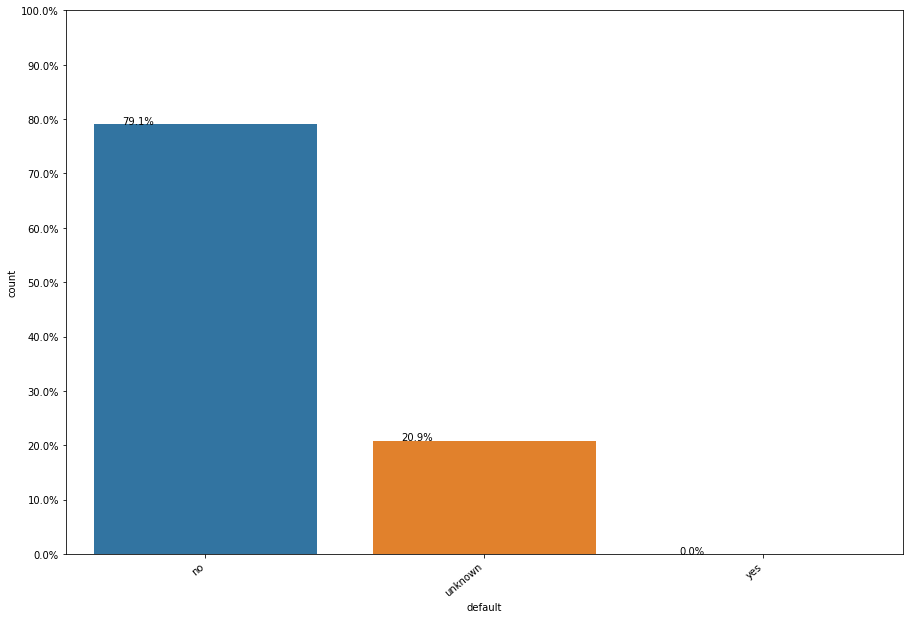

In [38]:
#Feature: default (categorical)
#This is a categorical feature which means "has credit in default", with the values "yes" and "no" and "unknown".

countplot("default", bank_data)

In [39]:
#As shown above,we can clearly see that the people with default status as ‘no’ are the most who have been contacted by the bank
#for the deposits. People with default status ‘yes’ have not been contacted by the bank at all.
#While very few people with unknown default status have been contacted by the bank.

In [40]:
# Do people who have or who don’t have credit in default subscribe the most for long term deposits?


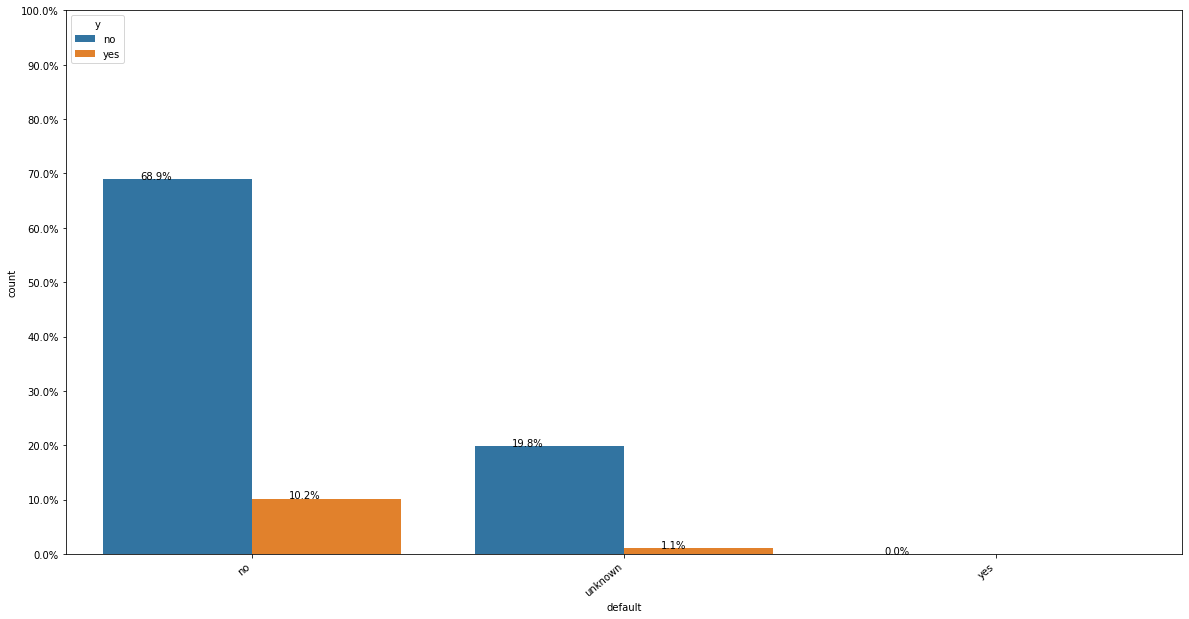

In [41]:
countplot_withY("default", bank_data)

In [42]:
# From the plot above we can observe that  people with default status as no are the most one’s who have 
#and have not subscribed for bank deposits.

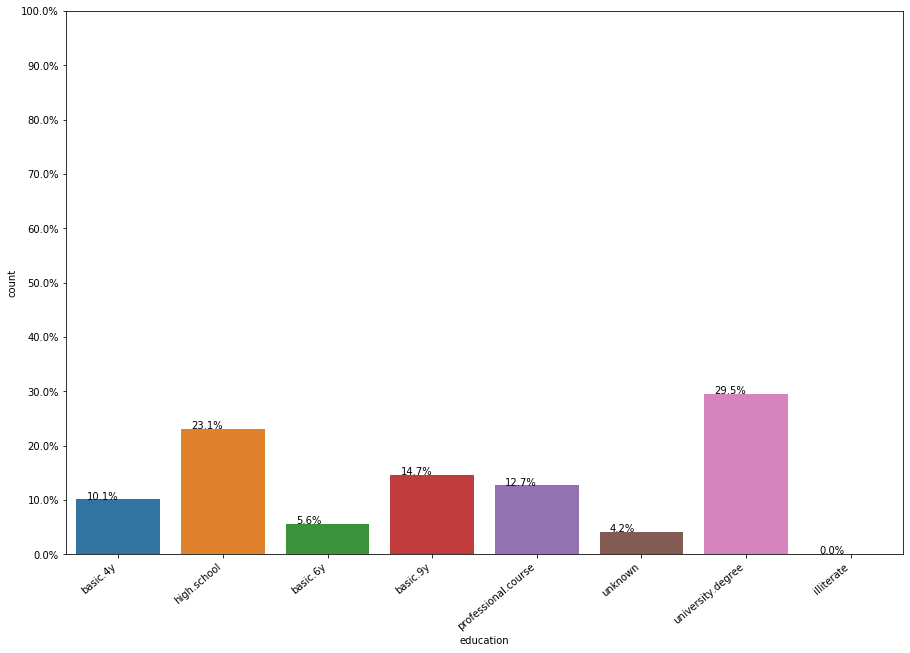

In [43]:
#Feature: Education

countplot("education",bank_data)

In [44]:
# As shown above,people contacted by the bank with university degree as their educational qualification 
#are more than the people with any other educational qualification.

In [45]:
#Do people who have completed their university degrees tend to subscribe the most for long term deposits?

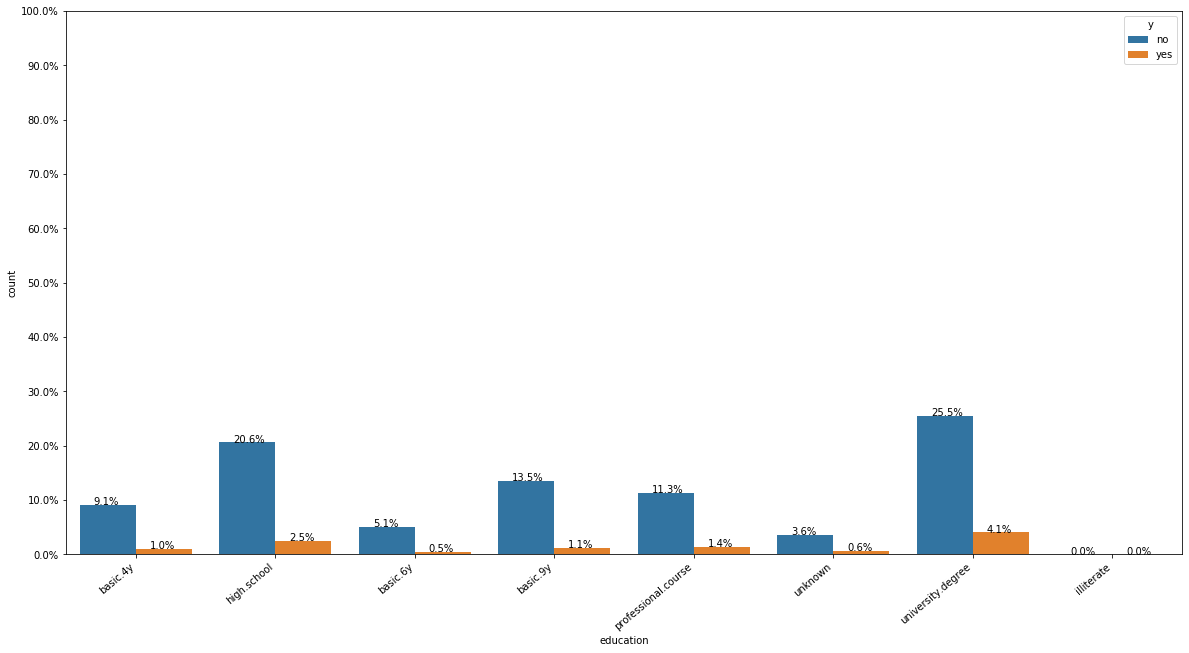

In [46]:
countplot_withY("education", bank_data)

In [47]:
# As shown above, people with university degree as education qualification are the most who have subscribed for the deposits.
#They are also the most who have not subscribed for deposits.

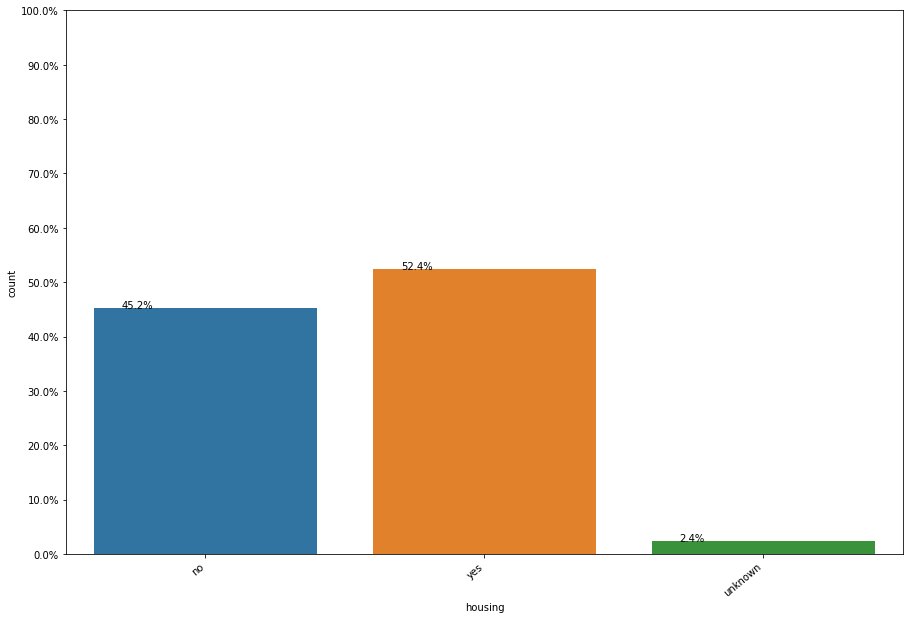

In [48]:
#Feature: housing (Categorical)
countplot("housing", bank_data)

In [49]:
#People who have housing loan have been contacted the most by the bank.
#People who have no housing loan are also been contacted pretty much, 
#and people who have status unknown have been least contacted.


In [50]:
#Do people with or without a housing loan subscribe the most for long term deposits?

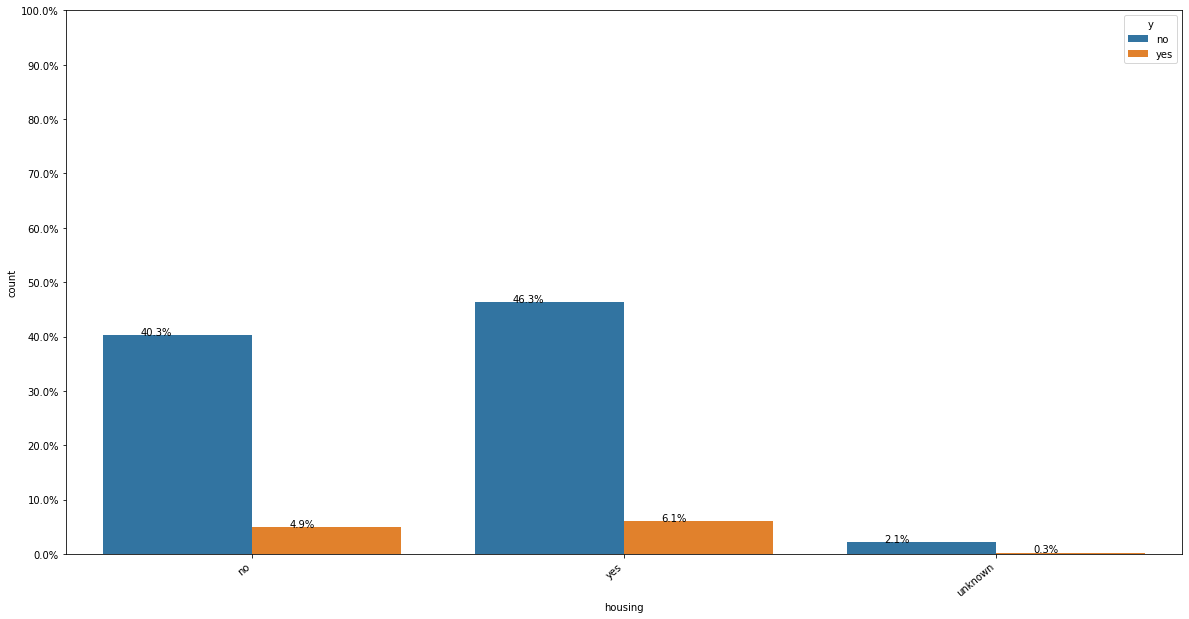

In [51]:
countplot_withY("housing", bank_data)

In [52]:
# As shown above, people who have a housing loan have subscribed the most for long term deposits, 
#followed by the ones who does not have housing loans.
#People with a housing loan has also the most ones who have not subscribed for the deposits.

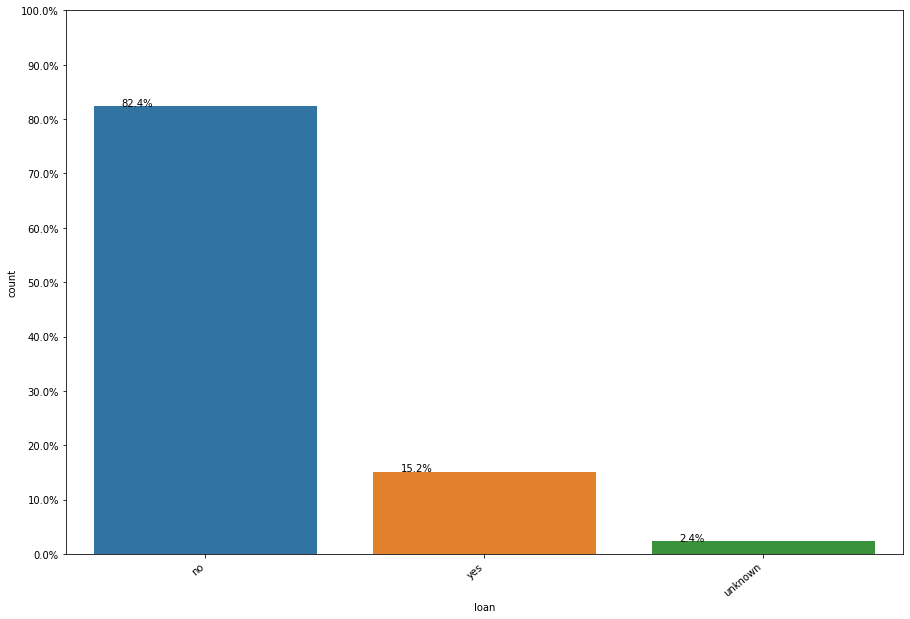

In [53]:
#Feature: loan (Categorical)
countplot("loan", bank_data)

In [54]:
#People who do not have loans have been most contacted for longer term deposits than the ones who have loans.

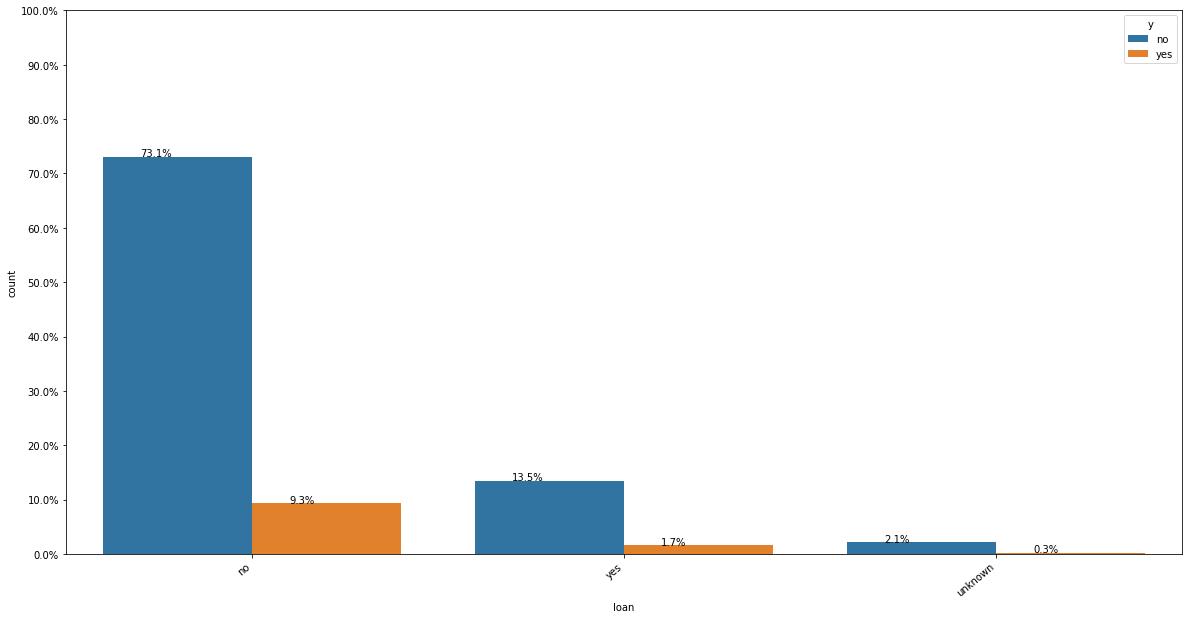

In [55]:
#Do people with or without loans  subscribed the most for long term deposits?
countplot_withY("loan", bank_data)

In [57]:
#People with no personal loans have subscribed the most for long term deposits. 
#They are also the ones who have not subscribed for long term deposits.


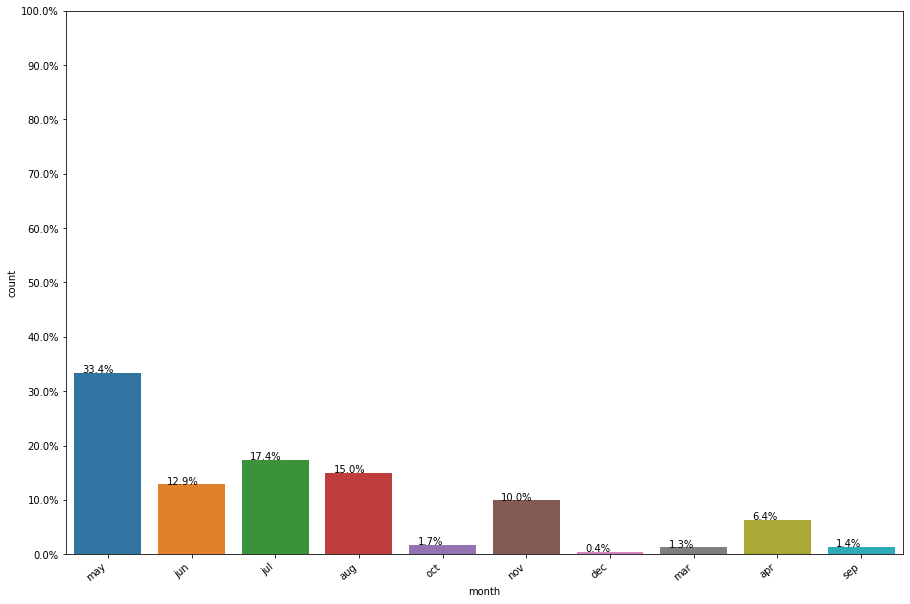

In [58]:
# Feature: month (Categorical)

countplot("month", bank_data)

In [59]:
#People are being contacted the most in the month of May than any other months. It is followed by July, August, June.
# Very few people have been contacted in the month of December. 
#People have not been contacted in the month of January and February.

In [60]:
bank_data['month'].value_counts()

may    13769
jul     7174
aug     6178
jun     5318
nov     4101
apr     2632
oct      718
sep      570
mar      546
dec      182
Name: month, dtype: int64

In [61]:
#It is very interesting from the above query that people are not contacted in the month of January,Februrary.

In [62]:
#In which month do people have higher chances to subscribe for longer term deposits?

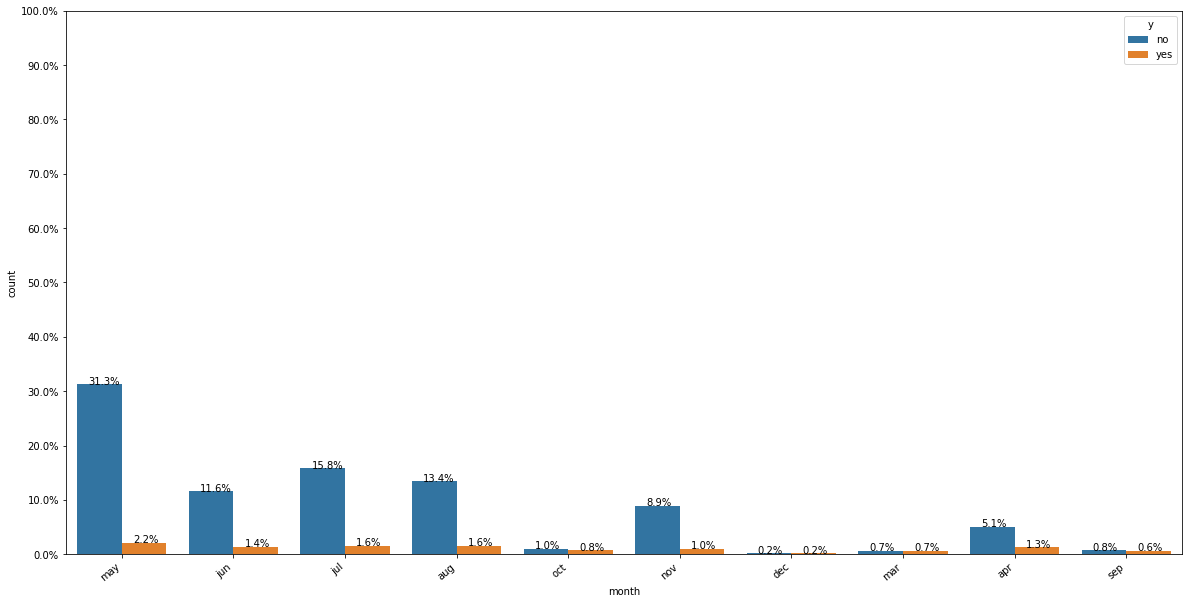

In [63]:
countplot_withY("month", bank_data)

In [64]:
#People who have been contacted in May have higher chances to subscribe for longer term deposits 
#but have also higher chances for not subscribing the long-term deposits.
#Very few people are contacted in the month of December, March, September, and October 
#and have almost equal chances for subscribing the deposits or not.

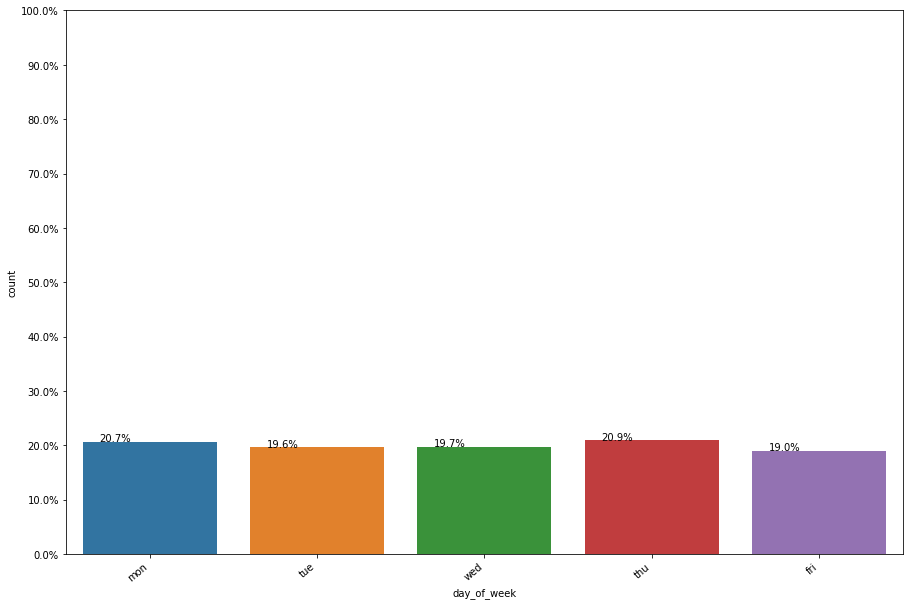

In [65]:
# Feature: day_of_week (Categorical)

countplot("day_of_week", bank_data)

In [66]:
# From the  plot above we can see that people are contacted from Monday to Friday but not on Saturday and Sunday.

In [67]:
#Does in all days people have equal chances for subscribing or not subscribing for the long-term deposits?

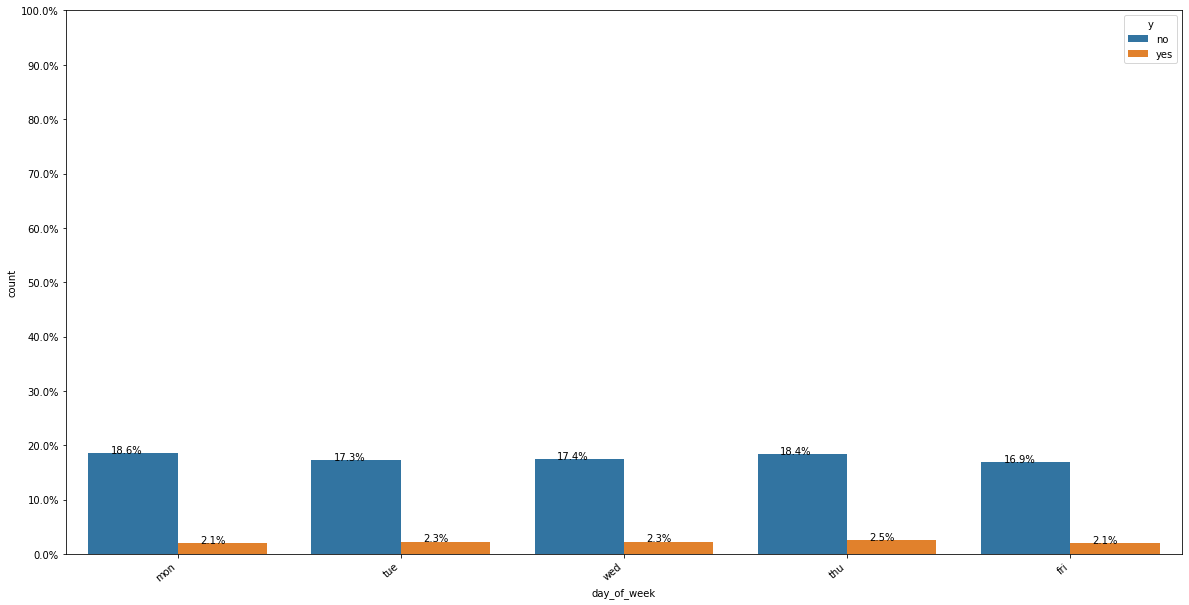

In [68]:
countplot_withY("day_of_week", bank_data)

In [69]:
#As shown above, in all the days they have equal chances for subscribing and not subscribing the term deposits.
#Day_of_week may not be very helpful in predicting whether the customer will subscribe for long term deposits or not.

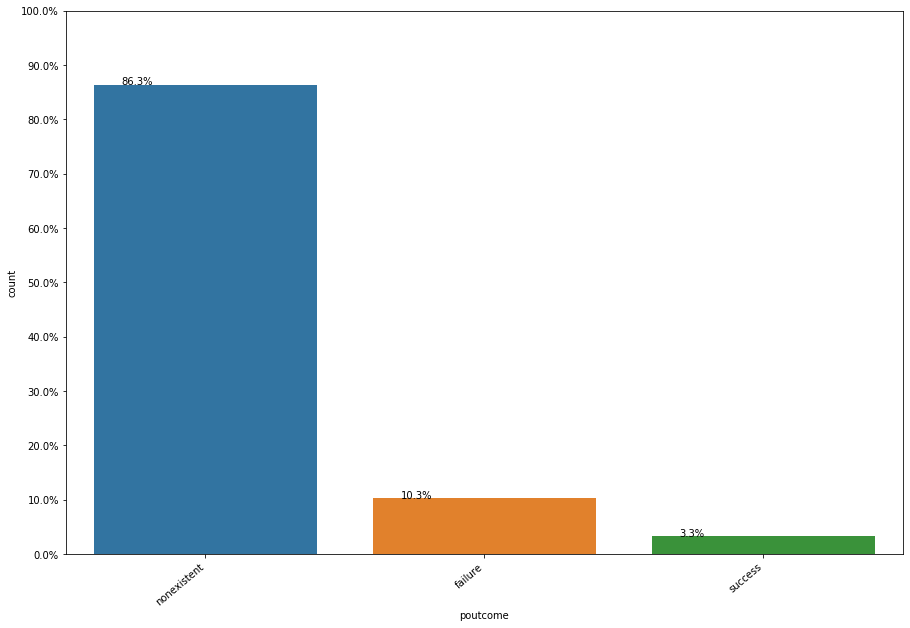

In [70]:
#Feature: poutcome (Categorical)
#This feature indicates the outcome of the previous marketing campaign

countplot("poutcome", bank_data)

In [71]:
#From the  plot above it is evident that majority of outcome of previous campaigns are nonexistent. 
#Very few people from previous marketing campaigns have subscribed for long term deposits.


In [72]:
#Which previous outcome has subscribed the most?

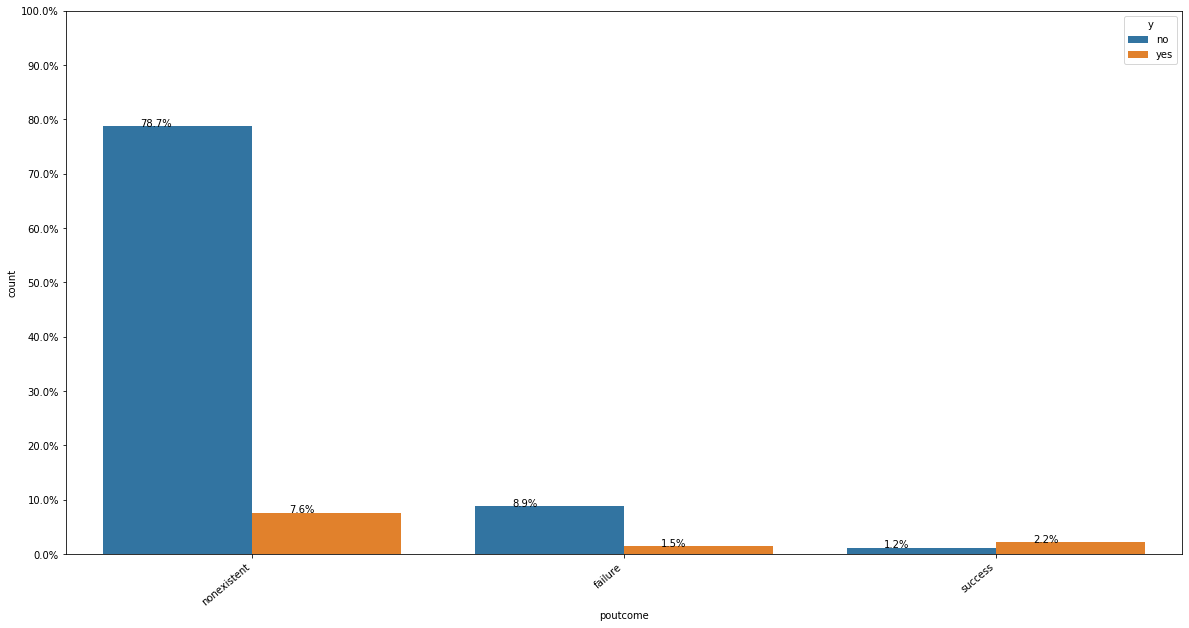

In [73]:
countplot_withY("poutcome", bank_data)

In [74]:
#From the  plot above, whose previous outcome is non-existent has subscribed the most than any other 
#group of people belonging to previous outcome.
#It is also clear that people belonging to success category of previous outcome has turned down for longer deposits.


In [75]:
# EDA 
#Numerical Variables:
#Now I perform some exploratory data analysis on the numerical variables.


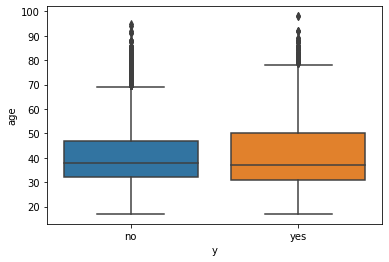

In [76]:
#Feature: Age (Numeric)

%matplotlib inline
sns.boxplot(data=bank_data, x="y", y="age")
plt.show()

In [77]:
#From the boxplot above we know that for both the customers that subscribed or didn't subscribed a term deposit,
#has a median age of around 38-40, and the boxplot for both the classes overlaps quite a lot, 
#which means that age isn't necessarily a good indicator for which customer will subscribe and which customer will not.

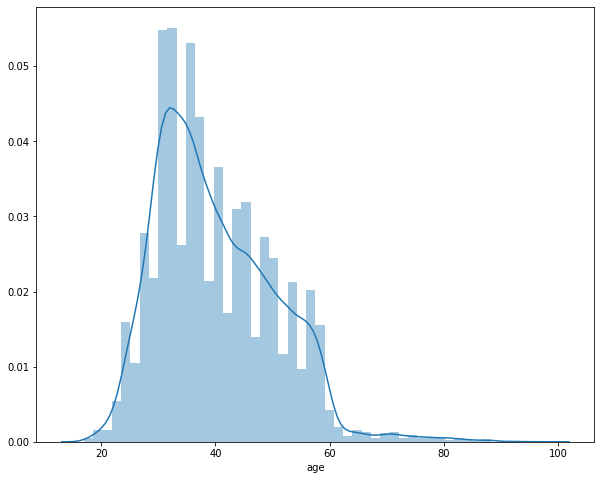

In [78]:
plt.figure(figsize=(10,8))
sns.distplot(bank_data["age"])

In [79]:
# From the  plot above it is a right skewed graph and there is an evidence of outliers after the age of 60.
#We also see in the distribution that most of the customers are in the age range of 30-40.


In [80]:
# However ,we can use other plots to check for outliers ,Violin plot and box plot.
import matplotlib as plt
from matplotlib.pyplot import figure
def violinplot_columns(columns,y='y'):
    figure(figsize=(15,10))
    sns.violinplot(x=bank_data[y],y=bank_data[columns],hue=bank_data['y'],showfliers=False)
    plt.pyplot.title(columns.upper())

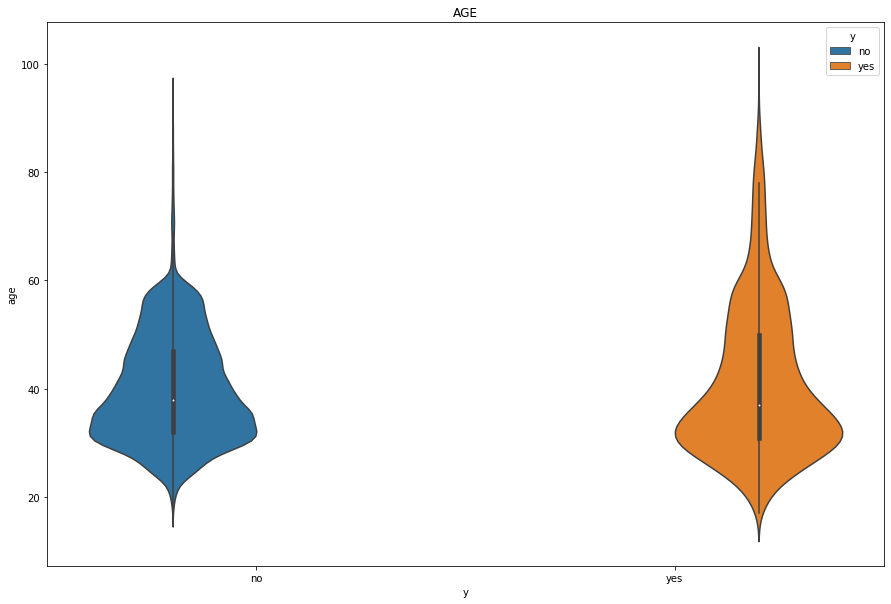

In [81]:
violinplot_columns('age')

In [82]:
#Using the Violin plot as shown above, it is clearly visible that there are outliers present for both the class. 
#In No class, outliers are present above age 70 and for Yes class, outliers are present above age 75.
#Median for No class is around 40 which is same for Yes class. 
#Also, it is visible that IQR range is almost overlapping so age might not be very helpful in predicting class label.

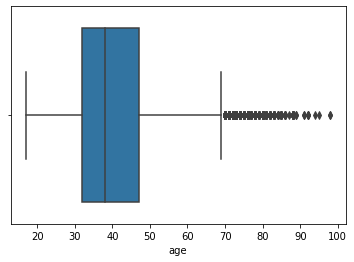

In [83]:
import seaborn as sns
sns.boxplot(x=bank_data['age'])

In [84]:
# Using the box plot as shown above, we can say that outliers are present after the age of 70 years.

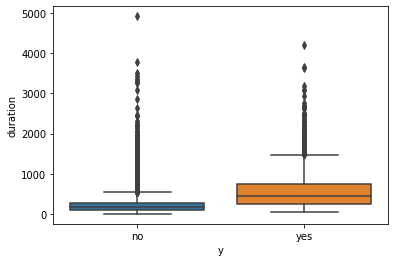

In [85]:
#Feature: duration (numeric)
import matplotlib
matplotlib.use(u'nbAgg')
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline
sns.boxplot(data=bank_data, x="y", y="duration")
plt.show()

In [86]:
#From the plot above, the duration (last contact duration) of a customer can be useful for predicting the target variable.
#It is expected because it is already mentioned in the data overview that this field highly affects the target variable 
#and should only be used for benchmark purposes.

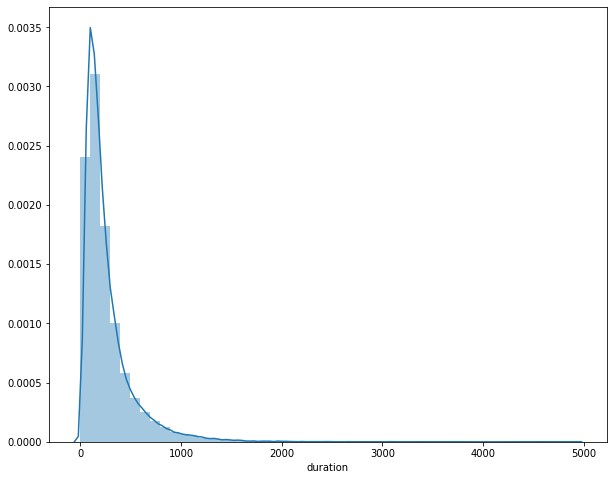

In [87]:
plt.figure(figsize=(10,8))
sns.distplot(bank_data["duration"])
plt.show()

In [88]:
# From the  plot above it is clearly evident that from duration around 1500 onward outliers, 
#are present and it is right skewed data.
#In this distribution above we find where most the values are very low and very few have high values.


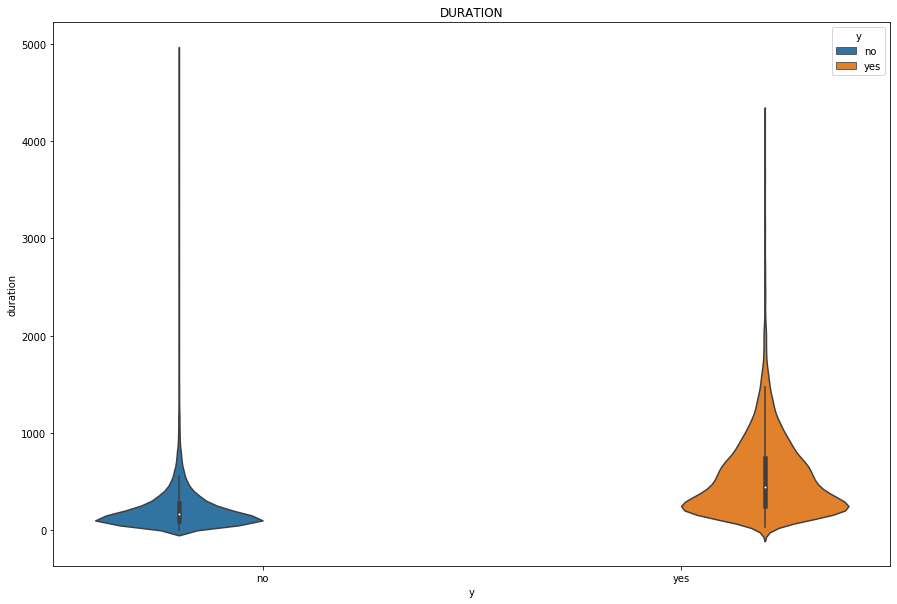

In [89]:
import matplotlib as plt
from matplotlib.pyplot import figure
violinplot_columns('duration')

In [90]:
# Using the Violin plot as shown above, any duration of call with class labels as no,more than 1000 are considered as outliers
#while with class labels as yes, more than 1500 would be considered as outliers.

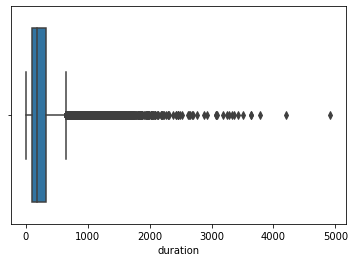

In [91]:
import seaborn as sns
sns.boxplot(x=bank_data['duration'])

In [92]:
# Using the box plot as shown above, we can say that outliers are present after the duration of calls more than 1000.

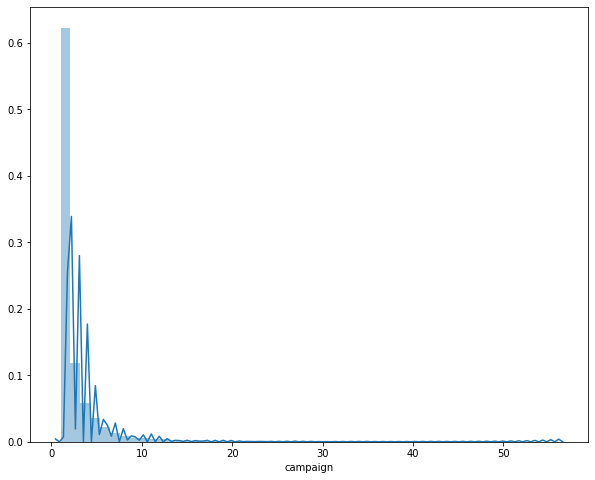

In [93]:
#Feature: campaign (numeric)
import matplotlib
matplotlib.use(u'nbAgg')
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


%matplotlib inline
plt.figure(figsize=(10,8))
sns.distplot(bank_data["campaign"])
plt.show()

In [94]:
# From the plot above,outliers are present when number of campaign are more than 10 irrespective of any class labels.

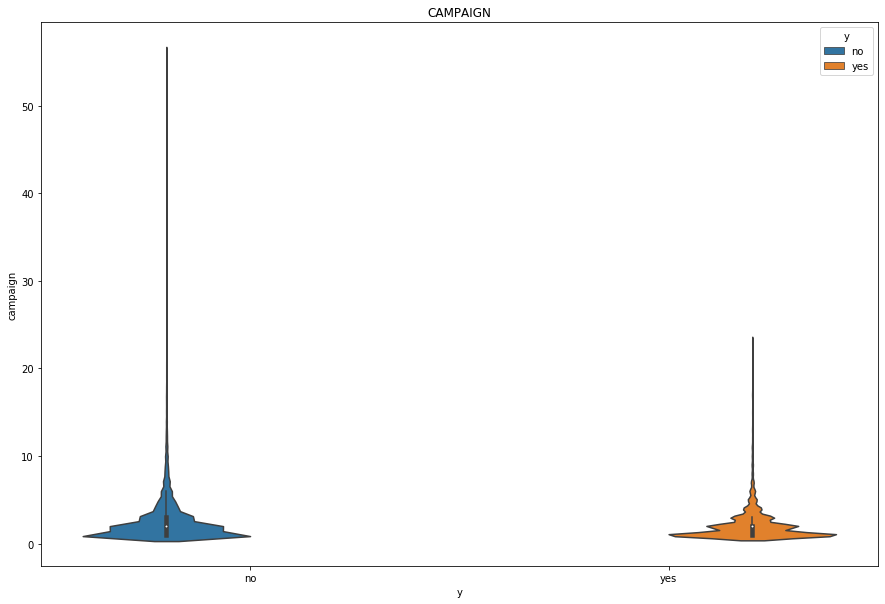

In [95]:
import matplotlib as plt
from matplotlib.pyplot import figure
violinplot_columns('campaign')

In [96]:
# Outliers are present when number of campaign are more than 10 irrespective of any class labels.

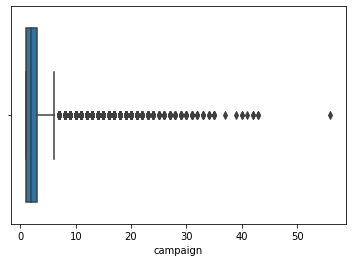

In [97]:
sns.boxplot(x=bank_data['campaign'])

In [98]:
# Using the box plot as shown above,we can see those campaigns more than 10 are considered as outliers.

In [99]:
bank_data['pdays'].value_counts()

999    39673
3        439
6        412
4        118
9         64
2         61
7         60
12        58
10        52
5         46
13        36
11        28
1         26
15        24
14        20
8         18
0         15
16        11
17         8
18         7
19         3
22         3
21         2
26         1
20         1
25         1
27         1
Name: pdays, dtype: int64

In [100]:
#From the data 999 means the person has not been contacted before.
#It is very evident that huge number of people have not been contacted.

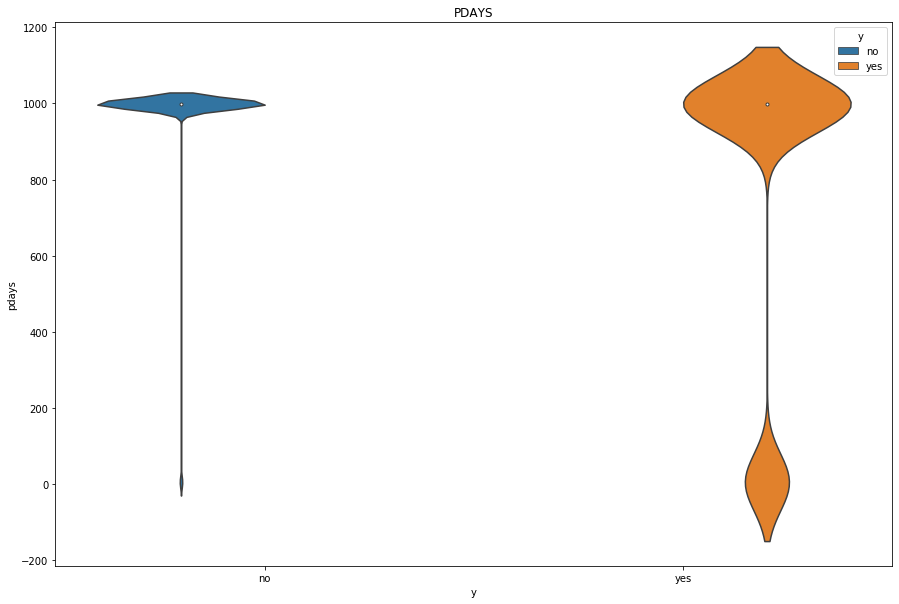

In [101]:
import matplotlib as plt
from matplotlib.pyplot import figure
violinplot_columns('pdays')

In [102]:
#From the  plot above it is visible that irrespective of class labels, mostly people have not been contacted by the bank. 
#Very people have been contacted by the bank and number of days passed for previous campaign is between 0–100. 
#It means we either must compute pdays or drop the pdays depends on the percentage of values.
#Also it is not very clear but the IQR range for the both the classes are overlapping.
#Let’s try to get the 25,50,75 percentile for this feature.


percentile=[0,25,50,75,99]
for values in percentile:
    print("Percentile values",values)
    print("For yes class")
    print(np.percentile(bank_data[bank_data['y']=='yes'].pdays,values))
    
    print("For No Class")
    print(np.percentile(bank_data[bank_data['y']=='no'].pdays,values))
    print()

Percentile values 0
For yes class
0.0
For No Class
0.0

Percentile values 25
For yes class
999.0
For No Class
999.0

Percentile values 50
For yes class
999.0
For No Class
999.0

Percentile values 75
For yes class
999.0
For No Class
999.0

Percentile values 99
For yes class
999.0
For No Class
999.0



In [103]:
# This shows that pdays have almost same percentile values for both the class labels.

In [104]:
#Feature: previous (numeric)

bank_data["previous"].value_counts()

0    35563
1     4561
2      754
3      216
4       70
5       18
6        5
7        1
Name: previous, dtype: int64

In [105]:
bank_data[bank_data["y"]=="yes"]["previous"].value_counts()

0    3141
1     967
2     350
3     128
4      38
5      13
6       3
Name: previous, dtype: int64

In [106]:
bank_data[bank_data["y"]=="no"]["previous"].value_counts()

0    32422
1     3594
2      404
3       88
4       32
5        5
6        2
7        1
Name: previous, dtype: int64

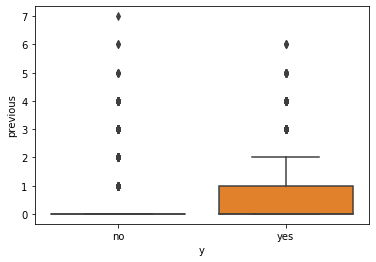

In [107]:
import matplotlib
matplotlib.use(u'nbAgg')
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline
sns.boxplot(data=bank_data, x="y", y="previous")
plt.show()

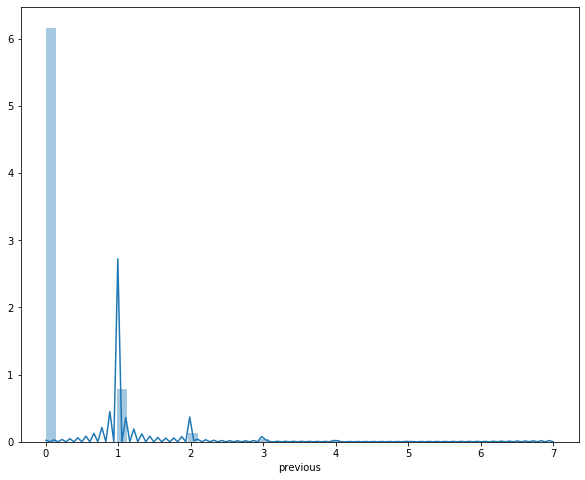

In [108]:
%matplotlib inline
plt.figure(figsize=(10,8))
sns.distplot(bank_data["previous"])
plt.show()

In [109]:
# From the above plot, there might be outliers present after the number 4.

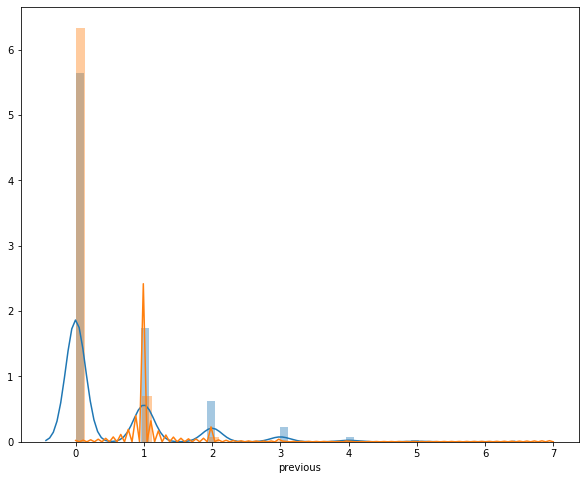

In [110]:
%matplotlib inline
plt.figure(figsize=(10,8))
sns.distplot(bank_data[bank_data["y"]=="yes"]["previous"])
sns.distplot(bank_data[bank_data["y"]=="no"]["previous"])
plt.show()

In [111]:
#The previous feature is very similarly distributed for both the classes in the target variable.
#From basic EDA it is not sure how much value this individual feature has on the target variable.

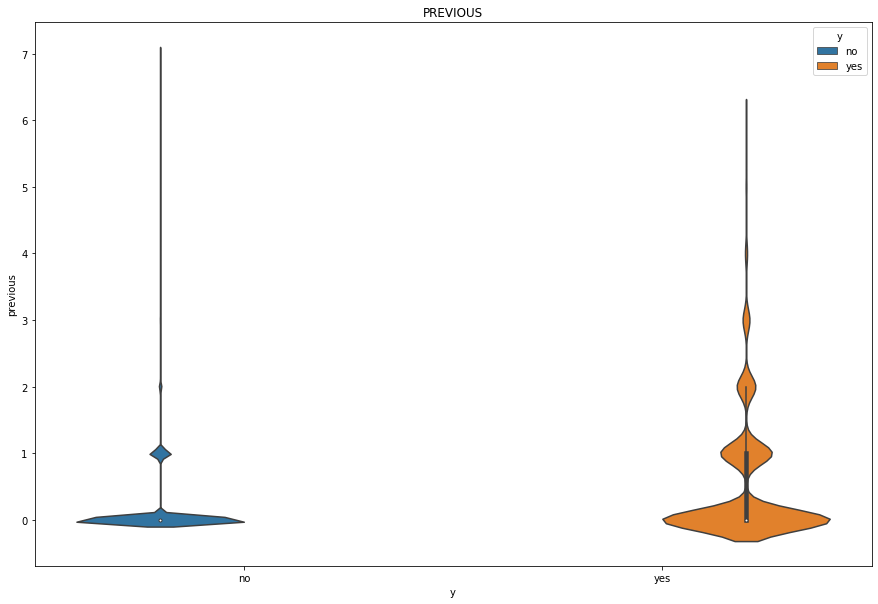

In [112]:
import matplotlib as plt
from matplotlib.pyplot import figure
violinplot_columns('previous')

In [113]:
#Using the Violin plot as shown below as we see,
#people who have contacted once for the previous campaign has subscribed for long term deposits.
#For class no,there are so many outliers starting with value 1 but for yes class, outliers are present from value 3.

#From the plot it is visible that previous feature would be helpful in predicting the class labels.

 #Lets try to get median of both the classes.
    
print(np.percentile(bank_data[bank_data['y']=='yes'].previous,50))
print(np.percentile(bank_data[bank_data['y']=='no'].previous,50))

0.0
0.0


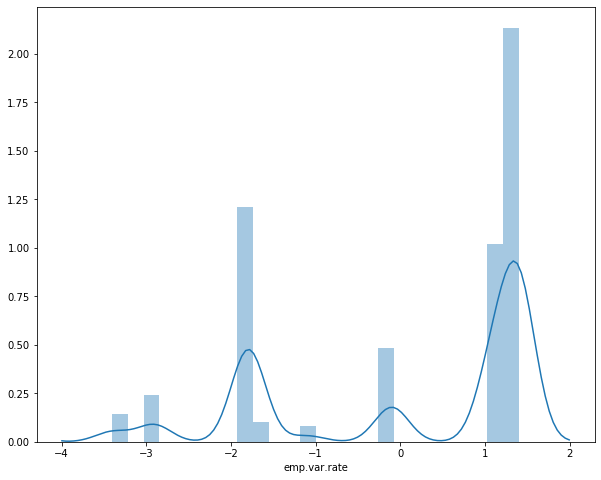

In [114]:
#Feature:emp.var.rate(numeric)

import matplotlib
matplotlib.use(u'nbAgg')
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline
plt.figure(figsize=(10,8))
sns.distplot(bank_data["emp.var.rate"])
plt.show()

In [115]:
# From above plot it is visible that there are no outliers present.

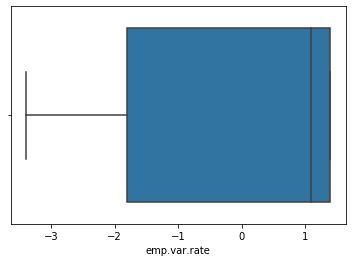

In [116]:
sns.boxplot(x=bank_data['emp.var.rate'])

In [117]:
# No outliers are present as shown above.

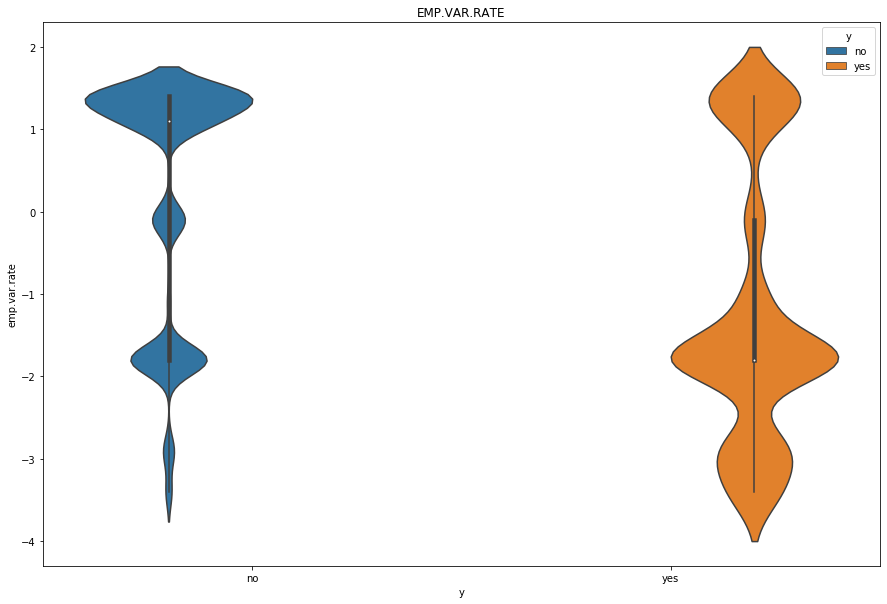

In [118]:
import matplotlib as plt
from matplotlib.pyplot import figure
violinplot_columns('emp.var.rate')

In [119]:
#There are no outliers present for any class for this feature and emp.var.rate fetaure would be very useful in predicting labels.

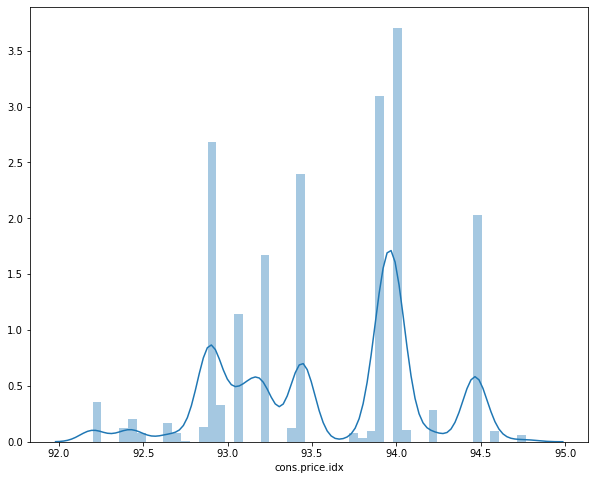

In [120]:
# cons.price.idx

import matplotlib
matplotlib.use(u'nbAgg')
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline
plt.figure(figsize=(10,8))
sns.distplot(bank_data["cons.price.idx"])
plt.show()

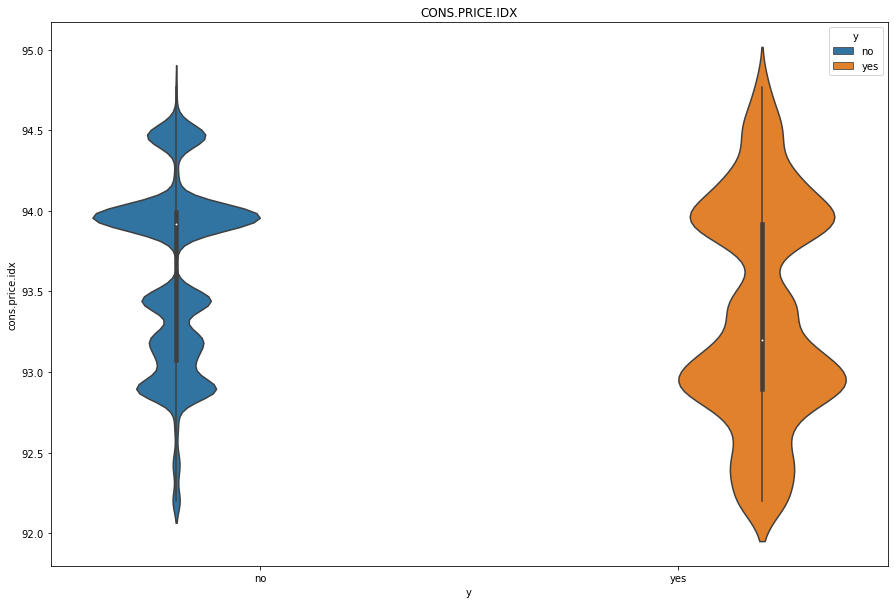

In [121]:
import matplotlib as plt
from matplotlib.pyplot import figure
violinplot_columns('cons.price.idx')

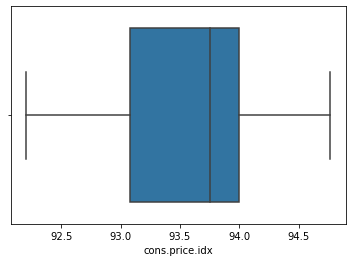

In [122]:
sns.boxplot(x=bank_data['cons.price.idx'])

In [123]:
#From the above plots, cons.price.idx does not contain any outliers 
#and they would also be very much helpful in predicting class labels.

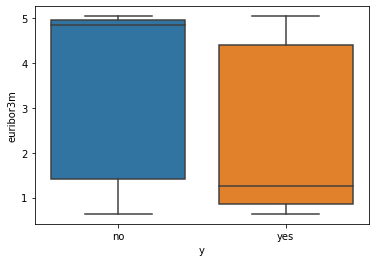

In [124]:
# euribor3m
import matplotlib
matplotlib.use(u'nbAgg')
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline
sns.boxplot(data=bank_data, x="y", y="euribor3m")
plt.show()

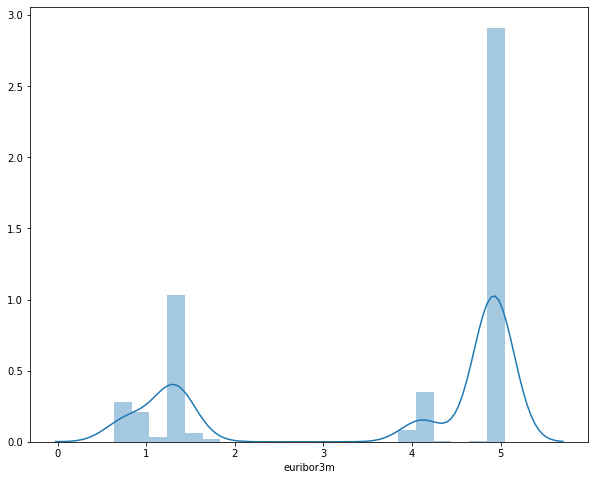

In [125]:
%matplotlib inline
plt.figure(figsize=(10,8))
sns.distplot(bank_data["euribor3m"])
plt.show()

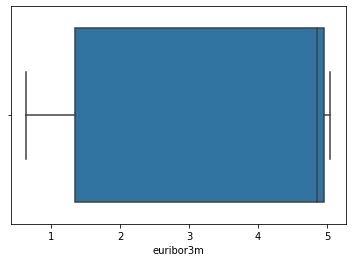

In [126]:
sns.boxplot(x=bank_data['euribor3m'])

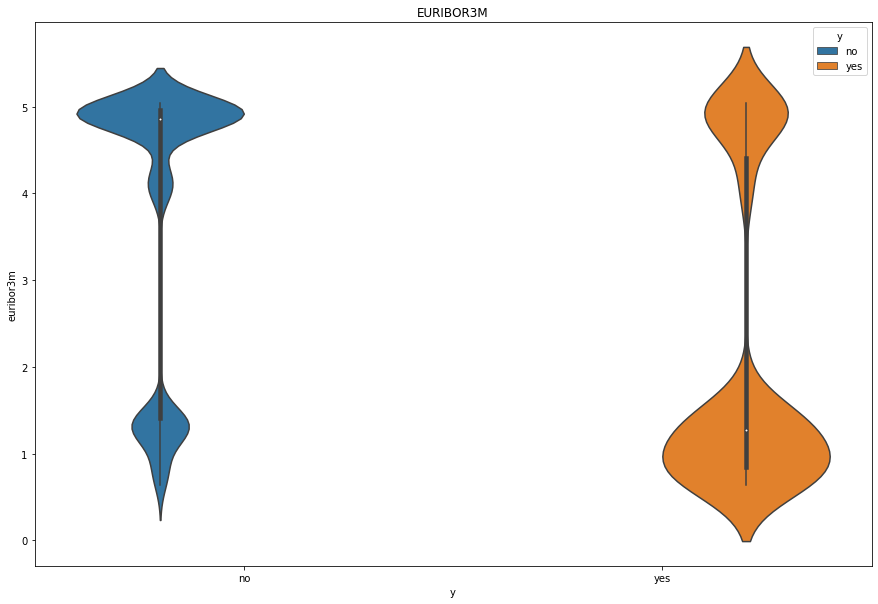

In [127]:
import matplotlib as plt
from matplotlib.pyplot import figure
violinplot_columns('euribor3m')

In [128]:
# From the above plots,Euribor3m doesnot contain outliers and would be very much helpful in predicting the class labels.

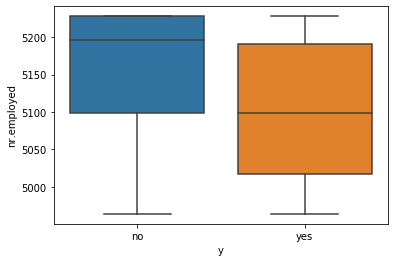

In [129]:
# nr.employed
import matplotlib
matplotlib.use(u'nbAgg')
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline
sns.boxplot(data=bank_data, x="y", y="nr.employed")
plt.show()

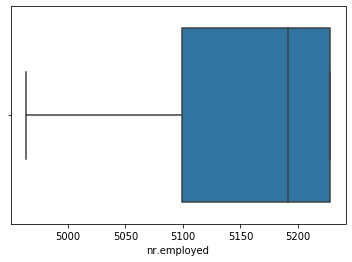

In [130]:
sns.boxplot(x=bank_data['nr.employed'])

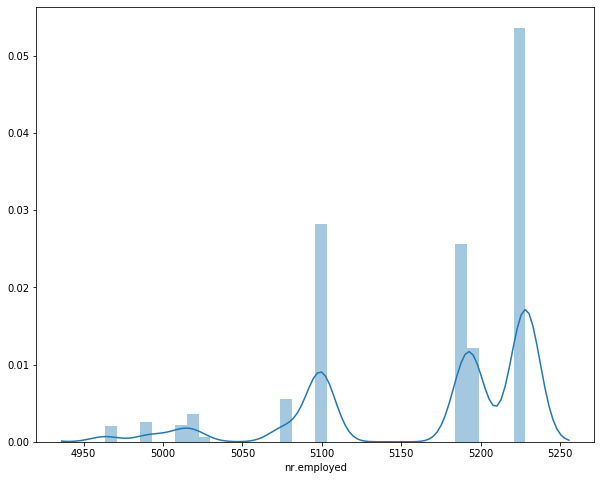

In [131]:
%matplotlib inline
plt.figure(figsize=(10,8))
sns.distplot(bank_data["nr.employed"])
plt.show()

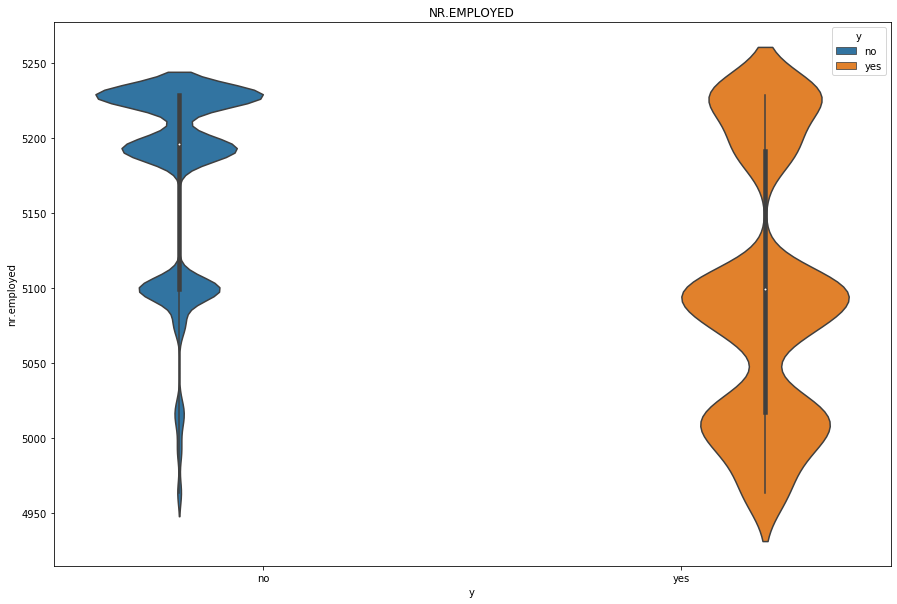

In [132]:
import matplotlib as plt
from matplotlib.pyplot import figure
violinplot_columns('nr.employed')

In [133]:
#From the above plots, nr.employed does not contain outliers 
#nr.employed would also be very much helpful in predicting class labels.

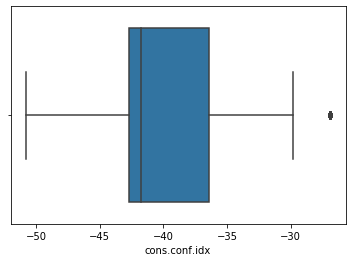

In [134]:
#cons.conf.idx

sns.boxplot(x=bank_data['cons.conf.idx'])

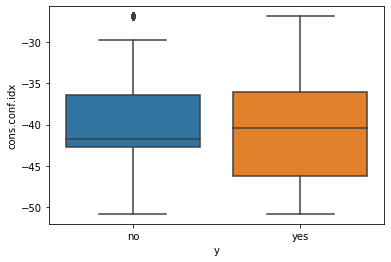

In [135]:
import matplotlib
matplotlib.use(u'nbAgg')
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
sns.boxplot(data=bank_data, x="y", y="cons.conf.idx")
plt.show()

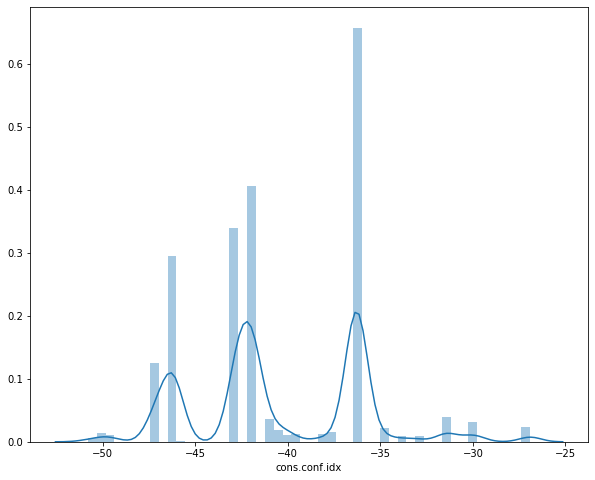

In [136]:
import matplotlib
matplotlib.use(u'nbAgg')
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline
plt.figure(figsize=(10,8))
sns.distplot(bank_data["cons.conf.idx"])
plt.show()

In [137]:
#From the above plots,Euribor3m doesnot contain outliers and would be very much helpful in predicting the class labels.

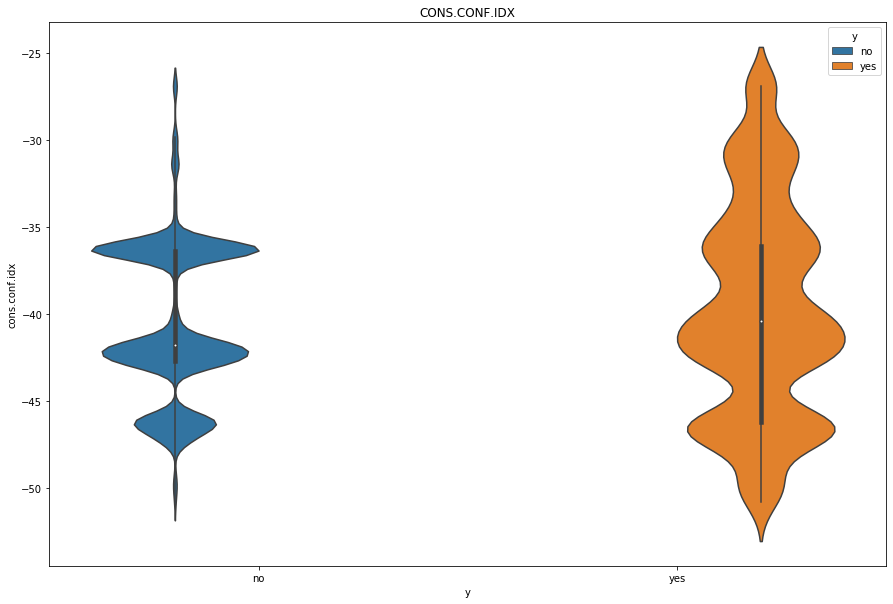

In [138]:
import matplotlib as plt
from matplotlib.pyplot import figure
violinplot_columns('cons.conf.idx')

In [139]:
#In cons.conf.idx feature for class labels no, there is an outlier present when value above -30.

Text(0.5, 1.05, 'Pearson correlation of Features')

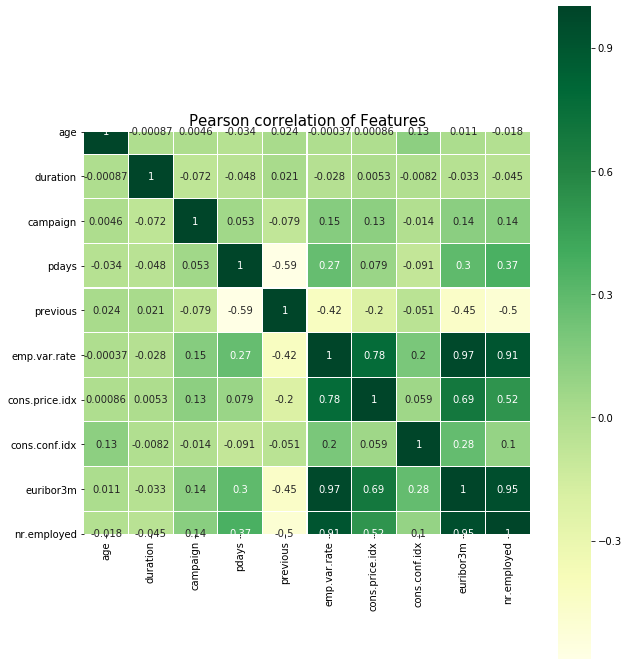

In [140]:
#Correlation
# I am going to use a Pearson correlation.
# Let’s Check for correlation of features between the numerical Features.
import matplotlib
matplotlib.use(u'nbAgg')
import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib inline
corr = bank_data.corr()

f, ax = plt.subplots(figsize=(10,12))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

_ = sns.heatmap(corr, cmap="YlGn", square=True, ax=ax, annot=True, linewidth=0.1)

plt.title("Pearson correlation of Features", y=1.05, size=15)

In [141]:
# From the above heatmap we can see that there are some numerical features which share a high correlation between them
#, e.g nr.employed and euribor3m these features share a correlation value of 0.95,
# and euribor3m and emp.var.rate share a correlation of 0.97,
# which is very high compared to the other features that we see in the heatmap.

In [142]:
# Feature Engineering:
# Feature engineering is the process of converting data into features that improves the prediction 
#and performance of model in unseen data.
# Converting an age(numerical) variable to a categorical variable.

# Here I have created 9 groups from minimum age 10 to maximum age 100. 
#After creating, inserted the age group into data frame and deleted the age column from the data frame.
def age_to_categorical(bank_data1,age):
    age_group=pd.cut(age,bins=[10,20,30,40,50,60,70,80,90,100],labels=['10-19','20-29','30-39','40-49','50-59','60-69','70-79','80-89','90-100'])
    #inserting the age group after age and deleting it
    bank_data1.insert(1,'age_group',age_group)
    #dropping age column
    bank_data1.drop('age',axis=1,inplace=True)
    
    return bank_data1
bank_data1=age_to_categorical(bank_data,bank_data.age)


In [143]:
# We now have a new dataframe bank_data1 with a new variable,age_group.
bank_data1

,age_group,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,50-59,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,50-59,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,30-39,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,30-39,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,50-59,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,70-79,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,40-49,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,50-59,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,40-49,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [144]:
# I will now create i_loan based on the columns['loan','housing'],status we have 3 status yes,no, unknown.
# If any 2 columns have status yes then ,i_loan will have yes as status,
#if any of the columns have  no as status ,then i_loan will have no as status or else unknown status.

def creating_i_loan(bank_data2):
    i_loan=[]
    for index in range(len(bank_data2)):
        if (bank_data2['housing'].loc[index]=='yes' or bank_data2['loan'].loc[index]=='yes'):
            i_loan.append('yes')
        elif (bank_data2['housing'].loc[index]=='no' or bank_data2['loan'].loc[index]=='no'):
            i_loan.append('no')
        
        else:
            i_loan.append('unknown')
    bank_data2.insert(5,'i_loan',i_loan,True)   
    bank_data2.drop(['loan','housing'],axis=1,inplace=True)
    return bank_data2           
bank_data2=creating_i_loan(bank_data1)

In [145]:
# This is how a new dataframe looks,the dataframe now has a new variable i_loan and there are now 20 variables present.
bank_data2

,age_group,job,marital,education,default,i_loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,50-59,housemaid,married,basic.4y,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,50-59,services,married,high.school,unknown,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,30-39,services,married,high.school,no,yes,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,30-39,admin.,married,basic.6y,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,50-59,services,married,high.school,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,70-79,retired,married,professional.course,no,yes,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,40-49,blue-collar,married,professional.course,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,50-59,retired,married,university.degree,no,yes,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,40-49,technician,married,professional.course,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [146]:
def countplot_columns(columns):
    figure(figsize=(15,10))
    plot=sns.countplot(x=columns,data=bank_data2)
    total=len(bank_data2['y'])
    
    for p in plot.patches:
        
        plot.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x(), p.get_height()))
    plot.yaxis.set_ticks(np.linspace(0, total, 11))
    plot.set_yticklabels(map('{:.1f}%'.format, 100*plot.yaxis.get_majorticklocs()/total))
    plt.pyplot.show()

In [147]:
def countplot_target_varaible(columns,classes):
    figure(figsize=(15,10))
    total=len(bank_data2[classes])
    plot=sns.countplot(x=columns,data=bank_data2,hue=classes)
    for p in plot.patches:
        plot.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x(), p.get_height()))
    plot.yaxis.set_ticks(np.linspace(0, total, 11))
    plot.set_yticklabels(map('{:.1f}%'.format, 100*plot.yaxis.get_majorticklocs()/total))
    plt.pyplot.show()

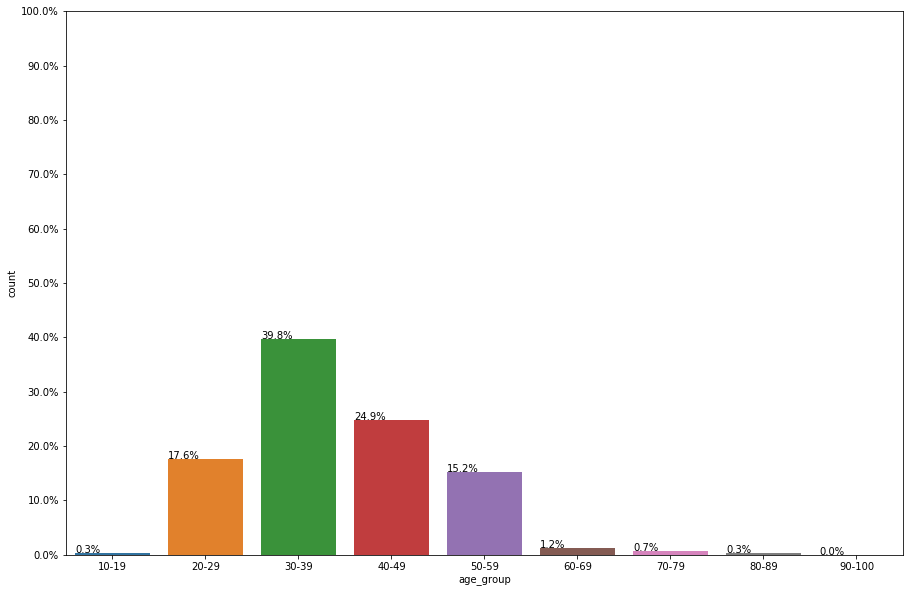

In [148]:
import seaborn as sns
import matplotlib as plt  
import warnings
warnings.filterwarnings("ignore")
from matplotlib.pyplot import figure
countplot_columns('age_group')

In [149]:
# As shown above,the bank has contacted to the most between the age group of 30-39 followed by 40-49.

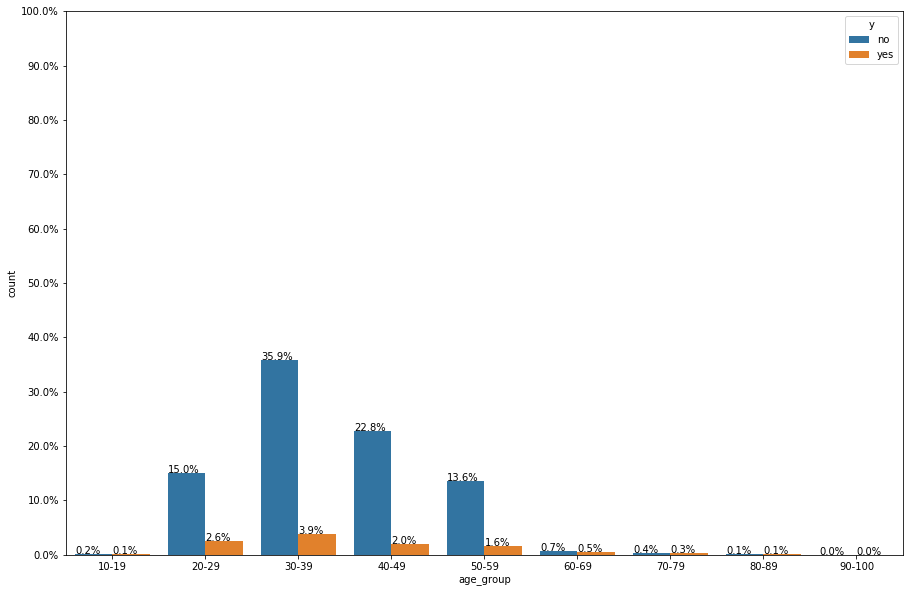

In [150]:
countplot_target_varaible('age_group','y')

In [151]:
#Age group of 30-39 are the most people who have not subscribed for the deposits.
#They are also the most who have subscribed for the deposits.

In [152]:
# However we can use other plots to check for outliers ,Violin plot and box plot.
import matplotlib as plt
from matplotlib.pyplot import figure
def plotting_violinplot(columns,y='y'):
    figure(figsize=(15,10))
    sns.violinplot(x=bank_data2[y],y=bank_data2[columns],hue=bank_data2['y'],showfliers=False)
    plt.pyplot.title(columns.upper())

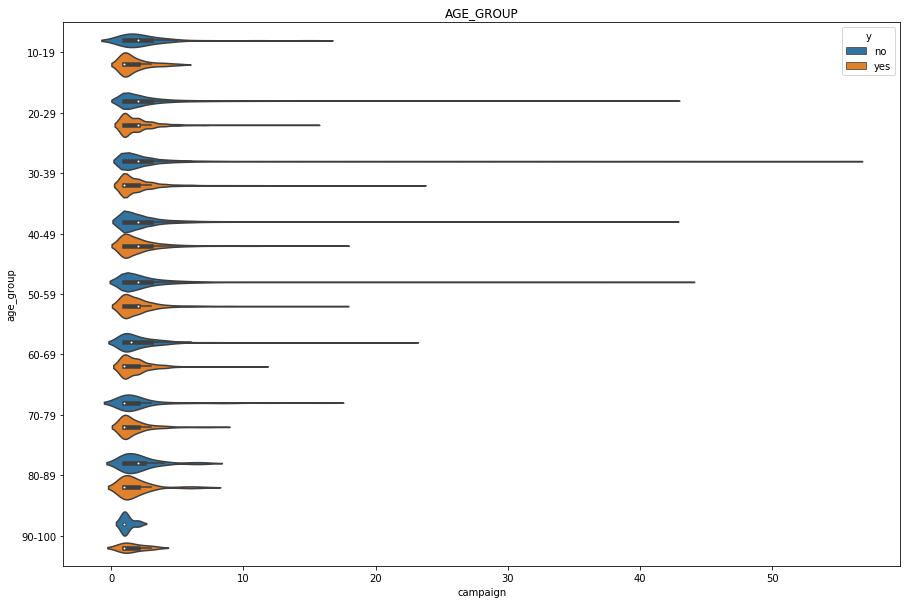

In [153]:
plotting_violinplot('age_group','campaign')

In [154]:
#Number of campaigns from 1-7 and age above 70 has possible outliers.

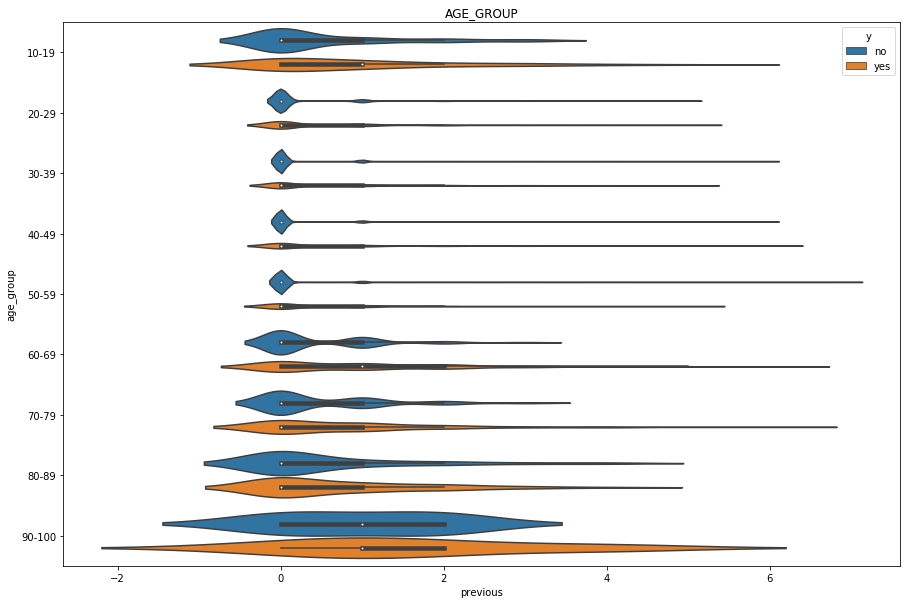

In [155]:
plotting_violinplot('age_group','previous')

In [156]:
#For number of previous campaigns from 0-1 and  age group above 70 are possible outliers.
#For number of contacts for previous campaigns as 2, age around 90 are possible outliers. 
#For number of previous campaign from 3-4 age around 80 are possible outliers.

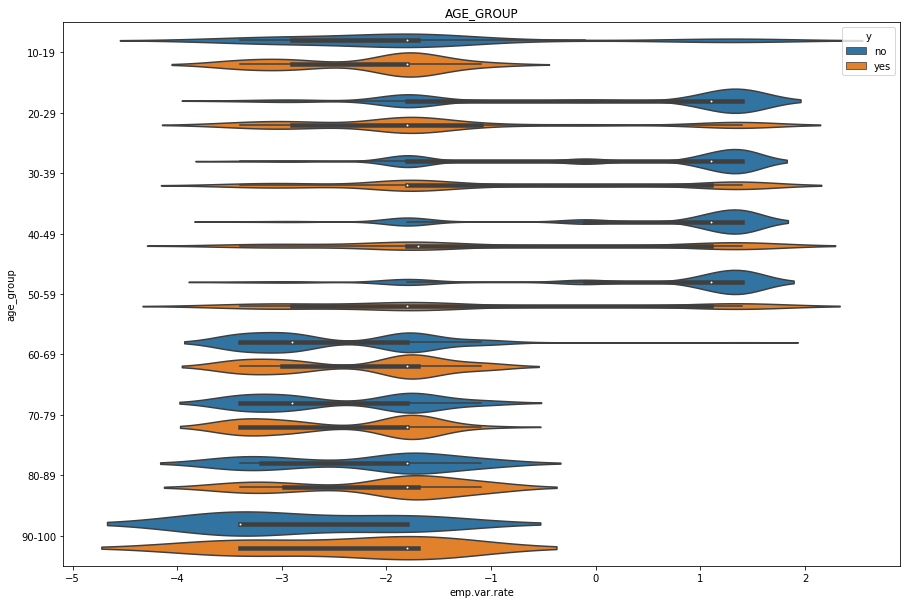

In [157]:
plotting_violinplot('age_group','emp.var.rate')

In [158]:
#For emp.var.rate with -1.8 has most outliers above age around 60.

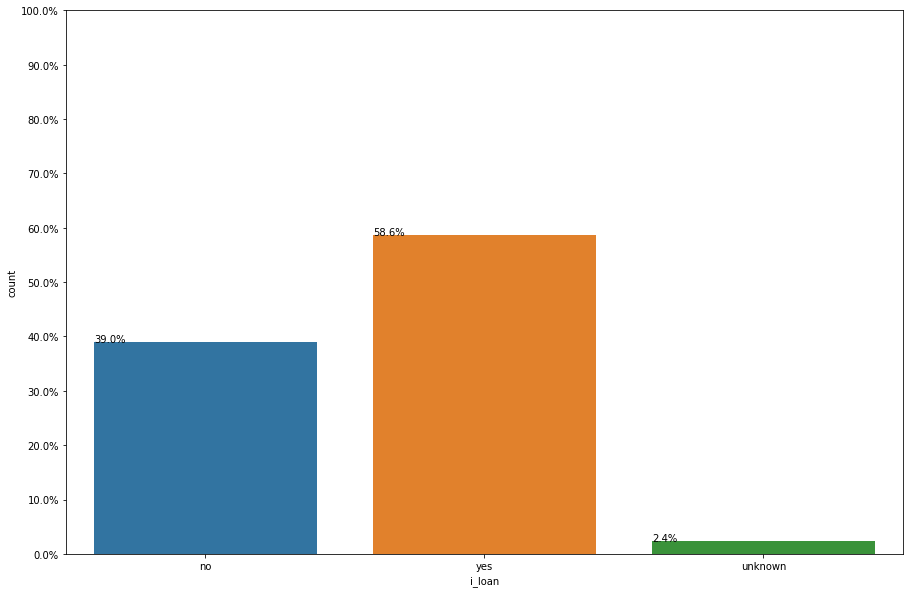

In [159]:
countplot_columns('i_loan')

In [160]:
#Most of the people bank has contacted either have personal or housing loan. Very few of the status of loan is unknown.

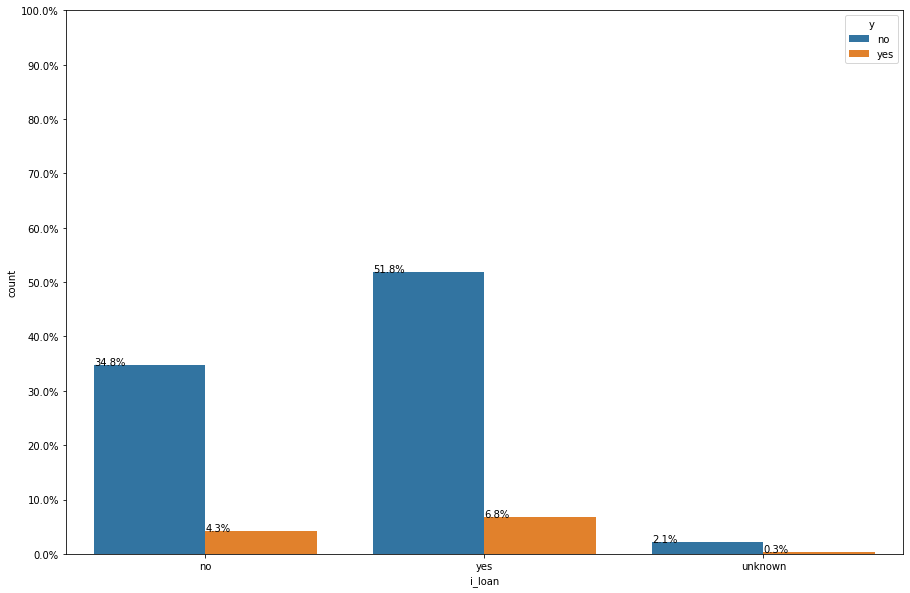

In [161]:
countplot_target_varaible('i_loan','y')

In [162]:
#People who have loans are in majority who have subscribed for deposits. 
#They are also the ones who have not subscribed for the deposits.

In [163]:
def plotting_catplot(column1,column2,height=10):
    sns.catplot(x=column1, col=column2,hue='y',col_wrap=2,data=bank_data2,kind="count", height=height, aspect=.8)

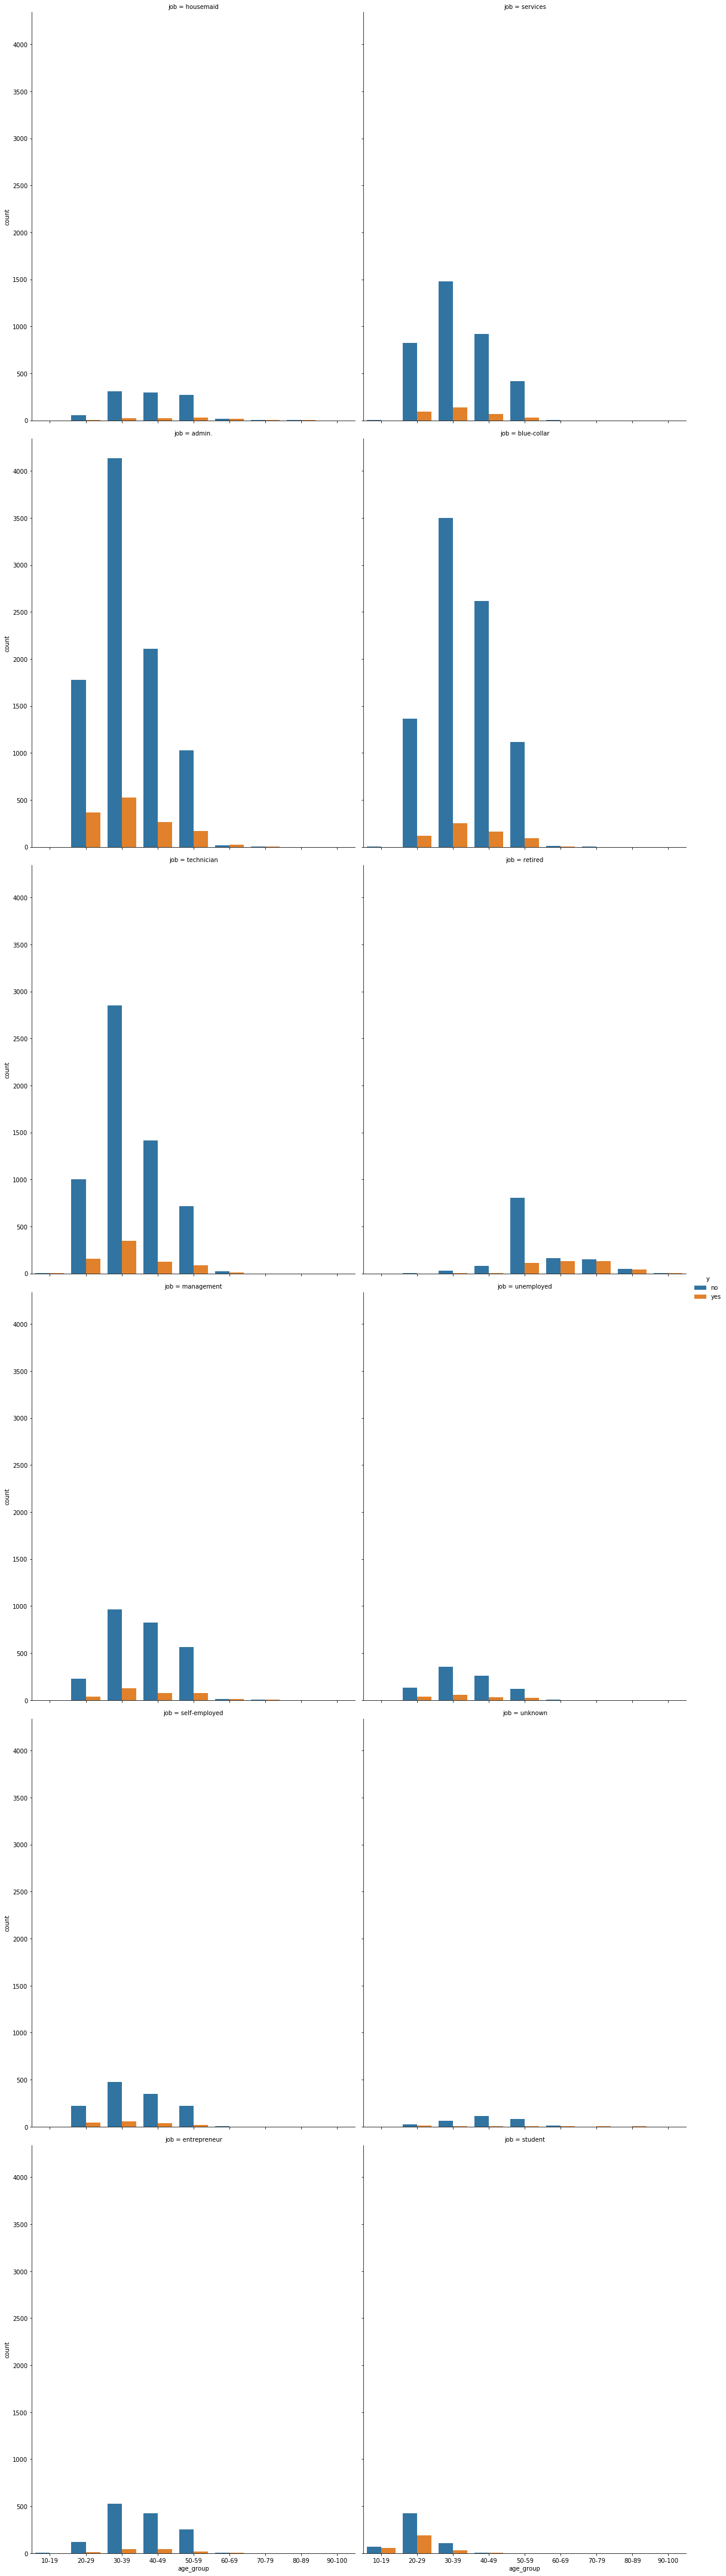

In [164]:
#Age Group and Job

plotting_catplot('age_group','job')

In [165]:
#People whose job professions are being admins and age group between 30-39 has the highest number for subscribing for deposits.
#Followed by the age groups between 20-29 and 40-49 in the same profession.

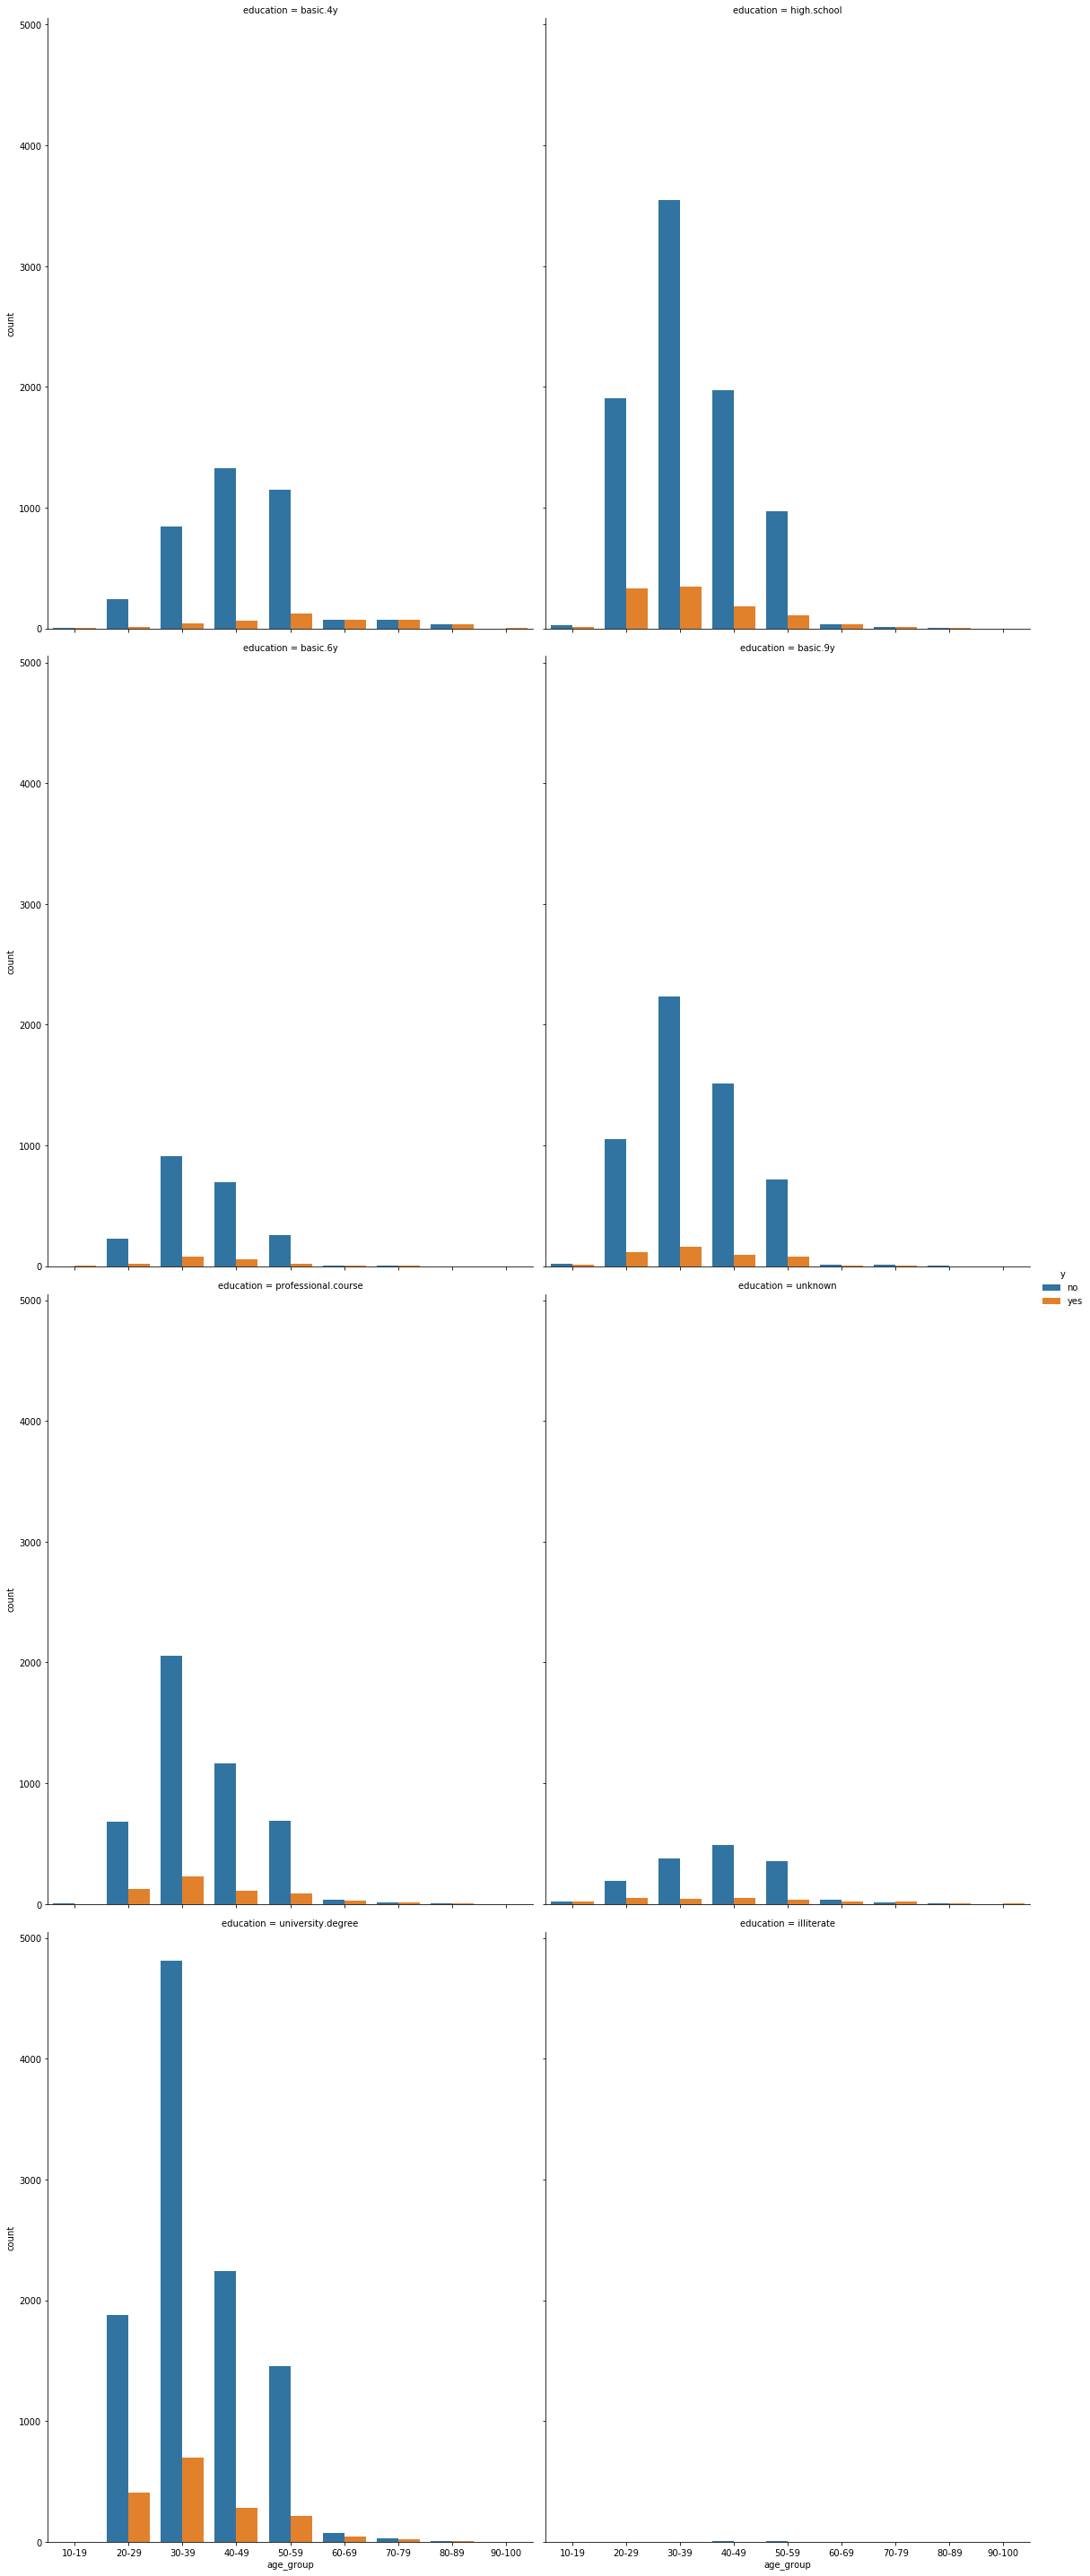

In [166]:
#Age Group and Education

plotting_catplot('age_group','education')

In [167]:
#People who are in age group of 30-39 and have completed university are the most ones who have 
#and have not subscribed for deposits.

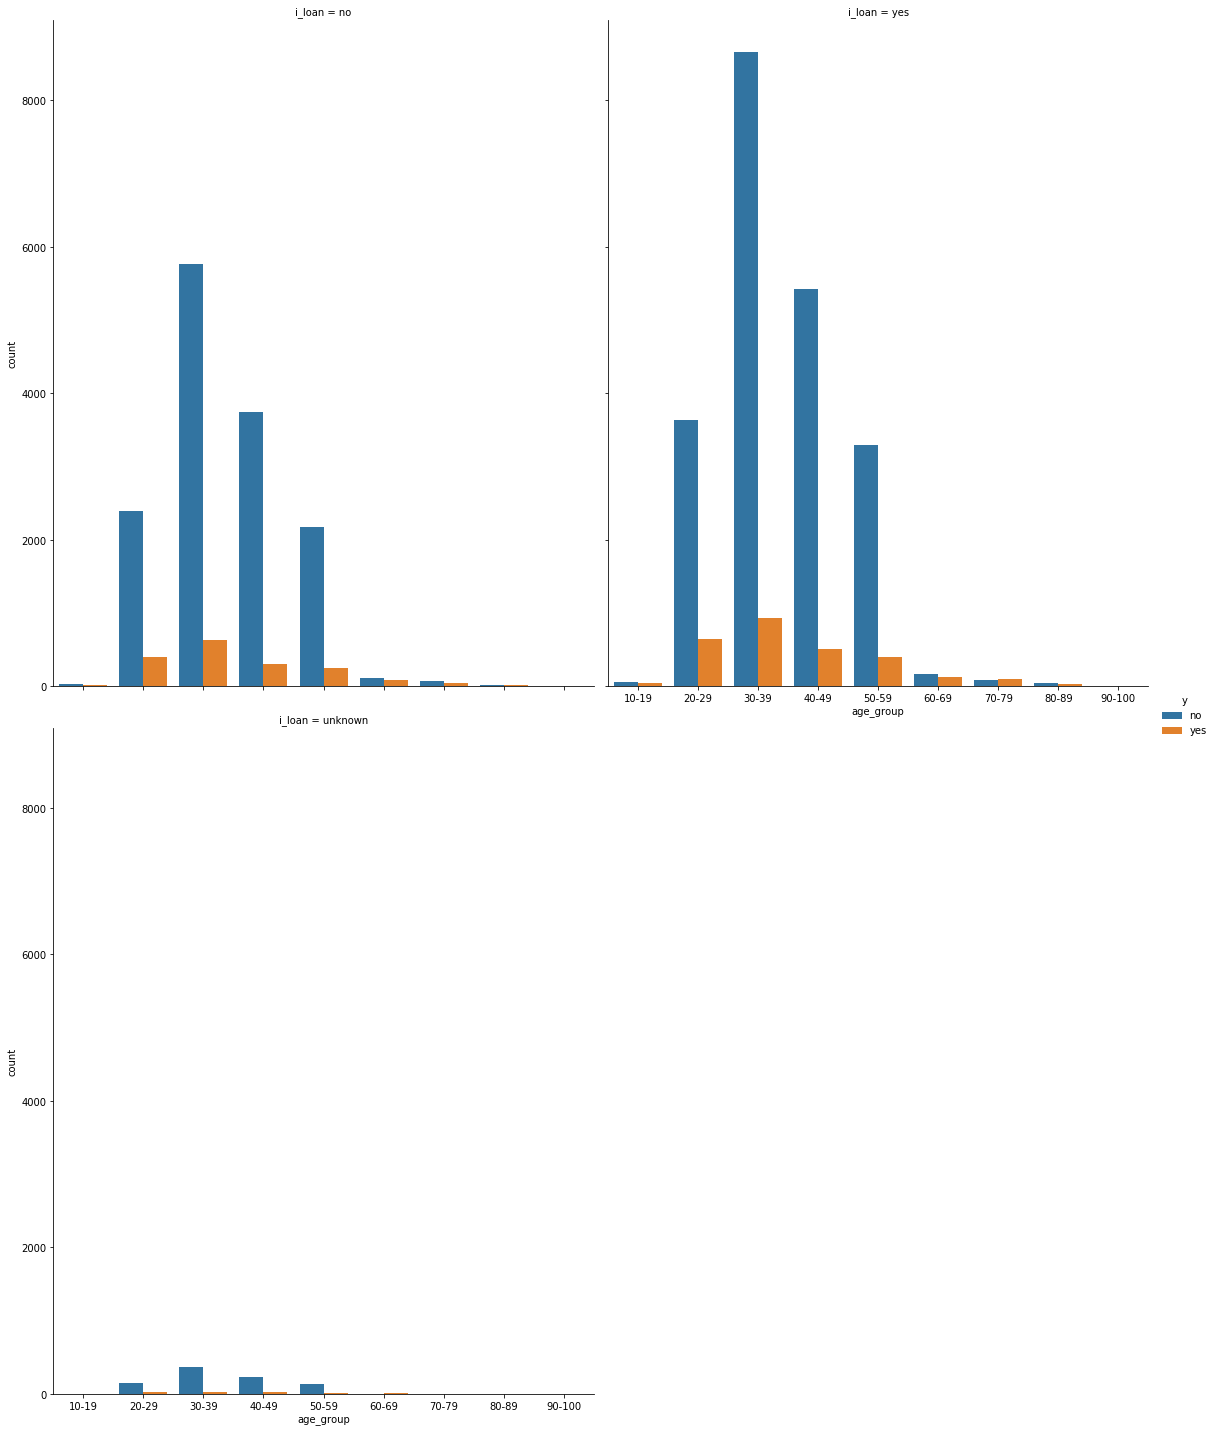

In [168]:
#Age Group and Iloan
plotting_catplot('age_group','i_loan')


In [169]:
#People who are in age group of 30-39 and have loans are the most ones who have subscribed for long term deposits.
#They are also the most ones who have not subscribed for it.

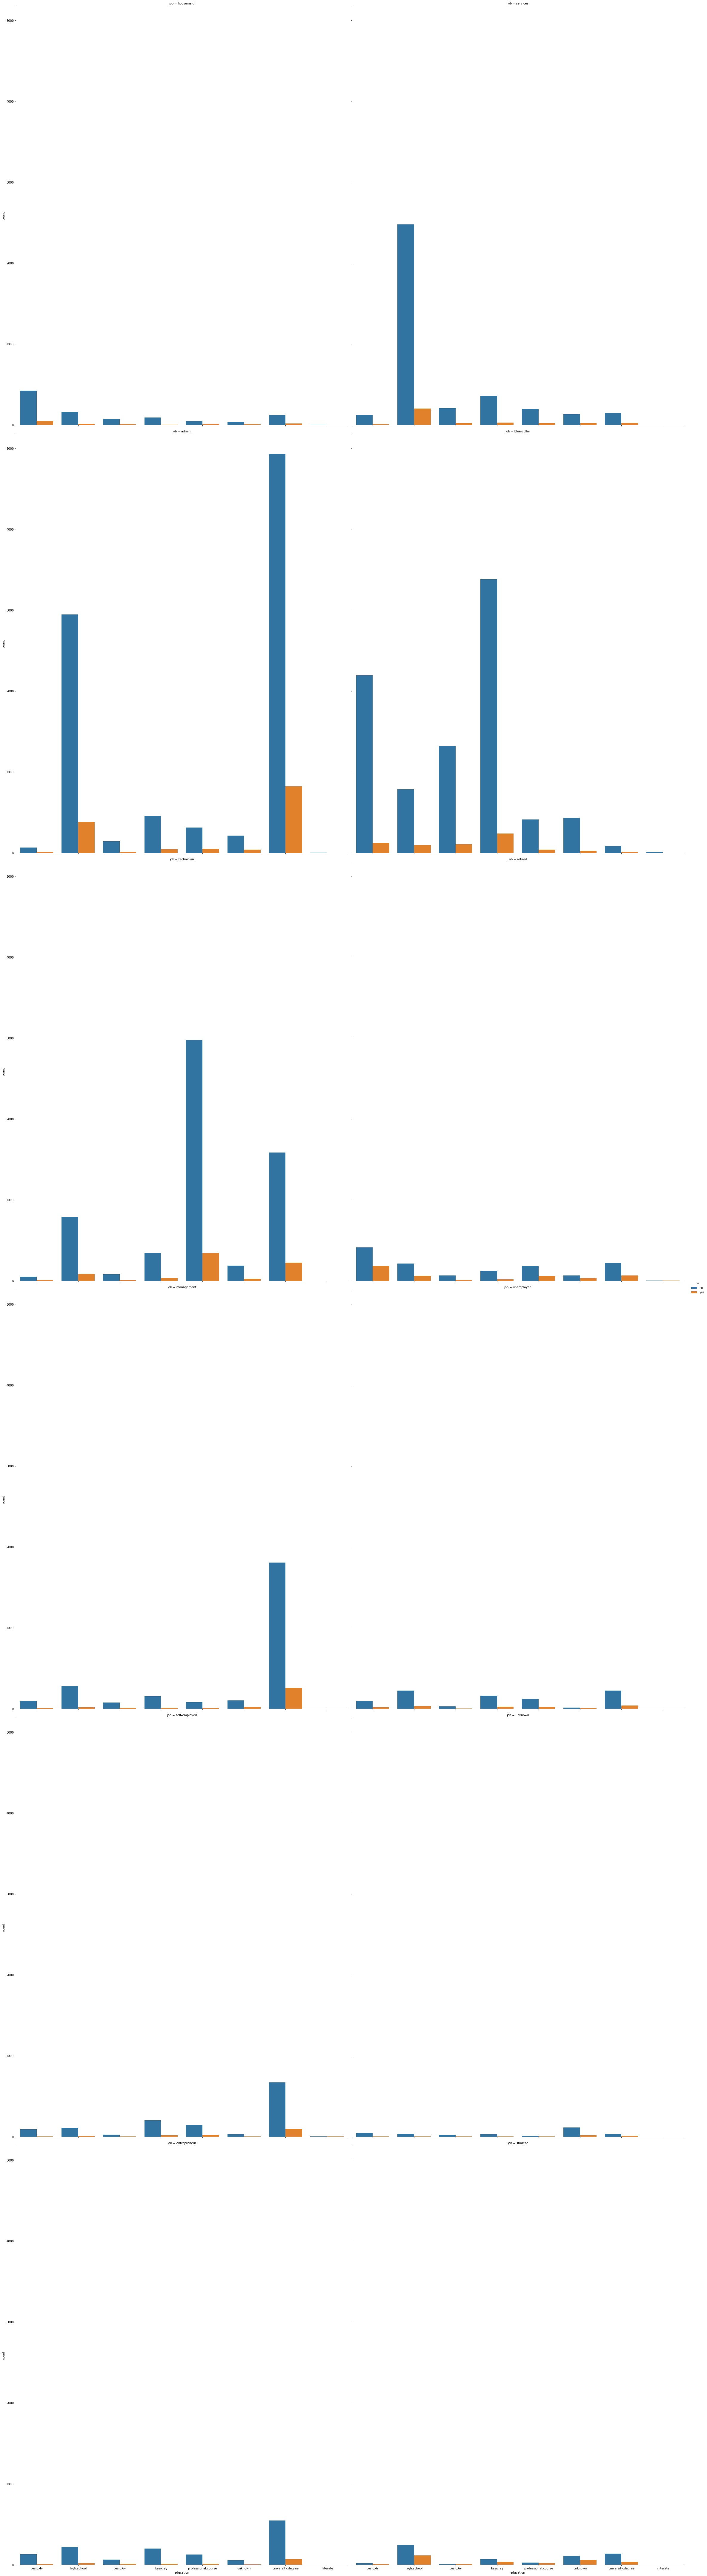

In [170]:
# Education and Job 
plotting_catplot('education','job',20)

In [171]:
#People who are admins and have completed univeristy are the most ones who have subscribed for long term deposits.
#They are also the most ones who have not subscribed for long term deposits.

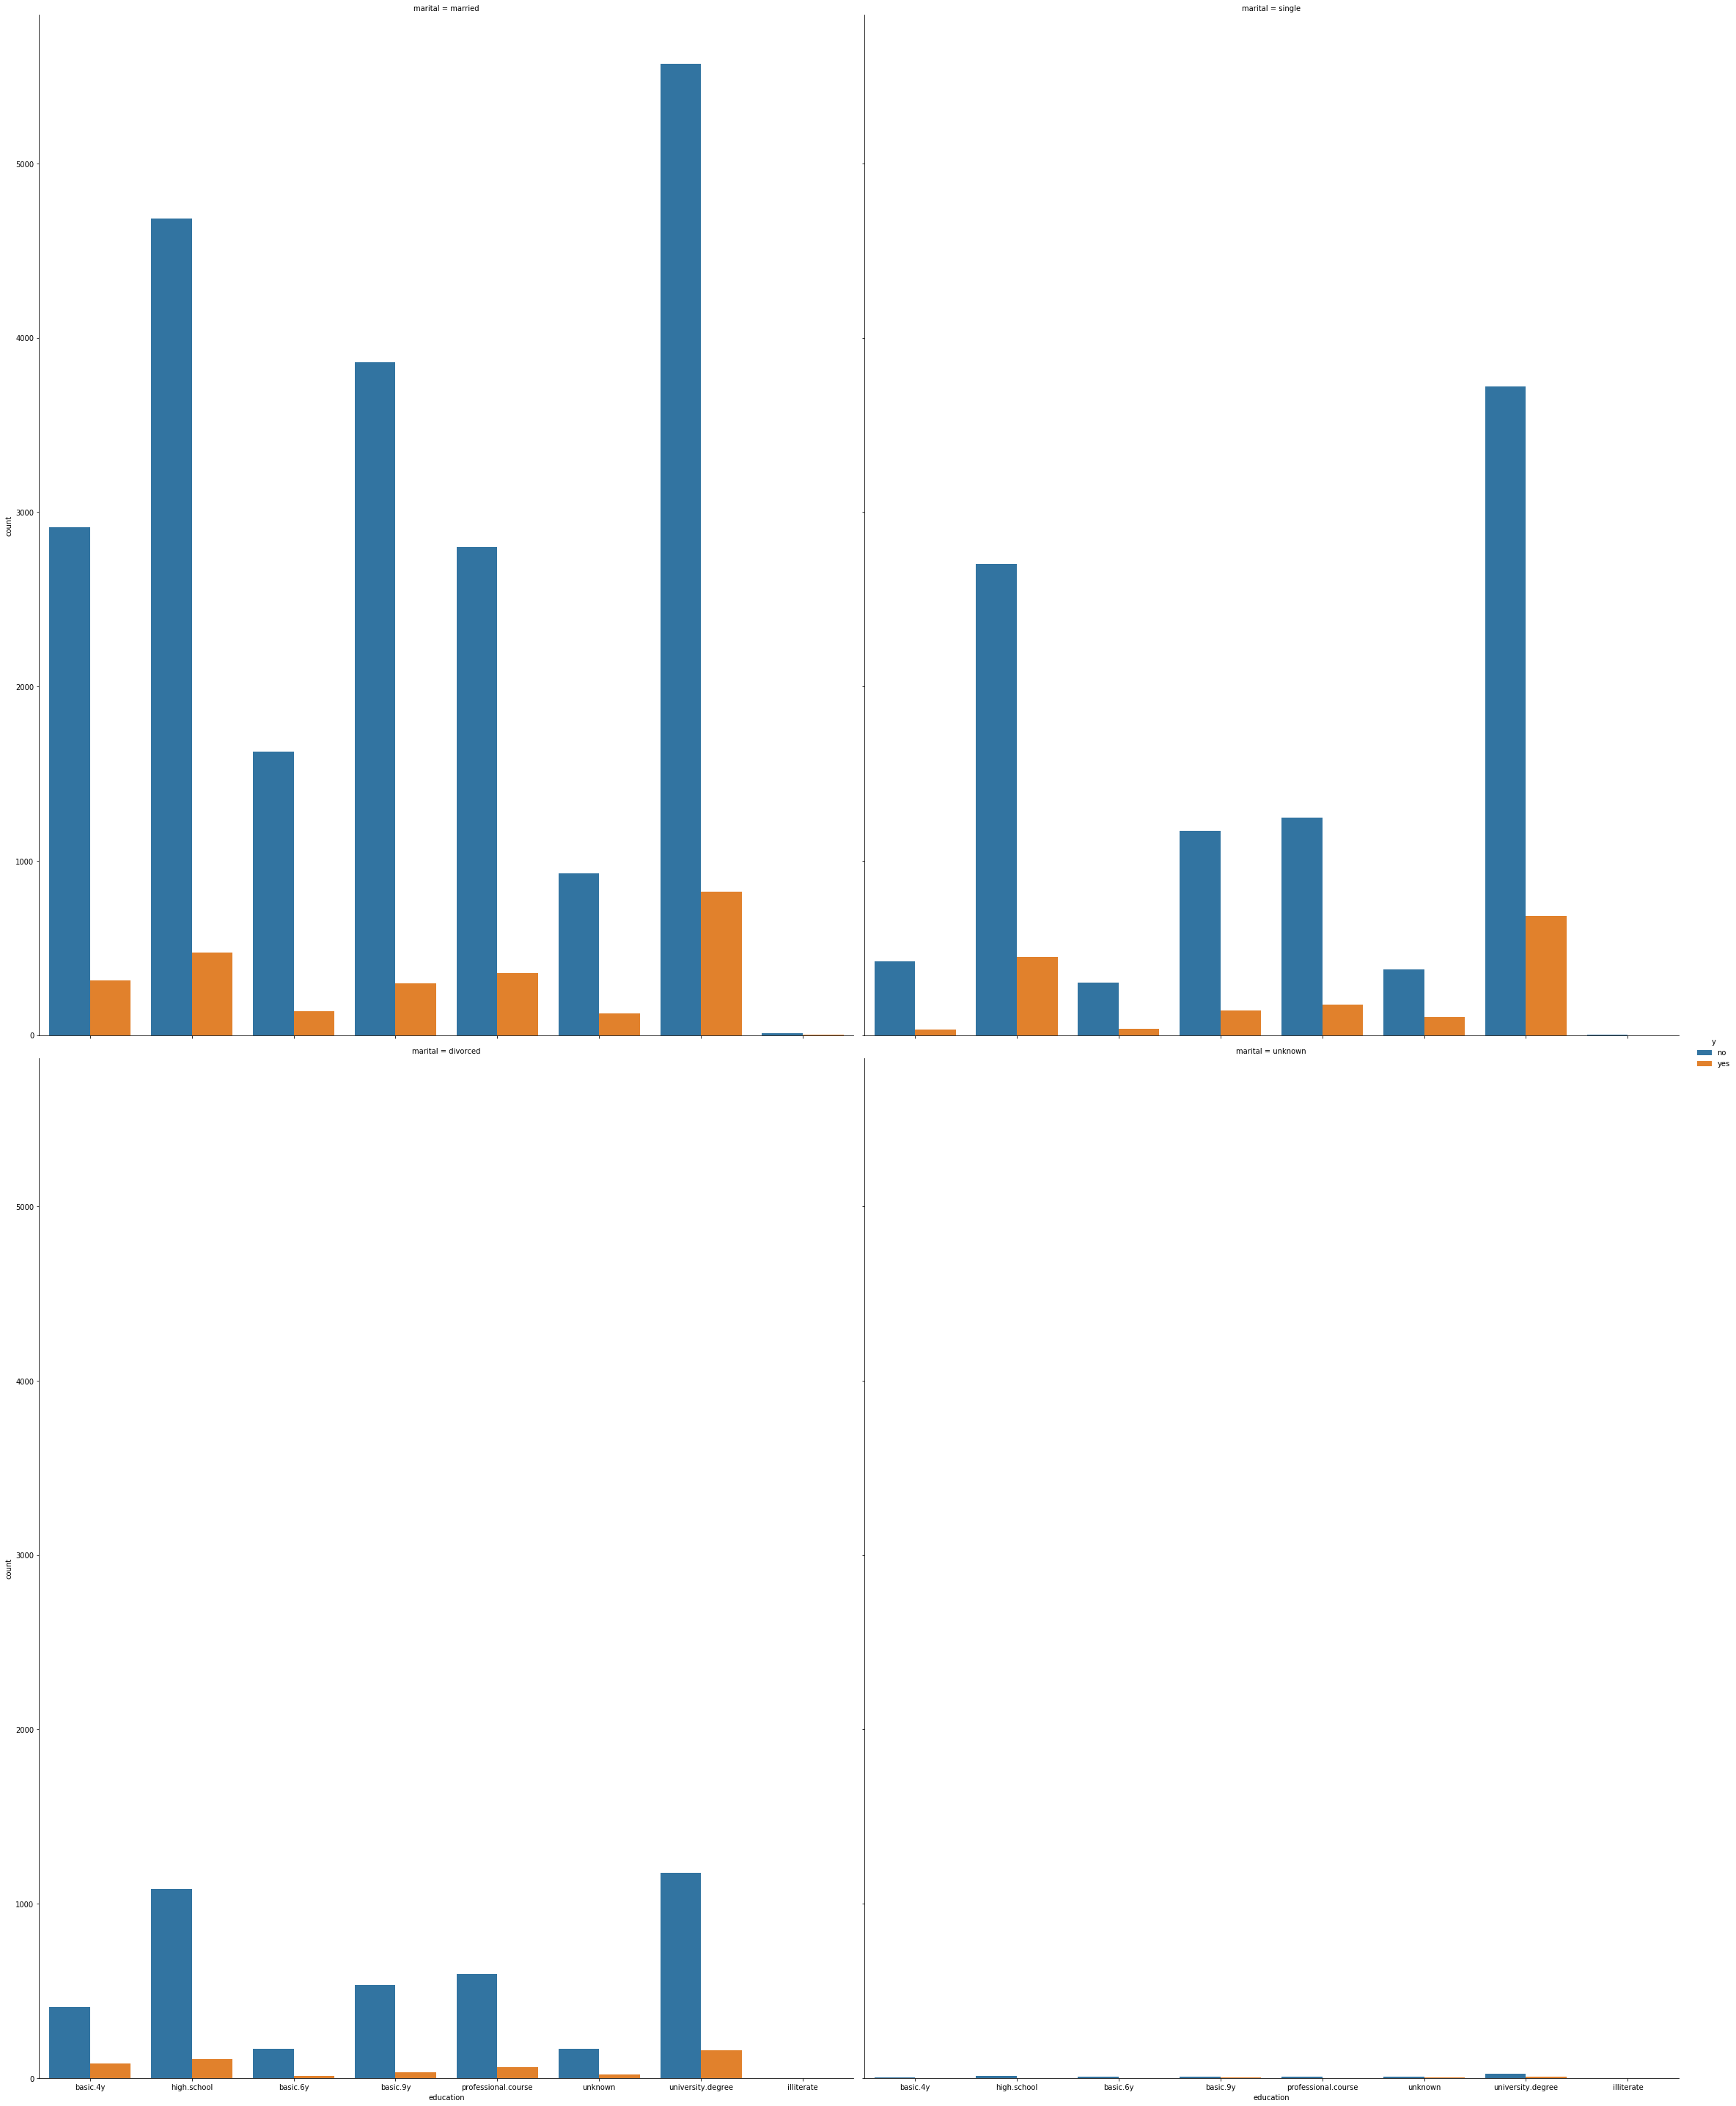

In [172]:
# Education and Marital 

plotting_catplot('education','marital',20)

In [173]:
#People who have done university and are either single or married are the most ones who have subscribed for the deposits.
#People who are married and have done univeristy are the most ones who have not subscribed for long term deposits.

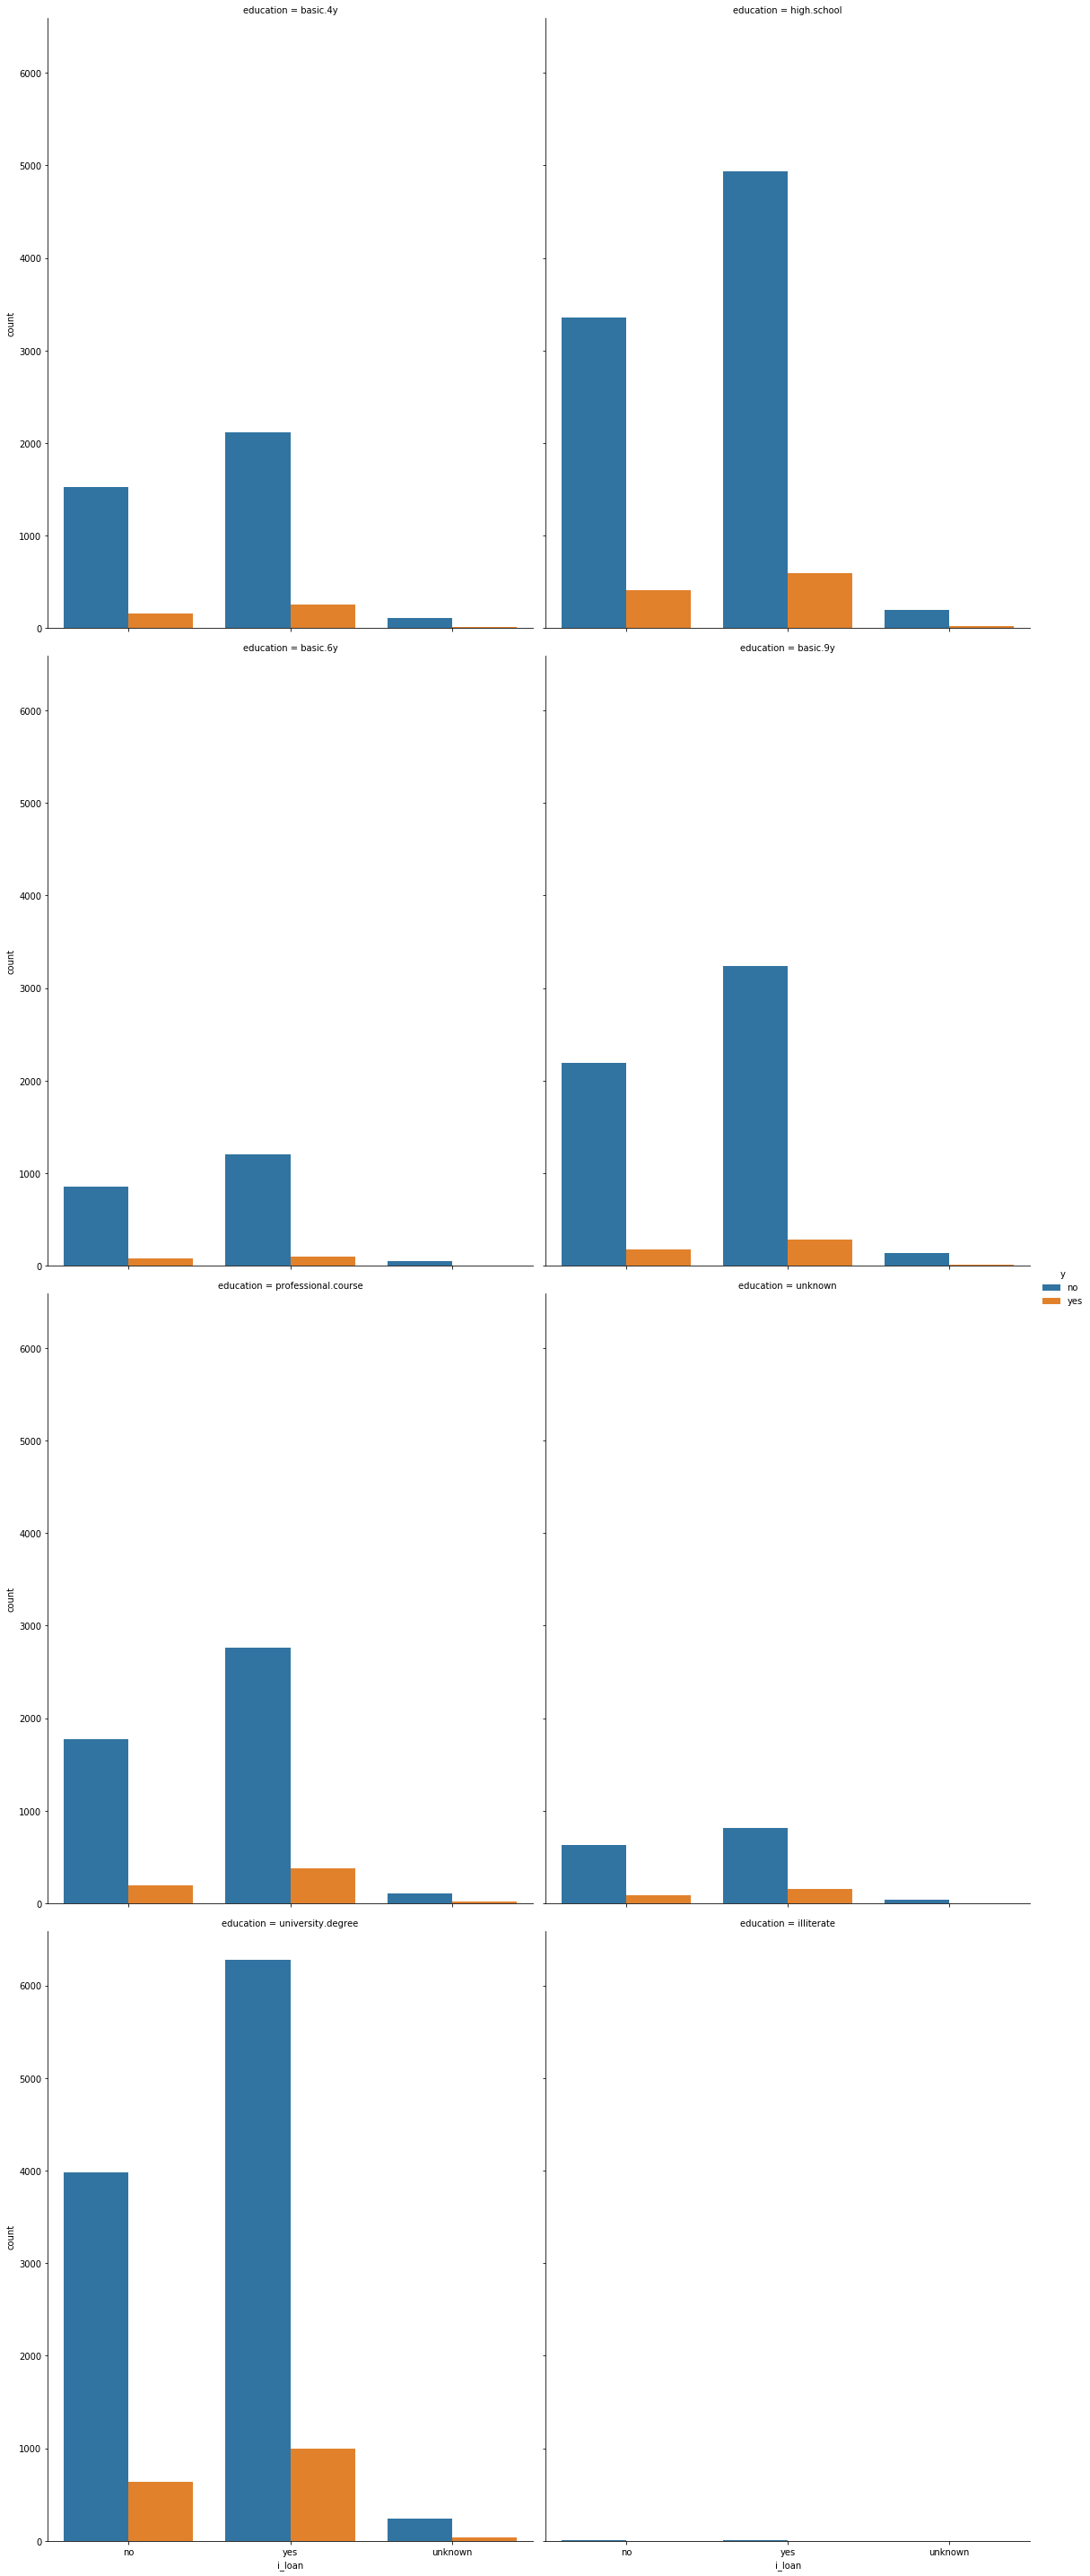

In [174]:
#I_loan and Education 

plotting_catplot('i_loan','education')

In [175]:
#People who are in university and have loans are the most ones who have subscribed for deposits.
#They are also the most people who have not subscribed for their deposits.

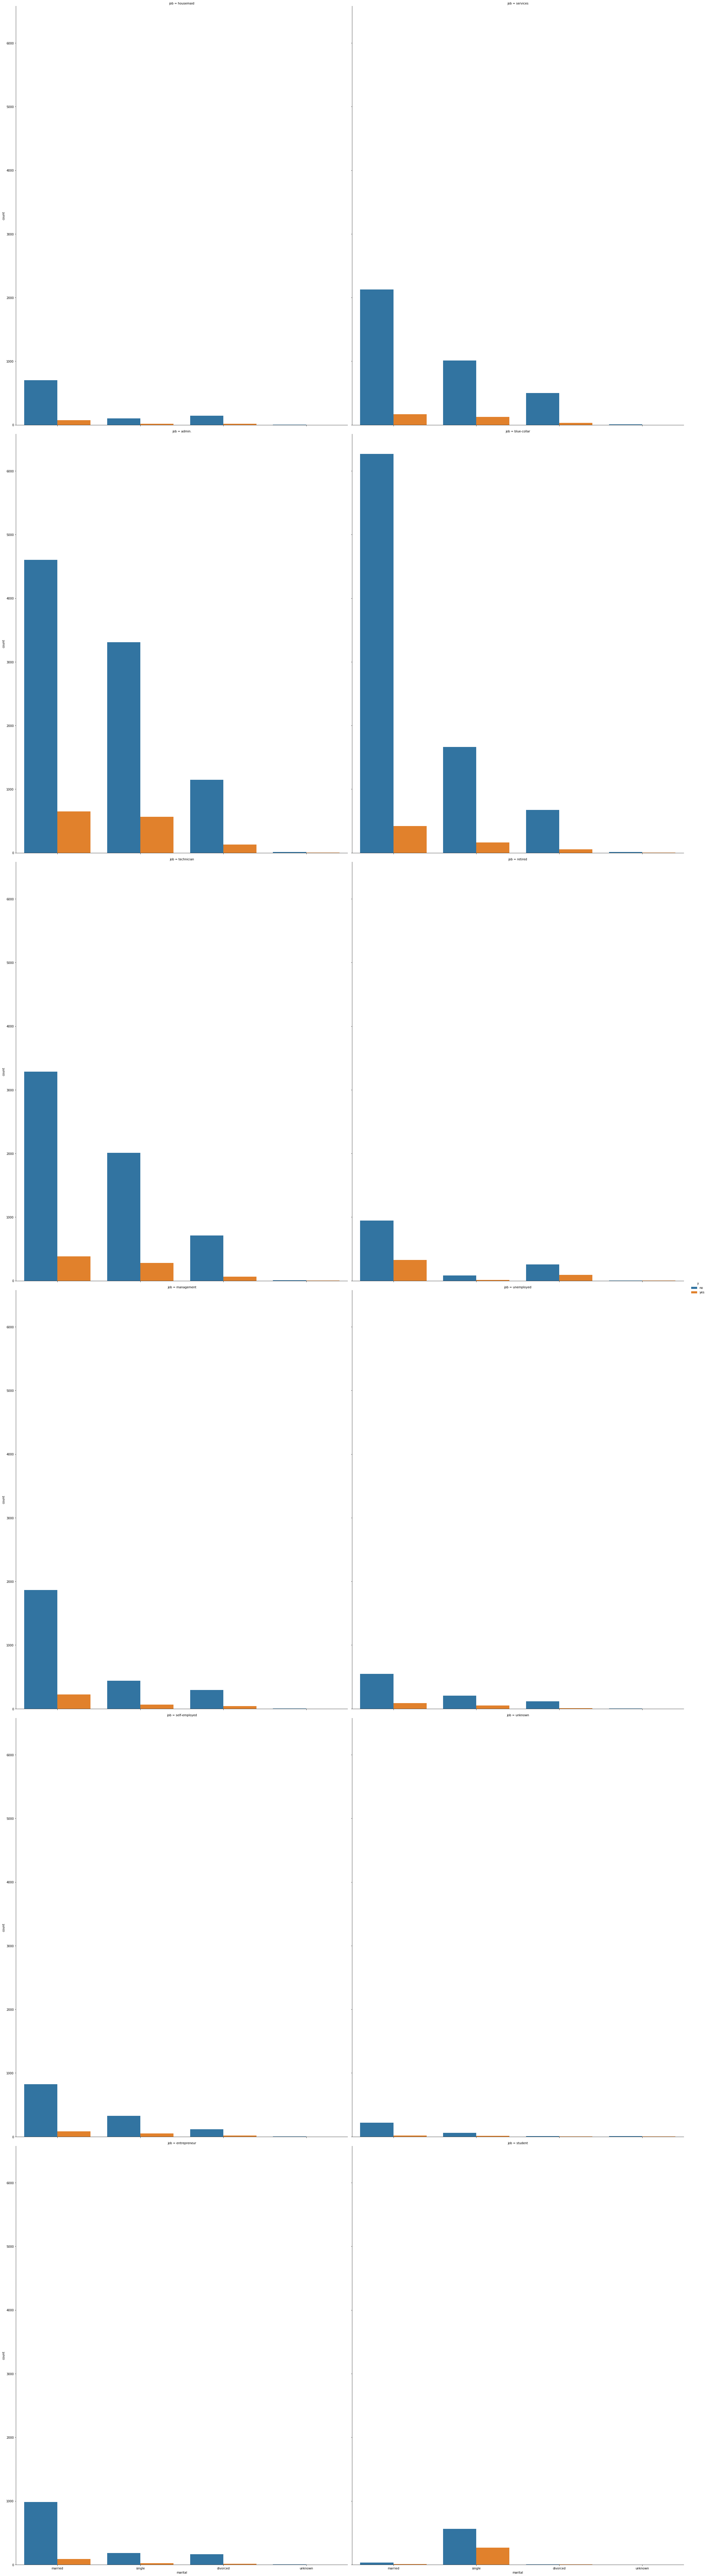

In [176]:
# Marital and Job

plotting_catplot('marital','job',20)

In [177]:
#People who are in admin job with marital status married and single and most ones who have subscribed for their deposits.
#People who are in blue collar job and are married are the most ones who has not subscribed for their deposits.

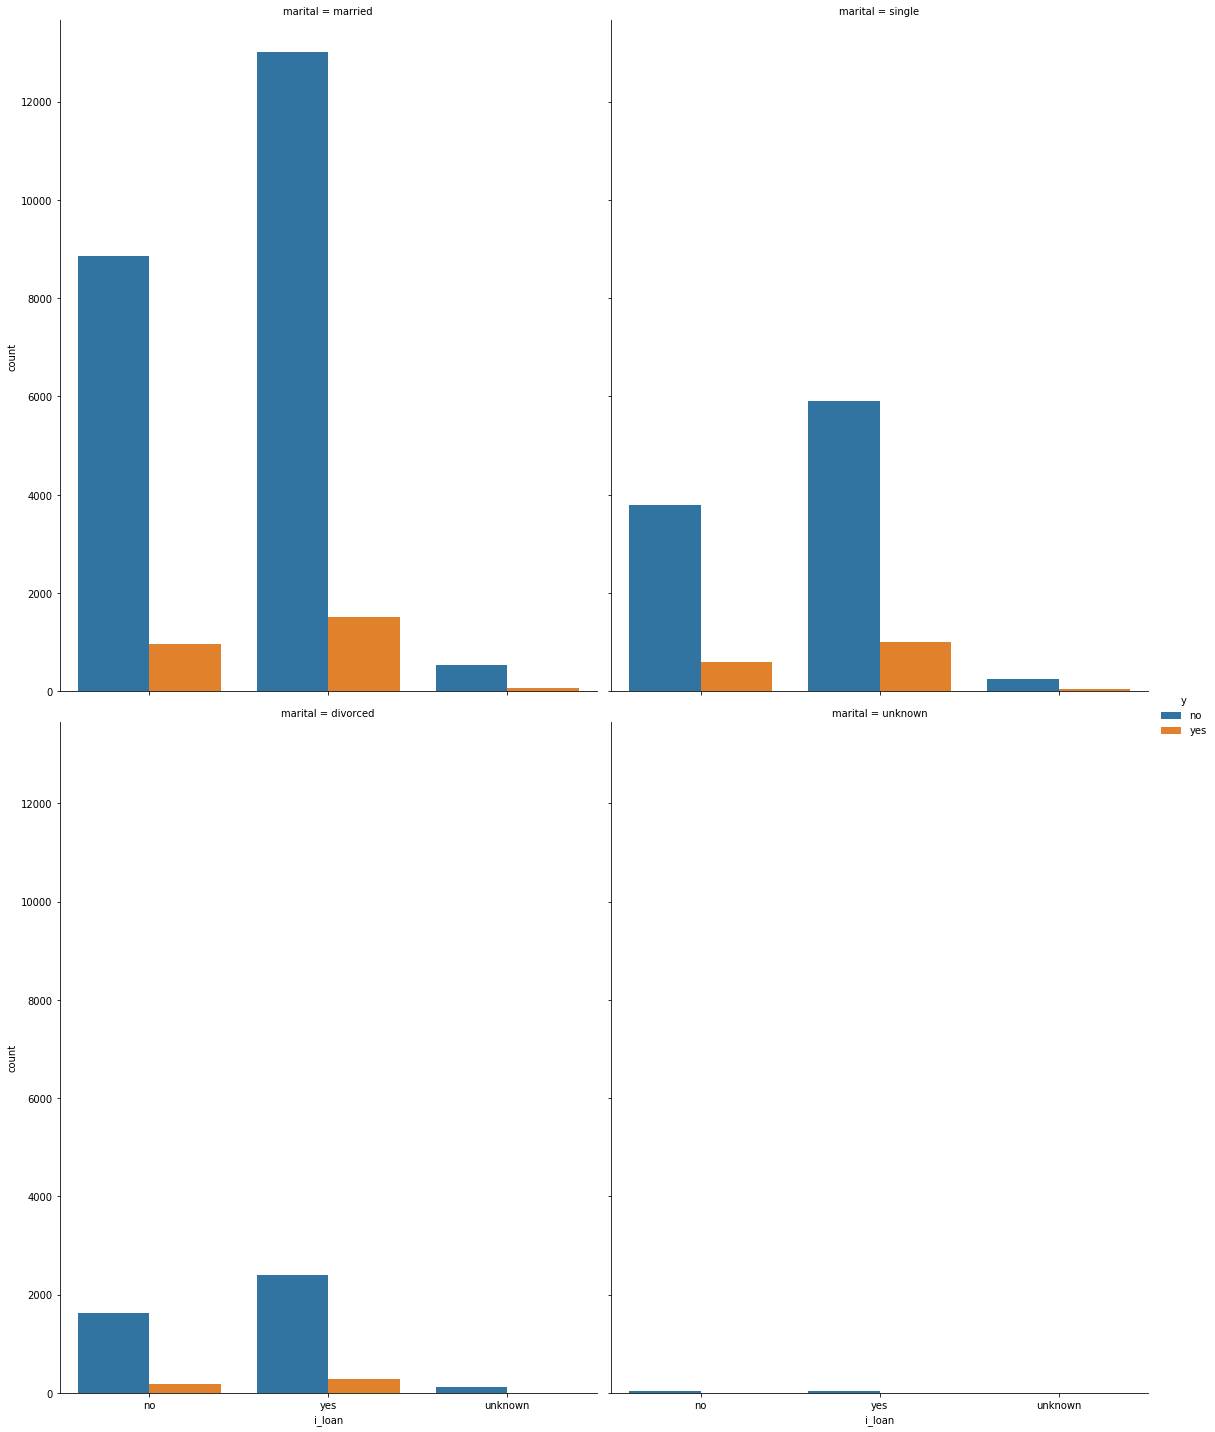

In [178]:
#I_loan and Marital

plotting_catplot('i_loan','marital')

In [179]:
#People who are married and have loans are the most ones who have subscribed for their deposits.
#They are the most ones in any marital status for not subscribing for their deposits.

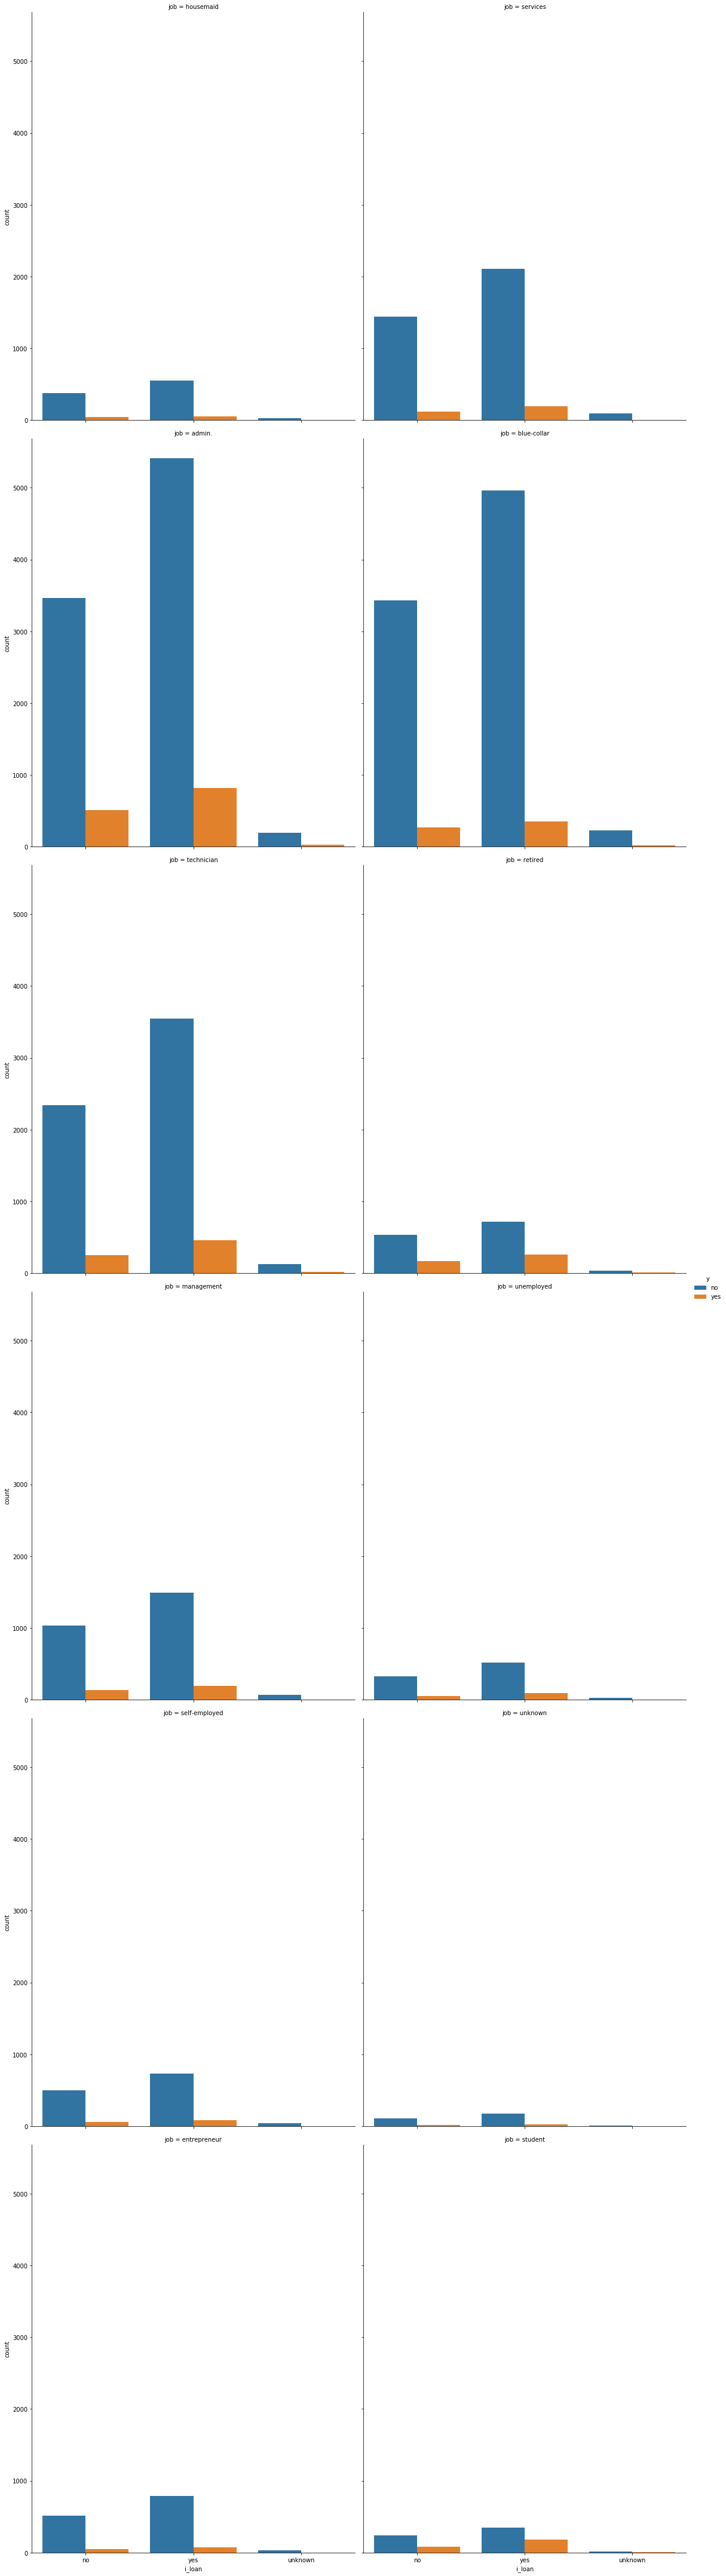

In [180]:
#I_loan and Job

plotting_catplot('i_loan','job')

In [181]:
#People who are in the profession of admin with loans are the ones who have subscribed for deposits,
#followed by the admins who does not have loans  subscribed for the deposits. 
#People who are techniciana and admins and have loan status as yes or no 
#are the most ones who have not subscribed for their deposits.

In [182]:
# Recommendation Summary

# After I've conducted some analysis through visualizations using plots,it revealed as follows:

# People who are in admin job has been more contacted for the deposits by the bank.
# People who are married has been contacted more for the deposits by the bank.
# People who has been contacted more on the cellular than the telephone.
# People has been contacted more in the month of May than any other month. They have not been contacted in January and Februray at all.
# People has not been contacted on Saturday and Sunday.
# People with no default status has been contacted more by the bank.
# People who has housing loan has been contacted more by the bank
# People with no personal loan has been contacted more by the bank.
# People who are in university has been contacted more by the bank.
# Age,Duration,Campaign have outliers and are rightly skewed.
# Pdays have more than 70% of data imputed so it is better either to impute or remove the column.
# Euribor3m with nr.employed and emp.var.rate with nr.employed with the highest correlation.

In [183]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.dummy import DummyClassifier
from sklearn.metrics import roc_auc_score,roc_curve,auc
from scipy.sparse import hstack
from sklearn.preprocessing import Normalizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import SGDClassifier
import tqdm.notebook as tq
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score


In [ ]:
##################### Reccommended models #####################
#  Remember,our goal is to predict whether a customer will subscribe a term deposit or not given the data of the customer.
# So what type of machine learning problem is this?

#This is a binary classification problem.
# I have chosen the following models recommended for this problem:
#Dummy Classifier(Stratified)
#KNN-classifier
# Logistic Regression
#SGD-log loss
#Linear SVM 
#Random Forest
#XGBoost
#Adaboost

# Each of these models will be encoded with different encoding methods,with either One Hot Encoding or Response Encoding.
# Recall:
# One Hot Encoding:One hot encoding creates column for each category and checks 
#whether the category is present in that row or not. If category is present it would be marked as 1 else zero.
# Response Encoding: As part of this technique, we represent the probability of the data point 
#belonging to a particular class given a category. So, for a K-class classification problem, 
#we get K new features which embed the probability of the datapoint belonging to each class based 
#on the value of categorical data. 

# Data modelling steps:
# The duration variable will only be used for baseline model.
#Since to make the models realistic we would be dropping column for other machine learning models.
#Hyper tuning of models has been done, using calibrated classifier, 
#where cross validation dataset is used to get best hyper parameter.
#After getting best hyper parameter, train and test data set is used for evaluating the model performance.
#Feature scaling of numerical data is done only for linear models. 
#Tree based models does not require feature scaling and is also robust to outliers.
 #For each encoding of categorical data, we have used models to compare which encoding would work better.
#Since the dataset is highly imbalanced, I have used class_weight=’balanced’ as parameter to balance the dataset internally.


# Calibrated Classifier

#What is the need to use Calibrated Classifier?

#Non-linear models like (KNN, Tree based Models) predicts uncalibrated probability. 
#Though models predict probability but they might not be the same like observed probability in training. 
#It requires adjustment and that is done by calibration.


# Performance metric 

# For this problem I will be using the ROC-AUC  curve.
#The ROC –AUC curve shows the performance of binary class classifiers across the range 
#of all possible threshold plotting between true positive rate and 1-false positive rate.
#Measures the likelihood of that given  two random points one from positive and one from negative the classifier 
#will rank the positive points above negative points.
#Is a popular classification metric that present the advantage of being independent of false positive and false negative.
#The ideal AUC score is 1 and AUC of 0.5 is for random classifier.

# Other performance metrics required

# Macro-F1 score
#Macro-F1 Score: F1 score is the harmonic mean between Precision and Recall. 
#Macro F1 score is used to know how our model works in overall dataset.

  #Confusion Matrix: 
#This matrix gives the count of true negative,true positive,false positive and false negative datapoints. 



In [184]:
##################### Data Preprocessing and Data preparation #####################

# Before we begin with the model building,we must ensure that the data is preprocessed.
#Pre-Processing:

#We must first check for any mull/missing and duplicate values present in the data.
# There is no null/missing values in the dataset but there are duplicate rows.
# Let’s check for any duplicate values present in the data.

duplicate_data=bank_data2[bank_data2.duplicated(keep="last")]
print("Duplicate Data",duplicate_data.shape)
duplicate_data.head()

Duplicate Data (27, 20)


,age_group,job,marital,education,default,i_loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
440,30-39,technician,married,professional.course,unknown,yes,telephone,may,tue,264,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
737,40-49,admin.,married,high.school,no,no,telephone,may,tue,157,2,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1251,40-49,blue-collar,married,basic.4y,unknown,no,telephone,may,thu,190,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
1265,30-39,blue-collar,married,basic.6y,no,no,telephone,may,thu,124,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2011,30-39,admin.,married,high.school,no,yes,telephone,may,mon,115,4,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [185]:
#There are 27 rows which are duplicate. Now in parameter we have given keep=last, reason being, 
#we want to have most recent records in our data. Older duplicate data should be removed.

In [186]:
# Now we need to remove duplicate data.
# Removing Duplicate Values.
bank_data2=bank_data2.drop_duplicates()
bank_data2.shape

(41161, 20)

In [187]:
# After removing duplicate values, we have data shape of (41161,20)
#Now we will be mapping our target values yes with 1 and no with 0.
#mapping the values into binary yes->1 and no->0
def target_variable_binary(y):
    y=y.replace({"yes":1,"no":0},inplace=True)

In [188]:
target_variable_binary(bank_data2['y'])

In [189]:
# The target values are now mapped as shown below.
bank_data2

,age_group,job,marital,education,default,i_loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,50-59,housemaid,married,basic.4y,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,50-59,services,married,high.school,unknown,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,30-39,services,married,high.school,no,yes,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,30-39,admin.,married,basic.6y,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,50-59,services,married,high.school,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,70-79,retired,married,professional.course,no,yes,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1
41184,40-49,blue-collar,married,professional.course,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41185,50-59,retired,married,university.degree,no,yes,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41186,40-49,technician,married,professional.course,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1


In [190]:
#Testing for MultiCollinearity for Highly Correlated Features.

vif = bank_data2[['euribor3m', 'emp.var.rate', 'nr.employed','y']] 
vif_data = pd.DataFrame() 
vif_data["feature"] = vif.columns 
  
# calculating VIF for each feature 
vif_data["VIF"] = [variance_inflation_factor(vif.values, i) 
                          for i in range(len(vif.columns))] 
  
print(vif_data)

        feature         VIF
0     euribor3m  105.020842
1  emp.var.rate   18.514590
2   nr.employed   83.194366
3             y    1.242344


In [191]:
#From the output we can see that Euribor3m,emp.var.index and nr.employed have high VIF values 
#that means they are highly correlated to each other which we have seen while plotting correlation. 
#We know that any feature with VIF>10 are having multicollinearity.

In [192]:
#Seperating Target Variable from the data. 
#Let’s Separate our target variable from data frame and drop the target variable.
#storing the y into target variable and dropping the y column from the data
target_variable=bank_data2['y']
bank_data2=bank_data2.drop('y',axis=1)

In [193]:
print("Target variable",target_variable.shape)
print("After dropping target variable",bank_data2.shape)

Target variable (41161,)
After dropping target variable (41161, 19)


In [194]:
print("Percentage of target variable belonging to Yes class",(target_variable.value_counts()[1]/len(target_variable))*100)
print("Percentage of target variable belonging to No class",(target_variable.value_counts()[0]/len(target_variable))*100)

Percentage of target variable belonging to Yes class 11.270377298899444
Percentage of target variable belonging to No class 88.72962270110055


In [195]:
#Splitting Dataset into Train, Cross-Validation and Test.

X_train, X_test, y_train, y_test = train_test_split(bank_data2, target_variable, test_size=0.20, random_state=42)
X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, test_size=0.20, random_state=42)

In [196]:
print(X_train.shape)
print(X_cv.shape)
print(X_test.shape)
print(y_train.shape)
print(y_cv.shape)
print(y_test.shape)

(26342, 19)
(6586, 19)
(8233, 19)
(26342,)
(6586,)
(8233,)


In [197]:
#this function seperates the categorical and numerical columns which would be easier for us to encode and feature scaling.
""""this function takes the train dataset and based on the datatype it seperates the feature"""
def splitting_categorical_numerical_columns(data):
   
    categorical_feature=data.dtypes==object
    categorical_columns=data.columns[categorical_feature].tolist()
    numerical_feature=data.dtypes!=object
    numerical_columns=data.columns[numerical_feature].tolist()
    return categorical_columns,numerical_columns

In [198]:
catgeorical_columns,numerical_columns=splitting_categorical_numerical_columns(X_train)
print(catgeorical_columns)
print(numerical_columns)

['job', 'marital', 'education', 'default', 'i_loan', 'contact', 'month', 'day_of_week', 'poutcome']
['age_group', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']


In [199]:
#For datamodel, We have dropped P-Days and duration is used only for baseline model.

In [200]:
# Now lets perform some feature scaling of numerical variables.
"""this function takes the train,cv and test dataset and first it converts it into log transformation and normalize the data
For log transformation we always need to add some constant to avoid getting infinity. Here I have considered 100 as constant."""

def feature_scaling_numerical(train,cv,test,required=False):
    train=np.log(100+train)
    cv=np.log(100+cv)
    test=np.log(100+test)
    if required==True:
        normalizer= Normalizer()
        normalizer.fit(train.values.reshape(-1,1))
        train=normalizer.transform(train.values.reshape(1,-1))
        train=train.reshape(-1,1)
        cv=normalizer.transform(cv.values.reshape(1,-1))
        cv=cv.reshape(-1,1)
        test=normalizer.transform(test.values.reshape(1,-1))
        test=test.reshape(-1,1)
    return train,cv,test

In [201]:
#Reason of doing log transformation is that, most of our dataset are right skewed.
#For log transformation we need to add some constant to avoid getting NAN value in feature.
#Here I have added 100 because with values less than 100, Euribo3m feature was getting NAN values.

In [202]:
train_duration,cv_duration,test_duration=feature_scaling_numerical(X_train['duration'],X_cv['duration'],X_test['duration'],True)
train_campaign,cv_campaign,test_campaign=feature_scaling_numerical(X_train['campaign'],X_cv['campaign'],X_test['campaign'],True)

train_previous,cv_previous,test_previous=feature_scaling_numerical(X_train['previous'],X_cv['previous'],X_test['previous'],True)
train_emp,cv_emp,test_emp=feature_scaling_numerical(X_train['emp.var.rate'],X_cv['emp.var.rate'],X_test['emp.var.rate'],True)
train_cons_price,cv_cons_price,test_cons_price=feature_scaling_numerical(X_train['cons.price.idx'],X_cv['cons.price.idx'],X_test['cons.price.idx'],True)
train_cons_conf,cv_cons_conf,test_cons_conf=feature_scaling_numerical(X_train['cons.conf.idx'],X_cv['cons.conf.idx'],X_test['cons.conf.idx'],True)
train_euribor,cv_euribor,test_euribor=feature_scaling_numerical(X_train['euribor3m'],X_cv['euribor3m'],X_test['euribor3m'],True)
train_nr_employed,cv_nr_employed,test_nr_employed=feature_scaling_numerical(X_train['nr.employed'],X_cv['nr.employed'],X_test['nr.employed'],True)


In [203]:
def batch_predict(clf,bank_data2):
    y_data_pred=[]
    tr_loop=bank_data2.shape[0]-bank_data2.shape[0]%10000
    for i in range(0,tr_loop,10000):
        y_data_pred.extend(clf.predict_proba(bank_data2[i:i+10000])[:,1])
        
    if bank_data2.shape[0]%10000!=0:
        y_data_pred.extend(clf.predict_proba(bank_data2[tr_loop:])[:,1])
    
    return y_data_pred

In [204]:
def find_best_threshold(threshold,fpr,tpr):
    t=threshold[np.argmax(tpr*(1-fpr))]
    
    #print("the maximum value of tpr*(1-fpr)",max(tpr*(1-fpr)),"for threshold",np.round(t,3))
    return t

def prediction_with_best_t(proba,threshold):
    #print("theshold",threshold)
    predictions=[]
    for i in proba:
        if i>=threshold:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

In [205]:

"""this function takes the classifier object,train,test data send it to batch_predict function to calculate the class probablity
belonging to class 1 append the probablity to the list and return it as a list. Then we calculate tpr and fpr values and plot it 
also calculating to get auc score Along printing the confusion matrix of both train and test data of metaclassifier"""
def calculating_roc_auc_score(classifier,train,test,y_train,y_test):
    classifier.fit(train,y_train)
    y_train_predict=batch_predict(classifier,train)
    y_test_predict=batch_predict(classifier,test)
    train_fpr,train_tpr,train_threshold=roc_curve(y_train,y_train_predict)
    test_fpr,test_tpr,test_threshold=roc_curve(y_test,y_test_predict)
    plt.pyplot.plot(train_fpr,train_tpr,label='Train ROC Curve')
    plt.pyplot.plot(test_fpr,test_tpr,label='Test ROC Curve')
    plt.pyplot.legend()
    plt.pyplot.xlabel('FPR')
    plt.pyplot.ylabel('TPR')
    plt.pyplot.title('TPR vs FPR graph')
    plt.pyplot.grid()
    plt.pyplot.show()

 
    print("Train AUC Score",auc(train_fpr,train_tpr))
    print("Test AUC Score",auc(test_fpr,test_tpr))
    print()
    print()
  
  #Printing Confusion matrix on train and test dataset
    fig=plt.pyplot.figure()
    ax=fig.add_subplot(111)
    best_t= find_best_threshold(train_threshold,train_fpr,train_tpr)
    print("Train Confusion Matrix")
    y_train_predicti=prediction_with_best_t(y_train_predict,best_t)
    train_matrix=confusion_matrix(y_train,y_train_predicti)
    sns.heatmap(train_matrix,annot=True,fmt='d')
    plt.pyplot.show(ax)
    print()
    fig=plt.pyplot.figure()
    ax1=fig.add_subplot(111)
    print("Test Cofusion Matrix")
    y_test_predicti=prediction_with_best_t(y_test_predict,best_t)
    test_matrix=confusion_matrix(y_test,y_test_predicti)
    sns.heatmap(test_matrix,annot=True,fmt='d')
    plt.pyplot.show(ax1)


In [206]:
# Encoding of Categorical Features
# One Hot Encoding:One hot encoding creates column for each category and checks whether the category 
#is present in that row or not. If category is present it would be marked as 1 else zero.


def count_vectorizing_categorical(train,cv,test):
    """"token pattern is used because count vectorizer without token considers only
2 letters and use punctuation marks as seperator but in some of our categories in categorical columns
contains punctuations and we dont want to use it as seperator. """
   
    countVectorizer=CountVectorizer(token_pattern="[a-zA-Z0-9-.]+")
    train=countVectorizer.fit_transform(train)
    cv=countVectorizer.transform(cv)
    test=countVectorizer.transform(test)
    

    return train,cv,test

In [207]:
train_age,cv_age,test_age=count_vectorizing_categorical(X_train['age_group'],X_cv['age_group'],X_test['age_group'])
train_job,cv_job,test_job=count_vectorizing_categorical(X_train['job'],X_cv['job'],X_test['job'])
train_marital,cv_marital,test_marital=count_vectorizing_categorical(X_train['marital'],X_cv['marital'],X_test['marital'])
train_education,cv_education,test_education=count_vectorizing_categorical(X_train['education'],X_cv['education'],X_test['education'])
train_default,cv_default,test_default=count_vectorizing_categorical(X_train['default'],X_cv['default'],X_test['default'])
train_iloan,cv_iloan,test_iloan=count_vectorizing_categorical(X_train['i_loan'],X_cv['i_loan'],X_test['i_loan'])
train_contact,cv_contact,test_contact=count_vectorizing_categorical(X_train['contact'],X_cv['contact'],X_test['contact'])
train_month,cv_month,test_month=count_vectorizing_categorical(X_train['month'],X_cv['month'],X_test['month'])
train_day,cv_day,test_day=count_vectorizing_categorical(X_train['day_of_week'],X_cv['day_of_week'],X_test['day_of_week'])
train_poutcome,cv_poutcome,test_poutcome=count_vectorizing_categorical(X_train['poutcome'],X_cv['poutcome'],X_test['poutcome'])

In [208]:
# Stacking Columns with duration for Baseline Model.


x_train_ohe_d=hstack((train_age,train_job,train_marital,train_education,train_default,train_iloan,train_contact,train_month,train_day,train_poutcome,train_duration,train_campaign,train_previous,train_emp,train_cons_price,train_cons_conf,train_euribor,train_nr_employed)).tocsr()
print(x_train_ohe_d.shape)
x_cv_ohe_d=hstack((cv_age,cv_job,cv_marital,cv_education,cv_default,cv_iloan,cv_contact,cv_month,cv_day,cv_poutcome,cv_duration,cv_campaign,cv_previous,cv_emp,cv_cons_price,cv_cons_conf,cv_euribor,cv_nr_employed)).tocsr()
print(x_cv_ohe_d.shape)
x_test_ohe_d=hstack((test_age,test_job,test_marital,test_education,test_default,test_iloan,test_contact,test_month,test_day,test_poutcome,test_duration,test_campaign,test_previous,test_emp,test_cons_price,test_cons_conf,test_euribor,test_nr_employed)).tocsr()
print(x_test_ohe_d.shape)

(26342, 67)
(6586, 67)
(8233, 67)


In [209]:
#Baseline Model with duration

# Baseline Model with Duration.
#For Baseline model we will be using Dummy.Classifier.
#1.One Hot Encoding.

strategy=["uniform","prior","stratified","most_frequent"]
cv_auc=[]
for star in tq.tqdm(strategy):
    dummy_clf = DummyClassifier(strategy=star)
    
    sig_clf = CalibratedClassifierCV(dummy_clf, method="sigmoid")
    sig_clf.fit(x_train_ohe_d, y_train)
    predict_y = sig_clf.predict_proba(x_cv_ohe_d)
    cv_auc.append(roc_auc_score(y_cv, predict_y[:,1]))

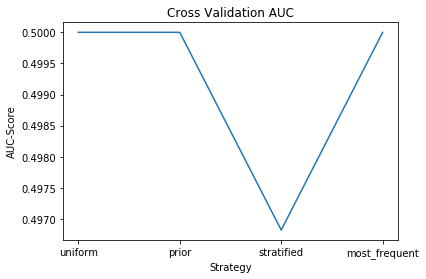

In [210]:
fig,ax=plt.pyplot.subplots()
plt.pyplot.plot(strategy,cv_auc)

plt.pyplot.title("Cross Validation AUC")
plt.pyplot.xlabel("Strategy")
plt.pyplot.ylabel("AUC-Score")
plt.pyplot.show()

# Lets begin with machine learning part now,

# Strategy with Stratified has the best AUC score among other strategies.

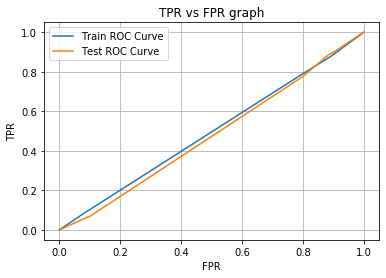

Train AUC Score 0.49565415302330923
Test AUC Score 0.47782249675368926


Train Confusion Matrix


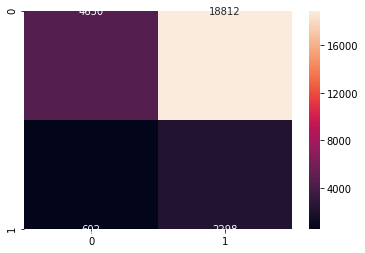


Test Cofusion Matrix


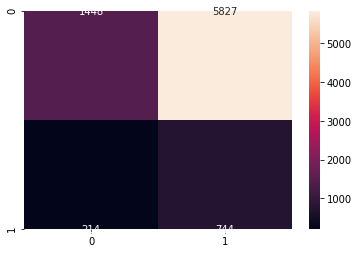

In [211]:

dummy_clf = DummyClassifier(strategy="stratified")
sig_clf = CalibratedClassifierCV(dummy_clf, method="sigmoid")

calculating_roc_auc_score(sig_clf,x_train_ohe_d,x_test_ohe_d,y_train,y_test)

In [ ]:
# For the Dummy Classifier ,we get  a Train AUC Score of 0.4957 and a Test AUC score of 0.4778. 
#This is not a good performance. Now let's look at the F1 score .


In [212]:

"""Printing F1-score"""
print("Train F1-Score:",f1_score(y_train, sig_clf.predict(x_train_ohe_d), average='macro'))
print("Test F1-Score:",f1_score(y_test, sig_clf.predict(x_test_ohe_d), average='macro'))

Train F1-Score: 0.47087417644223045
Test F1-Score: 0.4691127160175393


In [ ]:
# We get a Train F1-score of 0.4709
#and a Test F1-score of 0.4691.
#This is not a good performance either when measuring with the F1-score.
#Overall, the performance of the Dummy Classifier(Stratified) machine learning model encoded using One Hot Encoding method 
#is not good.
#Let's work with the other machine learning models encoded with One Hot Encoding maybe they can perform better than this.



In [213]:
#Stacking of Columns without Duration

x_train_ohe=hstack((train_age,train_job,train_marital,train_education,train_default,train_iloan,train_contact,train_month,train_day,train_poutcome,train_campaign,train_previous,train_emp,train_cons_price,train_cons_conf,train_euribor,train_nr_employed)).tocsr()
print(x_train_ohe.shape)
x_cv_ohe=hstack((cv_age,cv_job,cv_marital,cv_education,cv_default,cv_iloan,cv_contact,cv_month,cv_day,cv_poutcome,cv_campaign,cv_previous,cv_emp,cv_cons_price,cv_cons_conf,cv_euribor,cv_nr_employed)).tocsr()
print(x_cv_ohe.shape)
x_test_ohe=hstack((test_age,test_job,test_marital,test_education,test_default,test_iloan,test_contact,test_month,test_day,test_poutcome,test_campaign,test_previous,test_emp,test_cons_price,test_cons_conf,test_euribor,test_nr_employed)).tocsr()
print(x_test_ohe.shape)


(26342, 66)
(6586, 66)
(8233, 66)


In [214]:
#Our other machine learning models irrespective of encoding should perform better than our baseline models.

In [215]:
#Model Evaluation
#All the models are hypertuned using Random Search Cross Validation.
#  We will apply all the models on both the One hot encoded dataset and
#the Response coded dataset and compare the results.

#Performance Metric: For this problem statement we would be using the ROC-AUC curve.

# The ROC shows the performance of binary class classifiers across the range of all possible threshold plotting 
#between true postive rate and 1-false positive rate
#AUC measures the likelihood of that given two random points one from positive and 
#one from negative the classifier will rank the positive points above negative points.
#AUC is the popular classification metric that present the advantage       of being independent of false positive and
#false negative. The ideal AUC score is 1 and AUC of 0.5 is for random classifier.

In [216]:


# Applying all the models with One hot Encoding first.

#K-Nearest Neighbour :


neighbours=[k for k in range(1,23,2)]
cv_auc=[]
for k in neighbours:
    knn=KNeighborsClassifier(n_neighbors=k)
   
    sig_clf = CalibratedClassifierCV(knn, method="sigmoid")
    sig_clf.fit(x_train_ohe, y_train)
    predict_y = sig_clf.predict_proba(x_cv_ohe)
    cv_auc.append(roc_auc_score(y_cv, predict_y[:,1]))             

In [217]:
# As we can see below,the Train F1-Score is 61% and the Test F1-Score is 56%.
# This is not bad.

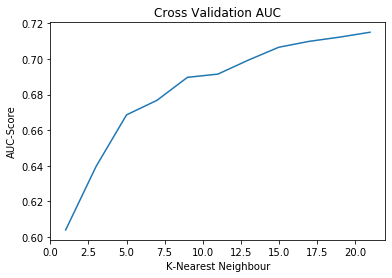

In [218]:
fig,ax=plt.pyplot.subplots()
plt.pyplot.plot(neighbours,cv_auc)

plt.pyplot.title("Cross Validation AUC")
plt.pyplot.xlabel("K-Nearest Neighbour")
plt.pyplot.ylabel("AUC-Score")
plt.pyplot.show()

In [219]:
index_of_best_auc=np.argmax(cv_auc)
print("Best K ",neighbours[index_of_best_auc])

Best K  21


In [ ]:
#Using the K-Nearest Neighbour,the best K value is 21.Lets find the AUC score and the F1-score. 


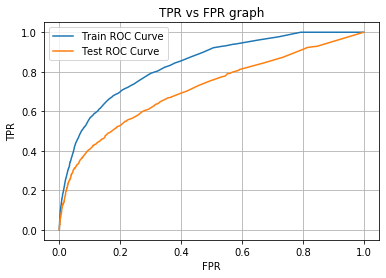

Train AUC Score 0.8353040372570305
Test AUC Score 0.7125019190897417


Train Confusion Matrix


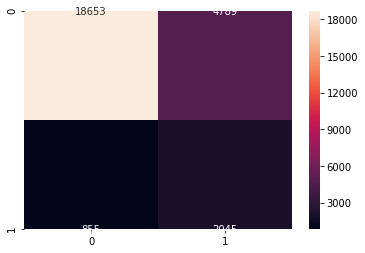


Test Cofusion Matrix


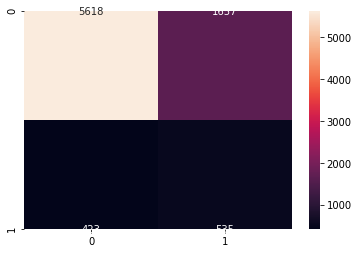

In [220]:
knn=KNeighborsClassifier(n_neighbors=21)

sig_clf = CalibratedClassifierCV(knn, method="sigmoid")
calculating_roc_auc_score(sig_clf,x_train_ohe,x_test_ohe,y_train,y_test)

In [ ]:
# For the K-Nearest Neighbour machine learning model we get  a Train AUC score of 0.8353 and a Test AUC score of 0.7125. 
#This indicates a good performance.Now let's look at the F1-score.


In [221]:
"""Printing F1-score"""
print("Train F1-Score:",f1_score(y_train, sig_clf.predict(x_train_ohe), average='macro'))
print("Test F1-Score:",f1_score(y_test, sig_clf.predict(x_test_ohe), average='macro'))

Train F1-Score: 0.6064156387709663
Test F1-Score: 0.5556298679507848


In [ ]:
# We get a Train F1-score of  0.6064 and a Test F1-score of 0.5556 for the K-NN model.
#This is not bad.Now let's work with the Logistic Regression model.



In [245]:
# Logistic Regression 

lambda_values=[10 ** lam for lam in range(-5,4)]
cv_auc=[]
for value in tq.tqdm(lambda_values):
    lr=LogisticRegression(penalty='l2',C=value,class_weight='balanced')
    
    sig_clf = CalibratedClassifierCV(lr, method="sigmoid")
    sig_clf.fit(x_train_ohe, y_train)
    predict_y = sig_clf.predict_proba(x_cv_ohe)
    cv_auc.append(roc_auc_score(y_cv, predict_y[:,1]))

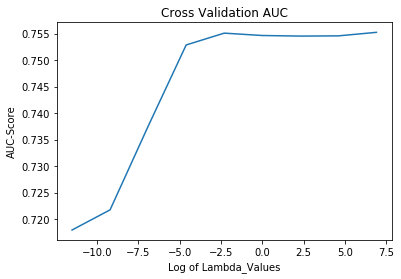

In [246]:
fig,ax=plt.pyplot.subplots()
plt.pyplot.plot(np.log(lambda_values),cv_auc)

plt.pyplot.title("Cross Validation AUC")
plt.pyplot.xlabel("Log of Lambda_Values")
plt.pyplot.ylabel("AUC-Score")
plt.pyplot.show()

In [247]:
index_of_best_auc=np.argmax(cv_auc)
print("Best lambda",lambda_values[index_of_best_auc])

Best lambda 1000


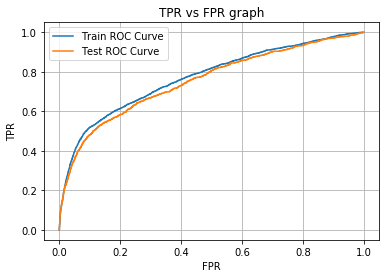

Train AUC Score 0.7711413716612388
Test AUC Score 0.752989762463322


Train Confusion Matrix


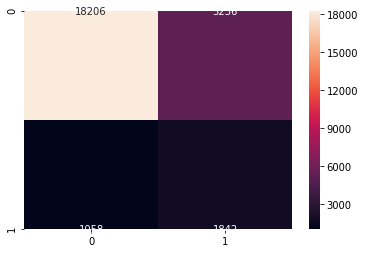


Test Cofusion Matrix


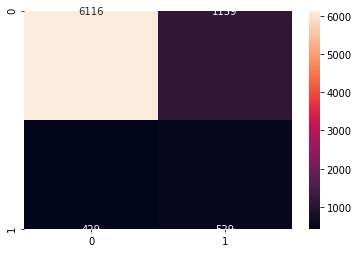

In [248]:
lr=LogisticRegression(penalty='l2',C=1000,class_weight='balanced')

sig_clf = CalibratedClassifierCV(lr, method="sigmoid")
sig_clf.fit(x_train_ohe, y_train)
calculating_roc_auc_score(sig_clf,x_train_ohe,x_test_ohe,y_train,y_test)

In [ ]:
# Using the Logistic Regression model, we get a Train AUC score of 0.7711 and a Test AUC score of  0.7530.
#This also indicates a good performance.Now let's look at the F1-score.


In [249]:
"""Printing F1-score"""
print("Train F1-Score:",f1_score(y_train, sig_clf.predict(x_train_ohe), average='macro'))
print("Test F1-Score:",f1_score(y_test, sig_clf.predict(x_test_ohe), average='macro'))

Train F1-Score: 0.6113103701068863
Test F1-Score: 0.6029186732240597


In [ ]:
# We get the Train F1-score of 0.6113 and the Test F1- score of 0.6029.
#This is a slightly good performance.Now lets work with SGD Classifier with log-loss machine learning model.


In [250]:
#SGD Classifier with log-loss 
lambda_values=[10 ** lam for lam in range(-5,4)]
cv_auc=[]
for value in tq.tqdm(lambda_values):
    log = SGDClassifier(loss='log',penalty='l2',alpha=value,class_weight='balanced')
    
    sig_clf = CalibratedClassifierCV(log, method="sigmoid")
    sig_clf.fit(x_train_ohe,y_train)
    predict_y = sig_clf.predict_proba(x_cv_ohe)
    cv_auc.append(roc_auc_score(y_cv, predict_y[:,1]))

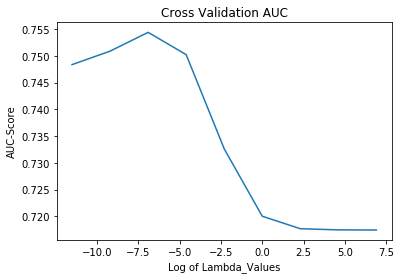

Best lambda 0.001


In [251]:
fig,ax=plt.pyplot.subplots()
plt.pyplot.plot(np.log(lambda_values),cv_auc)

plt.pyplot.title("Cross Validation AUC")
plt.pyplot.xlabel("Log of Lambda_Values")
plt.pyplot.ylabel("AUC-Score")
plt.pyplot.show()
index_of_best_auc=np.argmax(cv_auc)
print("Best lambda",lambda_values[index_of_best_auc])

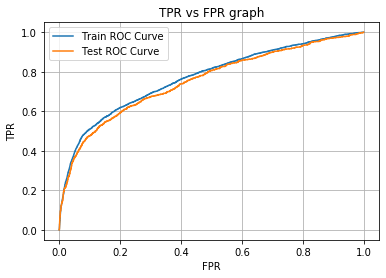

Train AUC Score 0.7700493146695144
Test AUC Score 0.753523377024012


Train Confusion Matrix


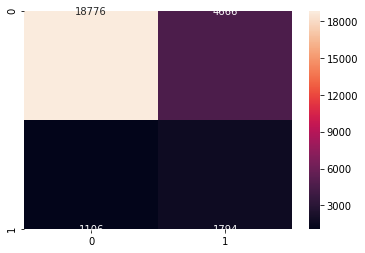


Test Cofusion Matrix


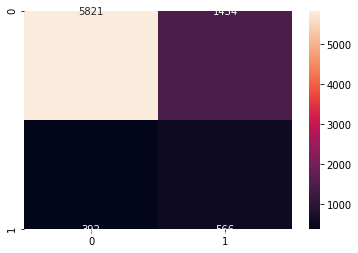

In [252]:
log=SGDClassifier(loss='log',penalty='l2',alpha=0.001,class_weight='balanced')

sig_clf = CalibratedClassifierCV(log, method="sigmoid")
sig_clf.fit(x_train_ohe, y_train)
calculating_roc_auc_score(sig_clf,x_train_ohe,x_test_ohe,y_train,y_test)

In [ ]:
#  Using the SGD Classifier with log-loss we get a Train AUC score of 0.77 and a Test AUC score of 0.7535.
#This also indicates a good performance. Now let's look at the F1-score.




In [253]:
"""Printing F1-score"""
print("Train F1-Score:",f1_score(y_train, sig_clf.predict(x_train_ohe), average='macro'))
print("Test F1-Score:",f1_score(y_test, sig_clf.predict(x_test_ohe), average='macro'))

Train F1-Score: 0.6119343567504646
Test F1-Score: 0.6148517115679384


In [ ]:
# The Train F1-score is 0.6119 and the Test F1-score is 0.6149 for the SGD Classifier with log-loss.
#This is also indicating a slightly good performance.Now let's work with the Linear SVM machine learning model.


In [254]:
#Linear SVM

lambda_values=[10 ** lam for lam in range(-5,4)]
cv_auc=[]
for value in tq.tqdm(lambda_values):
    SVM = SGDClassifier(penalty='l2',alpha=value,class_weight='balanced')
   
    sig_clf = CalibratedClassifierCV(SVM, method="sigmoid")
    sig_clf.fit(x_train_ohe,y_train)
    predict_y = sig_clf.predict_proba(x_cv_ohe)
    cv_auc.append(roc_auc_score(y_cv, predict_y[:,1]))

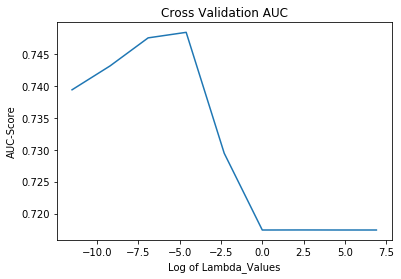

Best lambda 0.01


In [255]:
fig,ax=plt.pyplot.subplots()
plt.pyplot.plot(np.log(lambda_values),cv_auc)

plt.pyplot.title("Cross Validation AUC")
plt.pyplot.xlabel("Log of Lambda_Values")
plt.pyplot.ylabel("AUC-Score")
plt.pyplot.show()
index_of_best_auc=np.argmax(cv_auc)
print("Best lambda",lambda_values[index_of_best_auc])

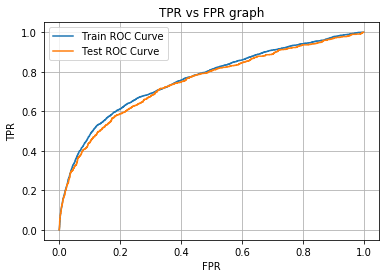

Train AUC Score 0.7632540841813544
Test AUC Score 0.7496038424839836


Train Confusion Matrix


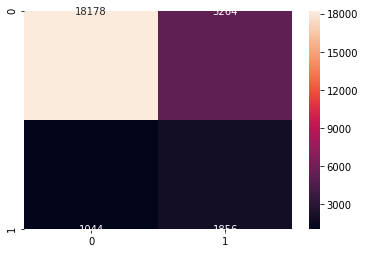


Test Cofusion Matrix


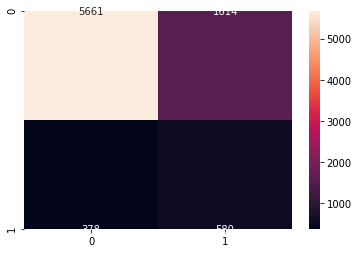

In [256]:
SVM=SGDClassifier(penalty='l2',alpha=0.01,class_weight='balanced')

sig_clf = CalibratedClassifierCV(SVM, method="sigmoid")
sig_clf.fit(x_train_ohe, y_train)
calculating_roc_auc_score(sig_clf,x_train_ohe,x_test_ohe,y_train,y_test)

In [ ]:
# We get a Train AUC score of 0.7632 and a Test AUC score of 0.7496.
#This indicates a good performance.Now let's look at the F1-score.



In [257]:
"""Printing F1-score"""
print("Train F1-Score:",f1_score(y_train, sig_clf.predict(x_train_ohe), average='macro'))
print("Test F1-Score:",f1_score(y_test, sig_clf.predict(x_test_ohe), average='macro'))

Train F1-Score: 0.5890836375607698
Test F1-Score: 0.5894408461239613


In [ ]:
# We get a Train F1-score of 0.5891 and a Test F1-score of 0.5894.
#This is not a bad.Now let's work with  Random Forest model.



In [258]:
# Dataset For Random Forest and XGBoost Classifier 
train_dataset=np.hstack((train_age.toarray(),train_job.toarray(),train_marital.toarray(),train_education.toarray(),train_default.toarray(),train_iloan.toarray(),train_contact.toarray(),train_month.toarray(),train_day.toarray(),train_poutcome.toarray(),X_train['campaign'].to_numpy().reshape(len(X_train),1),X_train['previous'].to_numpy().reshape(len(X_train),1),X_train['emp.var.rate'].to_numpy().reshape(len(X_train),1),X_train['cons.price.idx'].to_numpy().reshape(len(X_train),1),X_train['cons.conf.idx'].to_numpy().reshape(len(X_train),1),X_train['euribor3m'].to_numpy().reshape(len(X_train),1),X_train['nr.employed'].to_numpy().reshape(len(X_train),1)))
print(train_dataset.shape)
cv_dataset=np.hstack((cv_age.toarray(),cv_job.toarray(),cv_marital.toarray(),cv_education.toarray(),cv_default.toarray(),cv_iloan.toarray(),cv_contact.toarray(),cv_month.toarray(),cv_day.toarray(),cv_poutcome.toarray(),X_cv['campaign'].to_numpy().reshape(len(X_cv),1),X_cv['previous'].to_numpy().reshape(len(X_cv),1),X_cv['emp.var.rate'].to_numpy().reshape(len(X_cv),1),X_cv['cons.price.idx'].to_numpy().reshape(len(X_cv),1),X_cv['cons.conf.idx'].to_numpy().reshape(len(X_cv),1),X_cv['euribor3m'].to_numpy().reshape(len(X_cv),1),X_cv['nr.employed'].to_numpy().reshape(len(X_cv),1)))
print(cv_dataset.shape)
test_dataset=np.hstack((test_age.toarray(),test_job.toarray(),test_marital.toarray(),test_education.toarray(),test_default.toarray(),test_iloan.toarray(),test_contact.toarray(),test_month.toarray(),test_day.toarray(),test_poutcome.toarray(),X_test['campaign'].to_numpy().reshape(len(X_test),1),X_test['previous'].to_numpy().reshape(len(X_test),1),X_test['emp.var.rate'].to_numpy().reshape(len(X_test),1),X_test['cons.price.idx'].to_numpy().reshape(len(X_test),1),X_test['cons.conf.idx'].to_numpy().reshape(len(X_test),1),X_test['euribor3m'].to_numpy().reshape(len(X_test),1),X_test['nr.employed'].to_numpy().reshape(len(X_test),1)))
print(test_dataset.shape)

(26342, 66)
(6586, 66)
(8233, 66)


In [259]:
# Random Forest 
from sklearn.ensemble import RandomForestClassifier
number_of_estimators=[10,50,100,200,500,1000,1500,2000]
cv_auc=[]
for estimator in tq.tqdm(number_of_estimators):
    random=RandomForestClassifier(n_estimators=estimator,random_state=42,n_jobs=-1,class_weight='balanced')
    
    sig_clf = CalibratedClassifierCV(random, method="sigmoid")
    sig_clf.fit(train_dataset,y_train)
    predict_y = sig_clf.predict_proba(cv_dataset)
    cv_auc.append(roc_auc_score(y_cv, predict_y[:,1]))

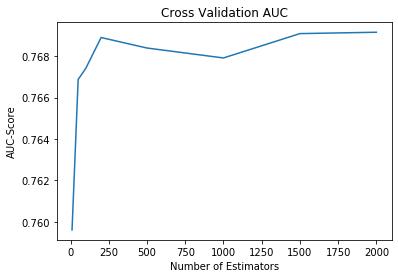

Best number of estimators 2000


In [260]:
fig,ax=plt.pyplot.subplots()
plt.pyplot.plot(number_of_estimators,cv_auc)

plt.pyplot.title("Cross Validation AUC")
plt.pyplot.xlabel("Number of Estimators")
plt.pyplot.ylabel("AUC-Score")
plt.pyplot.show()
index_of_best_auc=np.argmax(cv_auc)
print("Best number of estimators",number_of_estimators[index_of_best_auc])

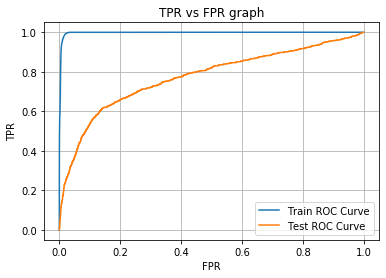

Train AUC Score 0.9974981171431178
Test AUC Score 0.773050168951639


Train Confusion Matrix


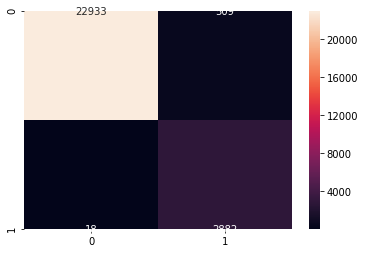


Test Cofusion Matrix


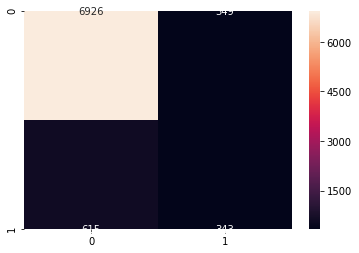

In [261]:
from sklearn.ensemble import RandomForestClassifier
random=RandomForestClassifier(n_estimators=2000,random_state=42,n_jobs=-1,class_weight='balanced')
random.fit(train_dataset,y_train)
sig_clf = CalibratedClassifierCV(random, method="sigmoid")
calculating_roc_auc_score(sig_clf,train_dataset,test_dataset,y_train,y_test)

In [ ]:
# Using the Random Forest model, we get a Train AUC score of 0.9975 and a Test AUC score of 0.7730.
#This indicates a very good performance.Now let's look at the F1-score.


In [262]:
"""Printing F1-score"""
print("Train F1-Score:",f1_score(y_train, sig_clf.predict(train_dataset), average='macro'))
print("Test F1-Score:",f1_score(y_test, sig_clf.predict(test_dataset), average='macro'))

Train F1-Score: 0.8179939665305525
Test F1-Score: 0.6091578859904606


In [ ]:
# We get a Train F1-score of 0.8180 and the Test F1-score of 0.6092.
#This indicates a good performance for the Train F1-score and a slight good performance for the Test F1-score.Now let's work with the Xgboost machine learning model.


In [243]:
# XGBoost Classifier

from xgboost  import XGBClassifier
number_of_estimators=[10,50,100,200,500,1000,1500,2000]
cv_auc=[]
for estimator in tq.tqdm(number_of_estimators):
    xgboost=XGBClassifier(n_estimators=estimator,random_state=42,n_thread=-1,class_weight='balanced')
    
    sig_clf = CalibratedClassifierCV(xgboost, method="sigmoid")
    sig_clf.fit(train_dataset,y_train)
    predict_y = sig_clf.predict_proba(cv_dataset)
    cv_auc.append(roc_auc_score(y_cv, predict_y[:,1]))

[02:50:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "class_weight", "n_thread" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[02:50:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[02:50:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "class_weight", "n_thread" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  

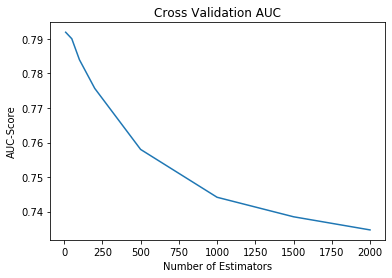

Best number of estimators 10


In [244]:
fig,ax=plt.pyplot.subplots()
plt.pyplot.plot(number_of_estimators,cv_auc)

plt.pyplot.title("Cross Validation AUC")
plt.pyplot.xlabel("Number of Estimators")
plt.pyplot.ylabel("AUC-Score")
plt.pyplot.show()
index_of_best_auc=np.argmax(cv_auc)
print("Best number of estimators",number_of_estimators[index_of_best_auc])

[04:05:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "class_weight", "n_thread" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[04:05:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[04:05:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "class_weight", "n_thread" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  

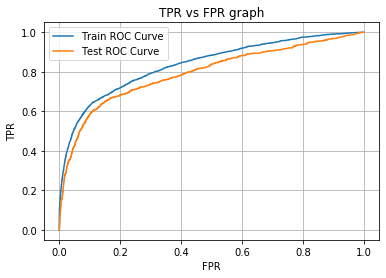

Train AUC Score 0.8366689246239434
Test AUC Score 0.7937454175006636


Train Confusion Matrix


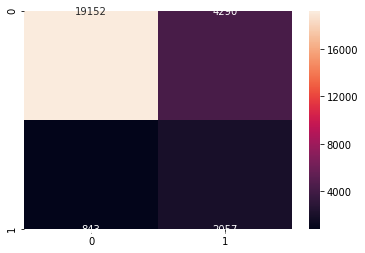


Test Cofusion Matrix


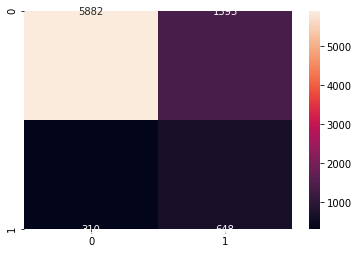

In [263]:
from xgboost  import XGBClassifier
xgboost=XGBClassifier(n_estimators=10,random_state=42,n_thread=-1,class_weight='balanced')

sig_clf = CalibratedClassifierCV(xgboost, method="sigmoid")
calculating_roc_auc_score(sig_clf,train_dataset,test_dataset,y_train,y_test)

In [ ]:
# The Train AUC score is 0.8367 and the Test AUC score is 0.7937.
#This indicates a very good performance.Now let's look at the F1-score.


In [264]:
"""Printing F1-score"""
print("Train F1-Score:",f1_score(y_train, sig_clf.predict(train_dataset), average='macro'))
print("Test F1-Score:",f1_score(y_test, sig_clf.predict(test_dataset), average='macro'))

Train F1-Score: 0.67834825556277
Test F1-Score: 0.6489234681614837


In [ ]:
# We get a Train F1-score of 0.6783 and a Test F1-score of 0.6489.
#This indicates a slight good performance.Now let's look at the Adaboost machine learning model.


In [265]:
# Adaboost
number_of_estimators=[10,50,100,200,500,1000,1500,2000]
cv_auc=[]
for estimator in tq.tqdm(number_of_estimators):
    adaboost=AdaBoostClassifier(n_estimators=estimator,random_state=42)
    
    sig_clf = CalibratedClassifierCV(adaboost, method="sigmoid")
    sig_clf.fit(train_dataset,y_train)
    predict_y = sig_clf.predict_proba(cv_dataset)
    cv_auc.append(roc_auc_score(y_cv, predict_y[:,1]))

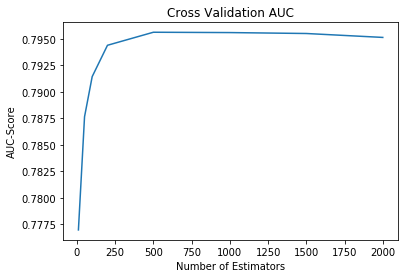

Best number of estimators 500


In [266]:
fig,ax=plt.pyplot.subplots()
plt.pyplot.plot(number_of_estimators,cv_auc)

plt.pyplot.title("Cross Validation AUC")
plt.pyplot.xlabel("Number of Estimators")
plt.pyplot.ylabel("AUC-Score")
plt.pyplot.show()
index_of_best_auc=np.argmax(cv_auc)
print("Best number of estimators",number_of_estimators[index_of_best_auc])

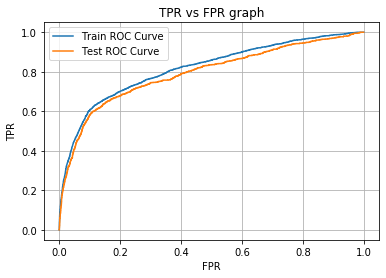

Train AUC Score 0.8166420497839129
Test AUC Score 0.7924455301350896


Train Confusion Matrix


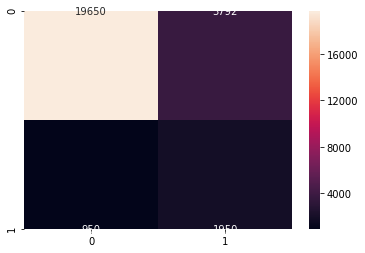


Test Cofusion Matrix


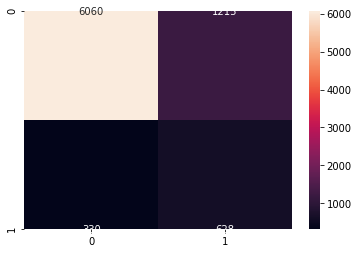

In [267]:
adaboost=AdaBoostClassifier(n_estimators=500,random_state=42)
sig_clf = CalibratedClassifierCV(adaboost, method="sigmoid")
calculating_roc_auc_score(sig_clf,train_dataset,test_dataset,y_train,y_test)

In [ ]:
# We get a Train AUC score of 0.8166 and a Test AUC score of 0.7924.
#This indicates a good performance.Now let's look at the F1-score.


In [268]:
"""Printing F1-score"""
print("Train F1-Score:",f1_score(y_train, sig_clf.predict(train_dataset), average='macro'))
print("Test F1-Score:",f1_score(y_test, sig_clf.predict(test_dataset), average='macro'))

Train F1-Score: 0.6361333956857931
Test F1-Score: 0.6269739540265832


In [ ]:
# The Train F1-score is 0.6361 and the Test F1-score is 0.6270.
#This is a slightly good performance.I’ve finished working with all the machine learning models encoded 
#using One Hot Encoding method,now I will be working with the machine learning models encoded using Response Encoding method. 
#I will be working with the same models in the preceding examples.



In [269]:
# Response Encoding
"""this function takes the train dataset and tries to fit the categories and return the positve and negative probablity of each feature
This function is more like fit function that is present in sklearn count_vectoriser """
def response_encoding(feature,y_values):  
    #taking unique values from features and converting it into list.
    unique_values=np.unique(feature).tolist()
    
    y_values=pd.DataFrame(data=y_values)
    df=pd.DataFrame({'feature':feature.values.tolist(),'y_values':y_values.values.flatten().tolist()})
    negative={}
    positive={}
    for values in unique_values:
        count_positive=len(df[(df['feature']==values) & (df['y_values']==1)]) 
        count_negative=len(df[(df['feature']==values) & (df['y_values']==0)])
        negative[values]=count_negative/(count_negative+count_positive)
        positive[values]=count_positive/(count_negative+count_positive)
    return positive,negative


In [270]:
"""this function is used to transform our dataset based on our fit train dataset. If the category is present it will replace the it with
positive and negative probablity computed during fit function if category is not present it would it with 0.5 probablity for both
positive and negative."""
def transform_response_encoding(feature,positive,negative,y_test_values):
    unique_list=np.unique(feature).tolist()
   
    y_test_values=pd.DataFrame(data=y_test_values)
    dataframe=pd.DataFrame({'feature':feature.values.tolist(),'y_test_values':y_test_values.values.flatten().tolist()})
    
    negative_test={}
    positive_test={}
    for value in unique_list:
        #value which is not present in training data probablity values would be 0.5
        if value not in positive.keys() and negative.keys():
           
            negative_test[value]=0.5
            positive_test[value]=0.5
        else:
            negative_test[value]=negative[value]
            positive_test[value]=positive[value]
    return positive_test,negative_test

In [271]:
"""Creating the dataframe so as to store all the train cv and test response encoding"""
train_dataset=pd.DataFrame()
cv_dataset=pd.DataFrame()
test_dataset=pd.DataFrame()
print("Done...")

Done...


In [272]:
positive_values_train,negative_values_train=response_encoding(X_train['age_group'],y_train)

train_dataset['age_group_pos']=X_train['age_group'].map(positive_values_train)
train_dataset['age_group_neg']=X_train['age_group'].map(negative_values_train)

positive_values_cv,negative_values_cv=transform_response_encoding(X_cv['age_group'],positive_values_train,negative_values_train,y_cv)
cv_dataset['age_group_pos']=X_cv['age_group'].map(positive_values_cv)
cv_dataset['age_group_neg']=X_cv['age_group'].map(negative_values_cv)

positive_values,negative_values=transform_response_encoding(X_test['age_group'],positive_values_train,negative_values_train,y_test)
test_dataset['age_group_pos']=X_test['age_group'].map(positive_values)
test_dataset['age_group_neg']=X_test['age_group'].map(negative_values)
print(train_dataset['age_group_neg'].shape)
print(cv_dataset['age_group_neg'].shape)
print(test_dataset['age_group_neg'].shape)

(26342,)
(6586,)
(8233,)


In [273]:
positive_values_train,negative_values_train=response_encoding(X_train['job'],y_train)

train_dataset['job_pos']=X_train['job'].map(positive_values_train)
train_dataset['job_neg']=X_train['job'].map(negative_values_train)

positive_values_cv,negative_values_cv=transform_response_encoding(X_cv['job'],positive_values_train,negative_values_train,y_cv)
cv_dataset['job_pos']=X_cv['job'].map(positive_values_cv)
cv_dataset['job_neg']=X_cv['job'].map(negative_values_cv)

positive_values,negative_values=transform_response_encoding(X_test['job'],positive_values_train,negative_values_train,y_test)
test_dataset['job_pos']=X_test['job'].map(positive_values)
test_dataset['job_neg']=X_test['job'].map(negative_values)
print(train_dataset['job_neg'].shape)
print(cv_dataset['job_neg'].shape)
print(test_dataset['job_neg'].shape)

(26342,)
(6586,)
(8233,)


In [274]:
positive_values_train,negative_values_train=response_encoding(X_train['marital'],y_train)

train_dataset['marital_pos']=X_train['marital'].map(positive_values_train)
train_dataset['marital_neg']=X_train['marital'].map(negative_values_train)

positive_values_cv,negative_values_cv=transform_response_encoding(X_cv['marital'],positive_values_train,negative_values_train,y_cv)
cv_dataset['marital_pos']=X_cv['marital'].map(positive_values_cv)
cv_dataset['marital_neg']=X_cv['marital'].map(negative_values_cv)

positive_values,negative_values=transform_response_encoding(X_test['marital'],positive_values_train,negative_values_train,y_test)
test_dataset['marital_pos']=X_test['marital'].map(positive_values)
test_dataset['marital_neg']=X_test['marital'].map(positive_values)
print(train_dataset['marital_neg'].shape)
print(cv_dataset['marital_neg'].shape)
print(test_dataset['marital_neg'].shape)

(26342,)
(6586,)
(8233,)


In [275]:
positive_values_train,negative_values_train=response_encoding(X_train['education'],y_train)

train_dataset['education_pos']=X_train['education'].map(positive_values_train)
train_dataset['education_neg']=X_train['education'].map(negative_values_train)

positive_values_cv,negative_values_cv=transform_response_encoding(X_cv['education'],positive_values_train,negative_values_train,y_cv)
cv_dataset['education_pos']=X_cv['education'].map(positive_values_cv)
cv_dataset['education_neg']=X_cv['education'].map(negative_values_cv)

positive_values,negative_values=transform_response_encoding(X_test['education'],positive_values_train,negative_values_train,y_test)
test_dataset['education_pos']=X_test['education'].map(positive_values)
test_dataset['education_neg']=X_test['education'].map(negative_values)
print(train_dataset['education_neg'].shape)
print(cv_dataset['education_neg'].shape)
print(test_dataset['education_neg'].shape)

(26342,)
(6586,)
(8233,)


In [276]:
positive_values_train,negative_values_train=response_encoding(X_train['default'],y_train)

train_dataset['default_pos']=X_train['default'].map(positive_values_train)
train_dataset['default_neg']=X_train['default'].map(negative_values_train)

positive_values_cv,negative_values_cv=transform_response_encoding(X_cv['default'],positive_values_train,negative_values_train,y_cv)
cv_dataset['default_pos']=X_cv['default'].map(positive_values_cv)
cv_dataset['default_neg']=X_cv['default'].map(negative_values_cv)

positive_values,negative_values=transform_response_encoding(X_test['default'],positive_values_train,negative_values_train,y_test)
test_dataset['default_pos']=X_test['default'].map(positive_values)
test_dataset['default_neg']=X_test['default'].map(negative_values)
print(train_dataset['default_neg'].shape)
print(cv_dataset['default_neg'].shape)
print(test_dataset['default_neg'].shape)

(26342,)
(6586,)
(8233,)


In [277]:
positive_values_train,negative_values_train=response_encoding(X_train['i_loan'],y_train)

train_dataset['i_loan_pos']=X_train['i_loan'].map(positive_values_train)
train_dataset['i_loan_neg']=X_train['i_loan'].map(negative_values_train)

positive_values_cv,negative_values_cv=transform_response_encoding(X_cv['i_loan'],positive_values_train,negative_values_train,y_cv)
cv_dataset['i_loan_pos']=X_cv['i_loan'].map(positive_values_cv)
cv_dataset['i_loan_neg']=X_cv['i_loan'].map(negative_values_cv)

positive_values,negative_values=transform_response_encoding(X_test['i_loan'],positive_values_train,negative_values_train,y_test)
test_dataset['i_loan_pos']=X_test['i_loan'].map(positive_values)
test_dataset['i_loan_neg']=X_test['i_loan'].map(negative_values)
print(train_dataset['i_loan_neg'].shape)
print(cv_dataset['i_loan_neg'].shape)
print(test_dataset['i_loan_neg'].shape)

(26342,)
(6586,)
(8233,)


In [278]:
positive_values_train,negative_values_train=response_encoding(X_train['contact'],y_train)

train_dataset['contact_pos']=X_train['contact'].map(positive_values_train)
train_dataset['contact_neg']=X_train['contact'].map(negative_values_train)

positive_values_cv,negative_values_cv=transform_response_encoding(X_cv['contact'],positive_values_train,negative_values_train,y_cv)
cv_dataset['contact_pos']=X_cv['contact'].map(positive_values_cv)
cv_dataset['contact_neg']=X_cv['contact'].map(negative_values_cv)

positive_values,negative_values=transform_response_encoding(X_test['contact'],positive_values_train,negative_values_train,y_test)
test_dataset['contact_pos']=X_test['contact'].map(positive_values)
test_dataset['contact_neg']=X_test['contact'].map(negative_values)
print(train_dataset['contact_neg'].shape)
print(cv_dataset['contact_neg'].shape)
print(test_dataset['contact_neg'].shape)

(26342,)
(6586,)
(8233,)


In [279]:
positive_values_train,negative_values_train=response_encoding(X_train['month'],y_train)

train_dataset['month_pos']=X_train['month'].map(positive_values_train)
train_dataset['month_neg']=X_train['month'].map(negative_values_train)

positive_values_cv,negative_values_cv=transform_response_encoding(X_cv['month'],positive_values_train,negative_values_train,y_cv)
cv_dataset['month_pos']=X_cv['month'].map(positive_values_cv)
cv_dataset['month_neg']=X_cv['month'].map(negative_values_cv)

positive_values,negative_values=transform_response_encoding(X_test['month'],positive_values_train,negative_values_train,y_test)
test_dataset['month_pos']=X_test['month'].map(positive_values)
test_dataset['month_neg']=X_test['month'].map(negative_values)
print(train_dataset['month_neg'].shape)
print(cv_dataset['month_neg'].shape)
print(test_dataset['month_neg'].shape)

(26342,)
(6586,)
(8233,)


In [280]:
positive_values_train,negative_values_train=response_encoding(X_train['day_of_week'],y_train)

train_dataset['day_of_week_pos']=X_train['day_of_week'].map(positive_values_train)
train_dataset['day_of_week_neg']=X_train['day_of_week'].map(negative_values_train)

positive_values_cv,negative_values_cv=transform_response_encoding(X_cv['day_of_week'],positive_values_train,negative_values_train,y_cv)
cv_dataset['day_of_week_pos']=X_cv['day_of_week'].map(positive_values_cv)
cv_dataset['day_of_week_neg']=X_cv['day_of_week'].map(negative_values_cv)

positive_values,negative_values=transform_response_encoding(X_test['day_of_week'],positive_values_train,negative_values_train,y_test)
test_dataset['day_of_week_pos']=X_test['day_of_week'].map(positive_values)
test_dataset['day_of_week_neg']=X_test['day_of_week'].map(negative_values)
print(train_dataset['day_of_week_neg'].shape)
print(cv_dataset['day_of_week_neg'].shape)
print(test_dataset['day_of_week_neg'].shape)

(26342,)
(6586,)
(8233,)


In [281]:
positive_values_train,negative_values_train=response_encoding(X_train['poutcome'],y_train)

train_dataset['poutcome_pos']=X_train['poutcome'].map(positive_values_train)
train_dataset['poutcome_neg']=X_train['poutcome'].map(negative_values_train)

positive_values_cv,negative_values_cv=transform_response_encoding(X_cv['poutcome'],positive_values_train,negative_values_train,y_cv)
cv_dataset['poutcome_pos']=X_cv['poutcome'].map(positive_values_cv)
cv_dataset['poutcome_neg']=X_cv['poutcome'].map(negative_values_cv)

positive_values,negative_values=transform_response_encoding(X_test['poutcome'],positive_values_train,negative_values_train,y_test)
test_dataset['poutcome_pos']=X_test['poutcome'].map(positive_values)
test_dataset['poutcome_neg']=X_test['poutcome'].map(negative_values)
print(train_dataset['poutcome_neg'].shape)
print(cv_dataset['poutcome_neg'].shape)
print(test_dataset['poutcome_neg'].shape)

(26342,)
(6586,)
(8233,)


In [282]:
# Stacking of Columns with Duration
train_duration=np.hstack((train_dataset.to_numpy(),train_duration,train_campaign,train_previous,train_emp,train_cons_price,train_cons_conf,train_euribor,train_nr_employed))
print(train_duration.shape)
cv_duration=np.hstack((cv_dataset.to_numpy(),cv_duration,cv_campaign,cv_previous,cv_emp,cv_cons_price,cv_cons_conf,cv_euribor,cv_nr_employed))
print(cv_duration.shape)
test_duration=np.hstack((test_dataset.to_numpy(),test_duration,test_campaign,test_previous,test_emp,test_cons_price,test_cons_conf,test_euribor,test_nr_employed))
print(test_duration.shape)

(26342, 28)
(6586, 28)
(8233, 28)


In [283]:
# Baseline Model with Duration 

strategy=["uniform","prior","stratified","most_frequent"]
cv_auc=[]
for star in tq.tqdm(strategy):
    dummy_clf = DummyClassifier(strategy=star)
    
    sig_clf = CalibratedClassifierCV(dummy_clf, method="sigmoid")
    sig_clf.fit(train_duration, y_train)
    predict_y = sig_clf.predict_proba(cv_duration)
    cv_auc.append(roc_auc_score(y_cv, predict_y[:,1]))


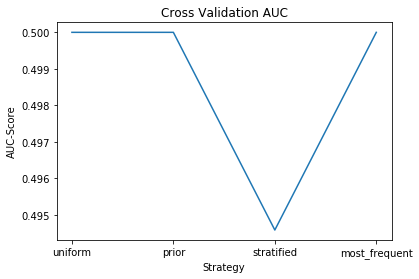

In [284]:
fig,ax=plt.pyplot.subplots()
plt.pyplot.plot(strategy,cv_auc)

plt.pyplot.title("Cross Validation AUC")
plt.pyplot.xlabel("Strategy")
plt.pyplot.ylabel("AUC-Score")
plt.pyplot.show()

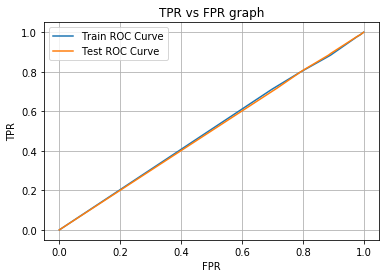

Train AUC Score 0.5049619456972307
Test AUC Score 0.5013427171441076


Train Confusion Matrix


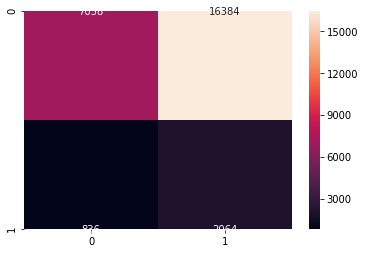


Test Cofusion Matrix


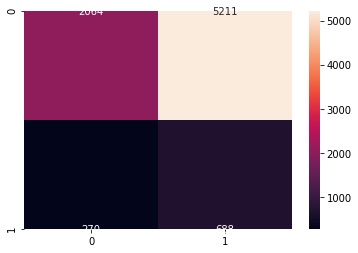

In [285]:
dummy_clf = DummyClassifier(strategy="stratified")
sig_clf = CalibratedClassifierCV(dummy_clf, method="sigmoid")

calculating_roc_auc_score(sig_clf,train_duration,test_duration,y_train,y_test)

In [ ]:
# As we can see, the Train AUC score is 0.5050 and the Test AUC score is 0.5013.
#This is not bad.Now let's look at the F1-score.



In [286]:
"""Printing F1-score"""
print("Train F1-Score:",f1_score(y_train, sig_clf.predict(train_duration), average='macro'))
print("Test F1-Score:",f1_score(y_test, sig_clf.predict(test_duration), average='macro'))

Train F1-Score: 0.47087417644223045
Test F1-Score: 0.4691127160175393


In [ ]:
# We get  a Train F1-score of 0.4709 and a Test F1-score of 0.4691.
#This is a bad performance.Now let's work with K-NN model.


In [287]:
#Stacking columns without Duration
train=np.hstack((train_dataset.to_numpy(),train_campaign,train_previous,train_emp,train_cons_price,train_cons_conf,train_euribor,train_nr_employed))
print(train.shape)
cv=np.hstack((cv_dataset.to_numpy(),cv_campaign,cv_previous,cv_emp,cv_cons_price,cv_cons_conf,cv_euribor,cv_nr_employed))
print(cv.shape)
test=np.hstack((test_dataset.to_numpy(),test_campaign,test_previous,test_emp,test_cons_price,test_cons_conf,test_euribor,test_nr_employed))
print(test.shape)


(26342, 27)
(6586, 27)
(8233, 27)


In [288]:
neighbours=[k for k in range(1,23,2)]
cv_auc=[]
for k in tq.tqdm(neighbours):
    knn=KNeighborsClassifier(n_neighbors=k)
   
    sig_clf = CalibratedClassifierCV(knn, method="sigmoid")
    sig_clf.fit(train, y_train)
    predict_y = sig_clf.predict_proba(cv)
    cv_auc.append(roc_auc_score(y_cv, predict_y[:,1]))

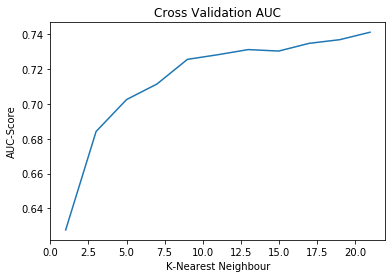

Best K  21


In [289]:
fig,ax=plt.pyplot.subplots()
plt.pyplot.plot(neighbours,cv_auc)

plt.pyplot.title("Cross Validation AUC")
plt.pyplot.xlabel("K-Nearest Neighbour")
plt.pyplot.ylabel("AUC-Score")
plt.pyplot.show()
index_of_best_auc=np.argmax(cv_auc)
print("Best K ",neighbours[index_of_best_auc])

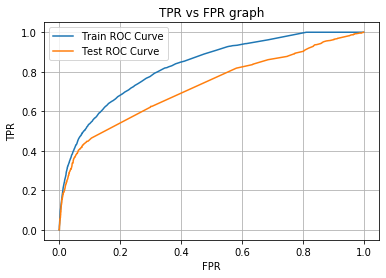

Train AUC Score 0.8277956820796155
Test AUC Score 0.7235724483280603


Train Confusion Matrix


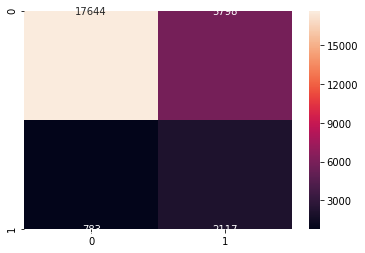


Test Cofusion Matrix


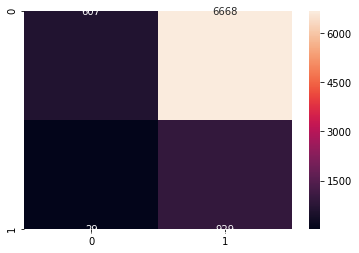

In [290]:
knn=KNeighborsClassifier(n_neighbors=21)

sig_clf = CalibratedClassifierCV(knn, method="sigmoid")
calculating_roc_auc_score(sig_clf,train,test,y_train,y_test)

In [ ]:
#Using the K-Nearest Neighbour algorithm,we get a Train AUC score of 0.8278 and a Test AUC score of 0.7236.
#This indicates a good performance.Now let's look at the F1-score.



In [291]:
"""Printing F1-score"""
print("Train F1-Score:",f1_score(y_train, sig_clf.predict(train), average='macro'))
print("Test F1-Score:",f1_score(y_test, sig_clf.predict(test), average='macro'))

Train F1-Score: 0.6346869350940334
Test F1-Score: 0.6076617624080618


In [ ]:
# The Train F1-score is 0.6347 and the Test F1-score is 0.6077.
#This indicates a slightly good performance.Now let's work with Logistic Regression model.



In [292]:
# Logistic Regression

lambda_values=[10 ** lam for lam in range(-5,4)]
cv_auc=[]
for value in tq.tqdm(lambda_values):
    lr=LogisticRegression(penalty='l2',C=value,class_weight='balanced')

    sig_clf = CalibratedClassifierCV(lr, method="sigmoid")
    sig_clf.fit(train, y_train)
    predict_y = sig_clf.predict_proba(cv)
    cv_auc.append(roc_auc_score(y_cv, predict_y[:,1]))

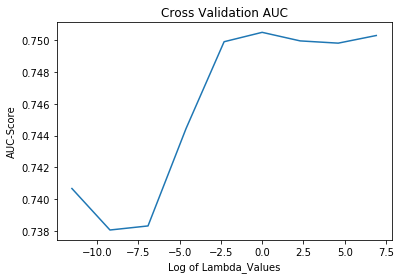

Best lambda 1


In [293]:
fig,ax=plt.pyplot.subplots()
plt.pyplot.plot(np.log(lambda_values),cv_auc)

plt.pyplot.title("Cross Validation AUC")
plt.pyplot.xlabel("Log of Lambda_Values")
plt.pyplot.ylabel("AUC-Score")
plt.pyplot.show()
index_of_best_auc=np.argmax(cv_auc)
print("Best lambda",lambda_values[index_of_best_auc])

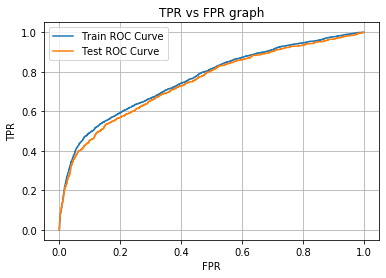

Train AUC Score 0.7630855684903901
Test AUC Score 0.7481401688798973


Train Confusion Matrix


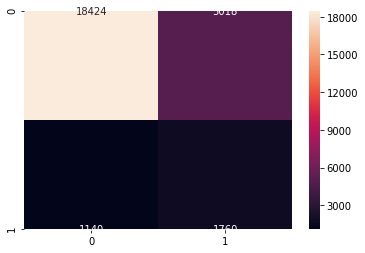


Test Cofusion Matrix


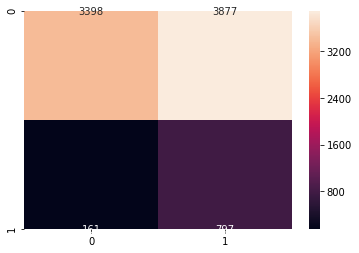

In [294]:
lr=LogisticRegression(penalty='l2',C=1,class_weight='balanced')

sig_clf = CalibratedClassifierCV(lr, method="sigmoid")

calculating_roc_auc_score(sig_clf,train,test,y_train,y_test)

In [ ]:
# We get a Train AUC score of 0.7630 and a Test AUC score of 0.7481.
#This indicates a good performance.Now let's look at the F1-score. 


In [295]:
"""Printing F1-score"""
print("Train F1-Score:",f1_score(y_train, sig_clf.predict(train), average='macro'))
print("Test F1-Score:",f1_score(y_test, sig_clf.predict(test), average='macro'))

Train F1-Score: 0.606617176737513
Test F1-Score: 0.6359799482221986


In [ ]:
# The Train F1-score is 0.6066 and the Test F1-score is 0.6360.Now let's work with the SGD with log-loss.



In [296]:
# SGD with Log-Loss

lambda_values=[10 ** lam for lam in range(-5,4)]
cv_auc=[]
for value in tq.tqdm(lambda_values):
    log = SGDClassifier(loss='log',penalty='l2',alpha=value,class_weight='balanced')
 
    sig_clf = CalibratedClassifierCV(log, method="sigmoid")
    sig_clf.fit(train,y_train)
    predict_y = sig_clf.predict_proba(cv)
    cv_auc.append(roc_auc_score(y_cv, predict_y[:,1]))

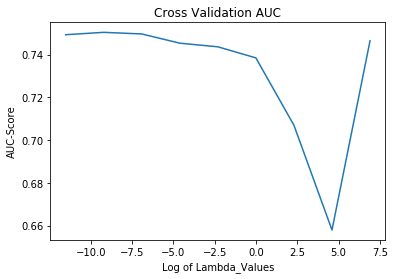

Best lambda 0.0001


In [297]:
fig,ax=plt.pyplot.subplots()
plt.pyplot.plot(np.log(lambda_values),cv_auc)

plt.pyplot.title("Cross Validation AUC")
plt.pyplot.xlabel("Log of Lambda_Values")
plt.pyplot.ylabel("AUC-Score")
plt.pyplot.show()
index_of_best_auc=np.argmax(cv_auc)
print("Best lambda",lambda_values[index_of_best_auc])

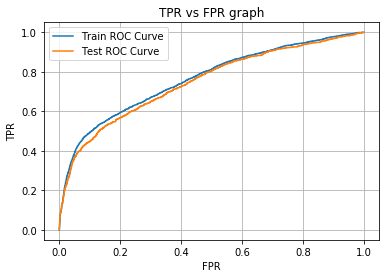

Train AUC Score 0.7631946123815492
Test AUC Score 0.7475471522143067


Train Confusion Matrix


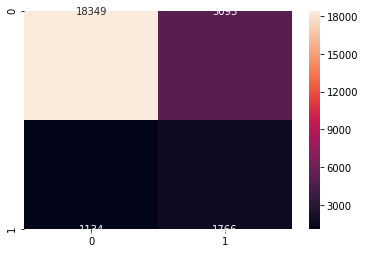


Test Cofusion Matrix


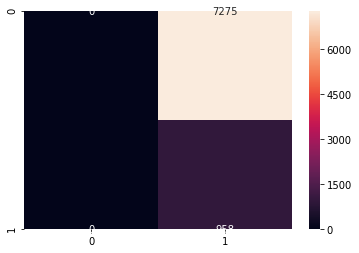

In [298]:
log=SGDClassifier(loss='log',penalty='l2',alpha=0.0001,class_weight='balanced')

sig_clf = CalibratedClassifierCV(log, method="sigmoid")

calculating_roc_auc_score(sig_clf,train,test,y_train,y_test)

In [ ]:
# We get a Train AUC score of 0.7631 and a Test AUC score of 0.7475.This indicates a good performance.
#Now let's look at the F1-score.



In [299]:
"""Printing F1-score"""
print("Train F1-Score:",f1_score(y_train, sig_clf.predict(train), average='macro'))
print("Test F1-Score:",f1_score(y_test, sig_clf.predict(test), average='macro'))

Train F1-Score: 0.6043192375543918
Test F1-Score: 0.6710367114177721


In [ ]:
# The Train F1-score is 0.6043 and the Test F1-score is 0.6710.Now lets work with Linear SVM model.


In [300]:
# Linear SVM

lambda_values=[10 ** lam for lam in range(-5,4)]
cv_auc=[]
for value in tq.tqdm(lambda_values):
    SVM = SGDClassifier(penalty='l2',alpha=value,class_weight='balanced')

    sig_clf = CalibratedClassifierCV(SVM, method="sigmoid")
    sig_clf.fit(train,y_train)
    predict_y = sig_clf.predict_proba(cv)
    cv_auc.append(roc_auc_score(y_cv, predict_y[:,1]))

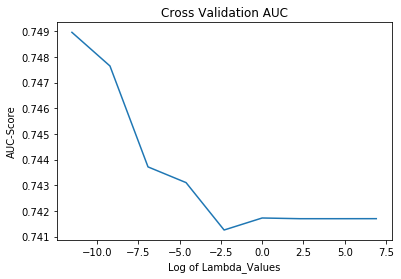

Best lambda 1e-05


In [301]:
fig,ax=plt.pyplot.subplots()
plt.pyplot.plot(np.log(lambda_values),cv_auc)

plt.pyplot.title("Cross Validation AUC")
plt.pyplot.xlabel("Log of Lambda_Values")
plt.pyplot.ylabel("AUC-Score")
plt.pyplot.show()
index_of_best_auc=np.argmax(cv_auc)
print("Best lambda",lambda_values[index_of_best_auc])

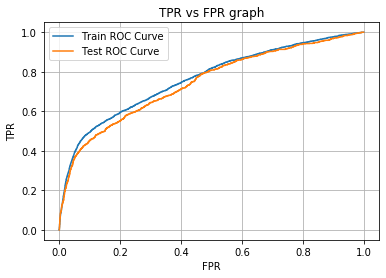

Train AUC Score 0.7633221612255043
Test AUC Score 0.7435761071533622


Train Confusion Matrix


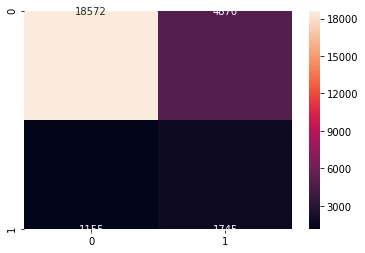


Test Cofusion Matrix


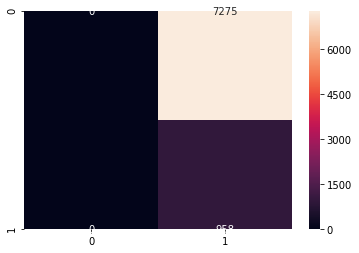

In [302]:
SVM=SGDClassifier(penalty='l2',alpha=1e-05,class_weight='balanced')

sig_clf = CalibratedClassifierCV(SVM, method="sigmoid")

calculating_roc_auc_score(sig_clf,train,test,y_train,y_test)

In [ ]:
# Using the Linear SVM model we get a Train AUC score of 0.7633 and a Test AUC score of 0.7436.
#This indicates a good performance.Now let’s look at the F1-score.


In [303]:
"""Printing F1-score"""
print("Train F1-Score:",f1_score(y_train, sig_clf.predict(train), average='macro'))
print("Test F1-Score:",f1_score(y_test, sig_clf.predict(test), average='macro'))

Train F1-Score: 0.5959609689213382
Test F1-Score: 0.10423240126210423


In [ ]:
# The Train F1-score is 0.5960 and the Test F1-score is 0.1042.
#The Test F1-score is very bad compared with the Test F1-score of all the other models.Now let’s work with Random Forest model.



In [304]:
# Random Forest

train_r=np.hstack((train_dataset.to_numpy(),X_train['campaign'].to_numpy().reshape(len(X_train),1),X_train['previous'].to_numpy().reshape(len(X_train),1),X_train['emp.var.rate'].to_numpy().reshape(len(X_train),1),X_train['cons.price.idx'].to_numpy().reshape(len(X_train),1),X_train['cons.conf.idx'].to_numpy().reshape(len(X_train),1),X_train['euribor3m'].to_numpy().reshape(len(X_train),1),X_train['nr.employed'].to_numpy().reshape(len(X_train),1)))
print(train_r.shape)
cv_r=np.hstack((cv_dataset.to_numpy(),X_cv['campaign'].to_numpy().reshape(len(X_cv),1),X_cv['previous'].to_numpy().reshape(len(X_cv),1),X_cv['emp.var.rate'].to_numpy().reshape(len(X_cv),1),X_cv['cons.price.idx'].to_numpy().reshape(len(X_cv),1),X_cv['cons.conf.idx'].to_numpy().reshape(len(X_cv),1),X_cv['euribor3m'].to_numpy().reshape(len(X_cv),1),X_cv['nr.employed'].to_numpy().reshape(len(X_cv),1)))
print(cv_r.shape)
test_r=np.hstack((test_dataset.to_numpy(),X_test['campaign'].to_numpy().reshape(len(X_test),1),X_test['previous'].to_numpy().reshape(len(X_test),1),X_test['emp.var.rate'].to_numpy().reshape(len(X_test),1),X_test['cons.price.idx'].to_numpy().reshape(len(X_test),1),X_test['cons.conf.idx'].to_numpy().reshape(len(X_test),1),X_test['euribor3m'].to_numpy().reshape(len(X_test),1),X_test['nr.employed'].to_numpy().reshape(len(X_test),1)))
print(test_r.shape)

(26342, 27)
(6586, 27)
(8233, 27)


In [305]:
from sklearn.ensemble import RandomForestClassifier
number_of_estimators=[10,50,100,200,500,1000,1500,2000]
cv_auc=[]
for estimator in tq.tqdm(number_of_estimators):
    random=RandomForestClassifier(n_estimators=estimator,random_state=42,n_jobs=-1,class_weight='balanced')

    sig_clf = CalibratedClassifierCV(random, method="sigmoid")
    sig_clf.fit(train_r,y_train)
    predict_y = sig_clf.predict_proba(cv_r)
    cv_auc.append(roc_auc_score(y_cv, predict_y[:,1]))

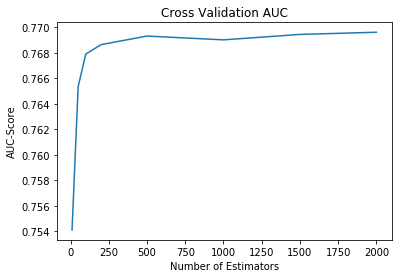

Best number of estimators 2000


In [306]:
fig,ax=plt.pyplot.subplots()
plt.pyplot.plot(number_of_estimators,cv_auc)

plt.pyplot.title("Cross Validation AUC")
plt.pyplot.xlabel("Number of Estimators")
plt.pyplot.ylabel("AUC-Score")
plt.pyplot.show()
index_of_best_auc=np.argmax(cv_auc)
print("Best number of estimators",number_of_estimators[index_of_best_auc])

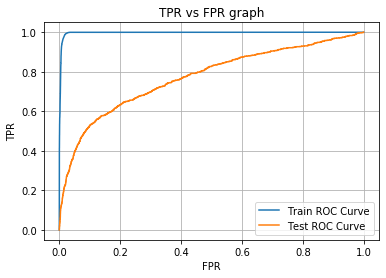

Train AUC Score 0.9973791661885975
Test AUC Score 0.7725082323569292


Train Confusion Matrix


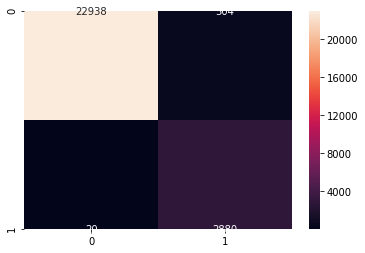


Test Cofusion Matrix


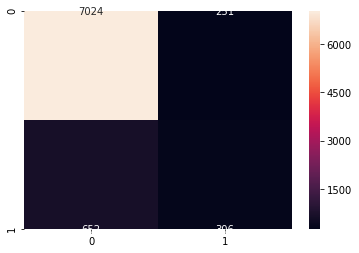

In [307]:
random=RandomForestClassifier(n_estimators=2000,random_state=42,n_jobs=-1,class_weight='balanced')

sig_clf = CalibratedClassifierCV(random, method="sigmoid")
calculating_roc_auc_score(sig_clf,train_r,test_r,y_train,y_test)

In [ ]:
# The Train AUC score is 0.9974 and the Test AUC score is 0.7725.
#This indicates a very good performance.Now let’s look at the F1-score.



In [308]:
"""Printing F1-score"""
print("Train F1-Score:",f1_score(y_train, sig_clf.predict(train_r), average='macro'))
print("Test F1-Score:",f1_score(y_test, sig_clf.predict(test_r), average='macro'))

Train F1-Score: 0.8046017571578591
Test F1-Score: 0.5861200998291979


In [ ]:
# We get a Train F1-score of 0.8046 and a Test F1-score of 0.5861.
#Now let's work with the Xgboost model.


In [309]:
# XGBoost
from xgboost  import XGBClassifier
number_of_estimators=[10,50,100,200,500,1000,1500,2000]
cv_auc=[]
for estimator in tq.tqdm(number_of_estimators):
    xgboost=XGBClassifier(n_estimators=estimator,random_state=42,n_thread=-1,class_weight='balanced')
 
    sig_clf = CalibratedClassifierCV(xgboost, method="sigmoid")
    sig_clf.fit(train_r,y_train)
    predict_y = sig_clf.predict_proba(cv_r)
    cv_auc.append(roc_auc_score(y_cv, predict_y[:,1]))

[05:52:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "class_weight", "n_thread" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[05:52:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[05:52:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "class_weight", "n_thread" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  

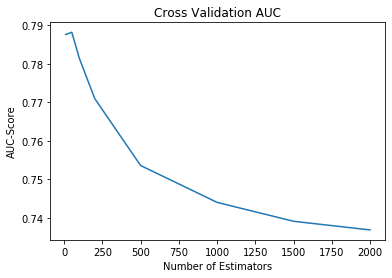

Best number of estimators 50


In [310]:
fig,ax=plt.pyplot.subplots()
plt.pyplot.plot(number_of_estimators,cv_auc)

plt.pyplot.title("Cross Validation AUC")
plt.pyplot.xlabel("Number of Estimators")
plt.pyplot.ylabel("AUC-Score")
plt.pyplot.show()
index_of_best_auc=np.argmax(cv_auc)
print("Best number of estimators",number_of_estimators[index_of_best_auc])

[06:07:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "class_weight", "n_thread" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[06:07:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[06:07:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "class_weight", "n_thread" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  

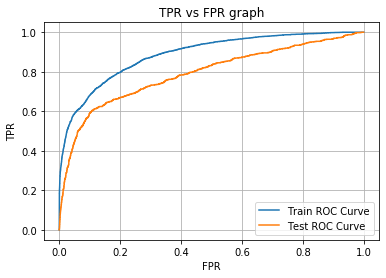

Train AUC Score 0.8877379313286792
Test AUC Score 0.7902341648193187


Train Confusion Matrix


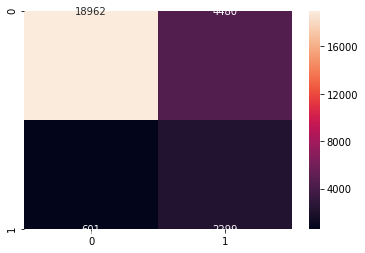


Test Cofusion Matrix


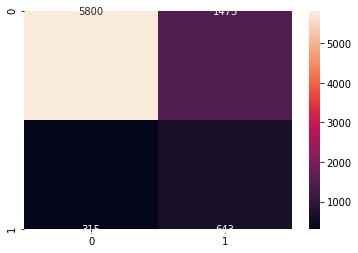

In [311]:
xgboost=XGBClassifier(n_estimators=50,random_state=42,n_thread=-1,class_weight='balanced')

sig_clf = CalibratedClassifierCV(xgboost, method="sigmoid")
calculating_roc_auc_score(sig_clf,train_r,test_r,y_train,y_test)

In [ ]:
# We get a Train AUC score of 0.8877 and a Test AUC score of 0.7902.
#This indicates a very good performance.Now let’s look at the F1-score.


In [312]:
"""Printing F1-score"""
print("Train F1-Score:",f1_score(y_train, sig_clf.predict(train_r), average='macro'))
print("Test F1-Score:",f1_score(y_test, sig_clf.predict(test_r), average='macro'))

Train F1-Score: 0.7213917113580619
Test F1-Score: 0.6473762258219624


In [ ]:
# The Train F1-score is 0.7213 and the Test F1-score is 0.6473.
#This indicates a slight good performance.Now let's work with the last machine learning model,Adaboost.


In [313]:
# Adaboost
number_of_estimators=[10,50,100,200,500,1000,1500,2000]
cv_auc=[]
for estimator in tq.tqdm(number_of_estimators):
    adaboost=AdaBoostClassifier(n_estimators=estimator,random_state=42)
    
    sig_clf = CalibratedClassifierCV(adaboost, method="sigmoid")
    sig_clf.fit(train_r,y_train)
    predict_y = sig_clf.predict_proba(cv_r)
    cv_auc.append(roc_auc_score(y_cv, predict_y[:,1]))

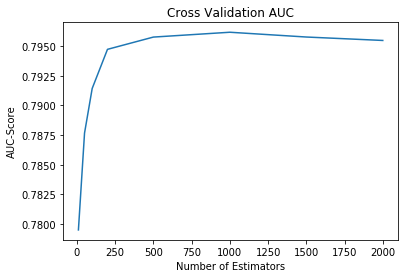

Best number of estimators 1000


In [314]:
fig,ax=plt.pyplot.subplots()
plt.pyplot.plot(number_of_estimators,cv_auc)

plt.pyplot.title("Cross Validation AUC")
plt.pyplot.xlabel("Number of Estimators")
plt.pyplot.ylabel("AUC-Score")
plt.pyplot.show()
index_of_best_auc=np.argmax(cv_auc)
print("Best number of estimators",number_of_estimators[index_of_best_auc])

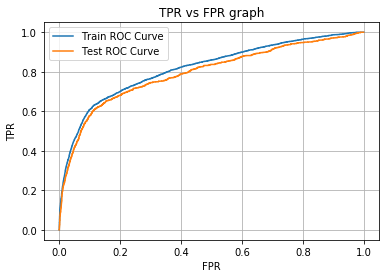

Train AUC Score 0.8176471202586574
Test AUC Score 0.7942106622473796


Train Confusion Matrix


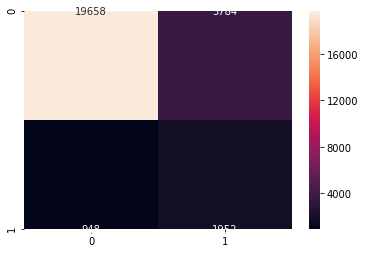


Test Cofusion Matrix


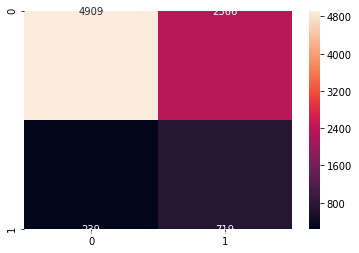

In [315]:
adaboost=AdaBoostClassifier(n_estimators=1000,random_state=42)
sig_clf = CalibratedClassifierCV(adaboost, method="sigmoid")
calculating_roc_auc_score(sig_clf,train_r,test_r,y_train,y_test)

In [ ]:
# Using the Adaboost model, we get a Train AUC score of 0.8176 and a Test AUC score of 0.7942.
#This indicates a very good performance.Now let's look at the F1-score.


In [316]:
"""Printing F1-score"""
print("Train F1-Score:",f1_score(y_train, sig_clf.predict(train_r), average='macro'))
print("Test F1-Score:",f1_score(y_test, sig_clf.predict(test_r), average='macro'))

Train F1-Score: 0.6390712945182628
Test F1-Score: 0.6656106575687422


In [ ]:
# The Train F1-score is 0.6391 and the Test F1-score is 0.6656.
#This indicates a slightly good performance.Now let's select the best or champion model.



In [2]:
!pip install prettytable 

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.
You should consider upgrading via the 'C:\Users\Nkululeko\Anaconda3\python.exe -m pip install --upgrade pip' command.


In [3]:
from prettytable import PrettyTable

In [4]:
# Model Selection

# Observations

x = PrettyTable()
x.field_names=["Model","Encoding","Test-AUC Score","Test Macro F1 Score"]
x.add_row(["Dummy Classifier(Stratified)","One Hot Encoding",0.4778,0.4691])
x.add_row(["KNN-Classifier","One Hot Encoding",0.7125,0.5556])
x.add_row(["Logistic Regression","One Hot Encoding",0.7530,0.6029])
x.add_row(["SGD-LogLoss","One Hot Encoding",0.7535,0.6149])
x.add_row(["Linear SVM","One Hot Encoding",0.7496,0.5894])
x.add_row(["RandomForest","One Hot Encoding",0.7730,0.6092])
x.add_row(["XGBoost","One Hot Encoding",0.7937,0.6489])
x.add_row(["Adaboost","One Hot Encoding",0.7924,0.6270])
x.add_row(["Dummy Classifier(Stratified)","Response Encoding",0.5013,0.4691])
x.add_row(["KNN-Classifier","Response Encoding",0.7236,0.6067])
x.add_row(["Logistic Regression","Response Encoding",0.7481,0.6360])
x.add_row(["SGD-LogLoss","Response Encoding",0.7475,0.6710])
x.add_row(["Linear SVM model","Response Encoding",0.7436,0.1042])
x.add_row(["RandomForest","Response Encoding",0.7725, 0.5861])
x.add_row(["XGBoost","Response Encoding",0.7902,0.6473])
x.add_row(["Adaboost","Response Encoding",0.7942,0.6656])
print(x)

+------------------------------+-------------------+----------------+---------------------+
|            Model             |      Encoding     | Test-AUC Score | Test Macro F1 Score |
+------------------------------+-------------------+----------------+---------------------+
| Dummy Classifier(Stratified) |  One Hot Encoding |     0.4778     |        0.4691       |
|        KNN-Classifier        |  One Hot Encoding |     0.7125     |        0.5556       |
|     Logistic Regression      |  One Hot Encoding |     0.753      |        0.6029       |
|         SGD-LogLoss          |  One Hot Encoding |     0.7535     |        0.6149       |
|          Linear SVM          |  One Hot Encoding |     0.7496     |        0.5894       |
|         RandomForest         |  One Hot Encoding |     0.773      |        0.6092       |
|           XGBoost            |  One Hot Encoding |     0.7937     |        0.6489       |
|           Adaboost           |  One Hot Encoding |     0.7924     |        0.6

In [ ]:
# Model comparison
# Let’s compare our Models and check which model is performing the best 
# From the above we can see that model with Adaboost with response encoding has best Test-AUC  score of 0.7942
# and best F1-score of 0.6656 among other models. We would be saving xgboost using joblib library to predict the data.
# Therefore we would require this model for deployment.

In [ ]:
# Dumping Best Model After Evaluation i.e Adaboost
from joblib import dump, load
dump(sig_clf, 'bestmodel.joblib') 